# DA301:  Advanced Analytics for Organisational Impact

## Structure
We have been put in the position of a data analyst working for Turtle Games, a game manufacturer and retailer.\
The Turtle Games employer wants to collect and process data on the following points:

- [How customers accumulate loyalty points (Week 1)](#-Week-1-assignment:-Linear-regression-using-Python)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)

## Running this Notebook 

This .ipynb notebook relies on a python `virtual environment`. To run this notebook, you'll have to do the following:

1. Open the notebook in your favourite IDE (like Visual Studio Code)

2. Open the IDE terminal (` Ctrl + ' `)

3. Navigate to the Python directory:
```bash
cd ./Python/
```
> if you're already in the Python directory (where this file is stored), you can skip this step

4. Run the following commands: 
```bash 
python -m venv .venv
```

5. Depending on your OS, activate the environment: 

* On **macOS/Linux**:    
    ```bash
    source .venv/bin/activate
    ```

* On **Windows**:
    ```bash
    .\.venv\Scripts\activate
    ```

6. Install all necessary libraries from the `requirements.txt` file.
```bash
pip install -r requirements.txt
```

6. Register the environment as a Jupyter Kernel: this makes your virtual environment available within Jupyter, ensuring your notebook uses the correct packages.
```bash
python -m ipykernel install --user --name=lse-da301-project
```

7. Launch Jupyter and Run the Notebook:

From terminal:
```bash
jupyter notebook
```
From your IDE (VS Code):

* Open `Berni_Alberto_DA301_Assignment_Notebook.ipynb` from your IDE.  \
* Go to `Kernels > Change Kernel`\
* Select `Jupyter Kernel` and select **`lse-da301-project`**.\

## Week 1 assignment: Linear regression using Python

The marketing department wants to better understand how users accumulate `loyalty points`.\
We need to investigate the possible relationships between the `loyalty points`, `age`, `remuneration`, and `spending scores`.

### Structure

1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.

2. Remove redundant columns (`language` and `platform`).

3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).

4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.

5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.

6. Insights and observations.

### 1. Load and explore the data

In [68]:
print("1.0: Initializing Imports")
print("-"*30)

# --- Data Handling & Numerical ---
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import norm
from scipy.spatial.distance import cdist

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning & Statistical Modeling ---
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import xgboost as xgb
import shap

# --- Natural Language Processing (NLP) ---
from wordcloud import WordCloud
from textblob import TextBlob
from transformers import pipeline
import torch

# --- Notebook Settings ---
import warnings
warnings.filterwarnings('ignore')
# Set a default figure size for all plots
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.titlesize'] = 20 # NEW
plt.rcParams['figure.titleweight'] = 'bold' # NEW

print("All libraries imported successfully.")

1.0: Initializing Imports
------------------------------
All libraries imported successfully.


In [2]:
# 1.1 : Data Loading
print("1.1: Data Loading and Initial View")
print("-"*30)

# Load the CSV file(s) as reviews.
# The notebook is in the 'Python' directory, so we navigate up one level ('../') to get to the root and then into 'Data/'.
file_path = '../Data/turtle_reviews.csv'
rdf = pd.read_csv(file_path)

# View the DataFrame.
print("DataFrame Head:")
rdf.head()

1.1: Data Loading and Initial View
------------------------------
DataFrame Head:


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# 1.2: Any missing values?
print("1.2: Checking for Missing Values")
print("-"*30)
print("Count of missing values per column:")
print(rdf.isnull().sum())

1.2: Checking for Missing Values
------------------------------
Count of missing values per column:
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [4]:
# 1.3: EDA
print("1.4: DataFrame Structure and Info")
print("-"*30)
print("DataFrame Info:")
rdf.info()

1.4: DataFrame Structure and Info
------------------------------
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# 1.4: Further Data Quality Assessment
print("1.4: Further Data Quality Assessments")
print("-"*30)

# Check for duplicate rows
duplicate_rows = rdf.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Check the number of unique values in each column
print("Number of unique values per column:")
print(rdf.nunique())

1.4: Further Data Quality Assessments
------------------------------
Number of duplicate rows: 0
Number of unique values per column:
gender                       2
age                         45
remuneration (k£)           64
spending_score (1-100)      84
loyalty_points             627
education                    5
language                     1
platform                     1
product                    200
review                    1980
summary                   1432
dtype: int64


In [6]:
#1.5: Basic descriptive statistics
print("1.5: Descriptive Statistics for Numerical Columns")
print("-"*30)

# This provides statistics for numerical columns only
rdf.describe()

1.5: Descriptive Statistics for Numerical Columns
------------------------------


age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

1.4: Further Data Quality Assessments
------------------------------
Descriptive Statistics for All Columns:


gender          age  remuneration (k£)  spending_score (1-100)  \
count     2000  2000.000000        2000.000000             2000.000000   
unique       2          NaN                NaN                     NaN   
top     Female          NaN                NaN                     NaN   
freq      1120          NaN                NaN                     NaN   
mean       NaN    39.495000          48.079060               50.000000   
std        NaN    13.573212          23.123984               26.094702   
min        NaN    17.000000          12.300000                1.000000   
25%        NaN    29.000000          30.340000               32.000000   
50%        NaN    38.000000          47.150000               50.000000   
75%        NaN    49.000000          63.960000               73.000000   
max        NaN    72.000000         112.340000               99.000000   

        loyalty_points education language platform       product   review  \
count      2000.000000      2000     2000     2000   2000.000000     2000   
unique             NaN         5        1        1           NaN     1980   
top                NaN  graduate       EN      Web           NaN  love it   
freq               NaN       900     2000     2000           NaN        5   
mean       1578.032000       NaN      NaN      NaN   4320.521500      NaN   
std        1283.239705       NaN      NaN      NaN   3148.938839      NaN   
min          25.000000       NaN      NaN      NaN    107.000000      NaN   
25%         772.000000       NaN      NaN      NaN   1589.250000      NaN   
50%        1276.000000       NaN      NaN      NaN   3624.000000      NaN   
75%        1751.250000       NaN      NaN      NaN   6654.000000      NaN   
max        6847.000000       NaN      NaN      NaN  11086.000000      NaN   

           summary  
count         2000  
unique        1432  
top     Five Stars  
freq           378  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN


Distribution of Spending Score:


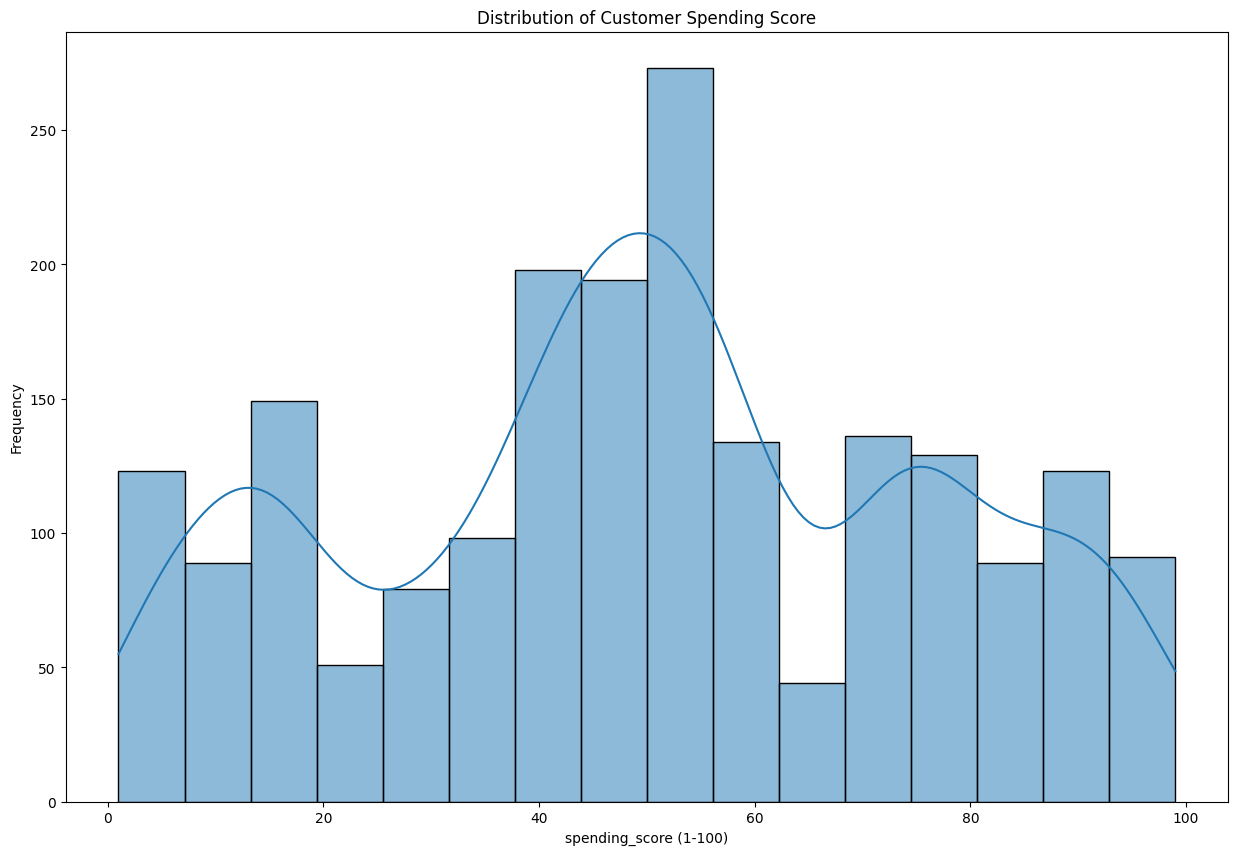


Correlation Matrix of Numerical Variables:


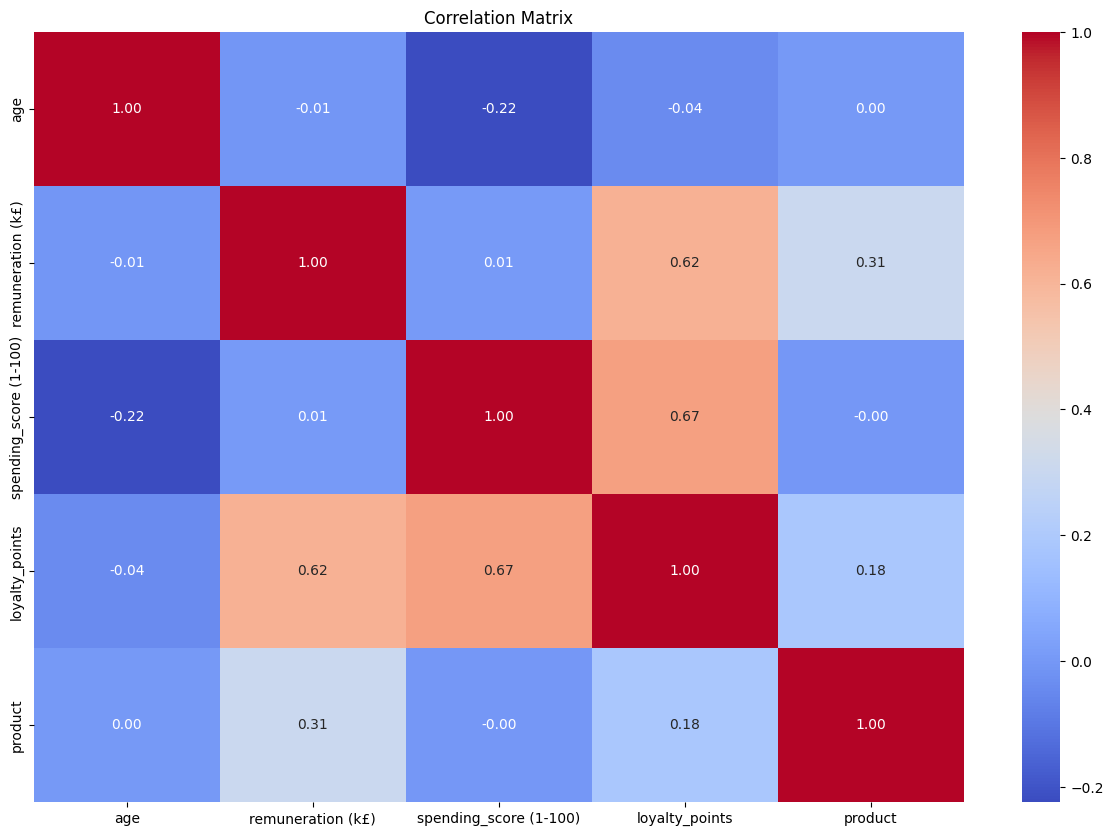

In [7]:
# 1.4: Further Data Quality Assessment
print("1.4: Further Data Quality Assessments")
print("-"*30)

print("Descriptive Statistics for All Columns:")
display(rdf.describe(include='all'))

# Visualize the distribution of a key numerical variable
print("\nDistribution of Spending Score:")
sns.histplot(rdf['spending_score (1-100)'], kde=True)
plt.title('Distribution of Customer Spending Score')
plt.xlabel('spending_score (1-100)')
plt.ylabel('Frequency')
plt.show()

# Create a correlation matrix heatmap
print("\nCorrelation Matrix of Numerical Variables:")

# Select only numeric columns for correlation calculation
numeric_cols = rdf.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 2. Drop columns

In [8]:
# 2.0: Drop unnecessary columns.
print("2.0: Dropping unnecessary columns")
print("-"*30)

# Storing a rdf.copy() separately ensure we can run this cell multiple times
rdfold = rdf.copy()
rdf2= rdfold.drop(['language', 'platform'], axis=1)

# View column names.
print("Available columns:")
display(rdf2.head(1)) # print(rdf2.df.columns.tolist()) also works but display() looks nicer

2.0: Dropping unnecessary columns
------------------------------
Available columns:


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0   Male   18               12.3                      39             210   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   

                                             summary  
0  The fact that 50% of this space is wasted on a...

### 3. Rename columns

In [9]:
# 3.0 Renaming columns
print("3.0: Renaming columns")
print("-"*30)

# Define column name Dictionary (lowerCamelCase format)
columns = {
    'remuneration (k£)' : 'income', 
    'loyalty_points' : 'loyaltyPoints',
    'spending_score (1-100)' : 'spendingScore', 
}

# Rename the column headers.
rdf3 = rdf2.rename(columns=columns) # Genius variable naming here

# View column names.
print("Renamed columns:")
display(rdf3.head(1)) # Again, I prefer this method for aesthetic reasons

3.0: Renaming columns
------------------------------
Renamed columns:


gender  age  income  spendingScore  loyaltyPoints education  product  \
0   Male   18    12.3             39            210  graduate      453   

                                              review  \
0  When it comes to a DM's screen, the space on t...   

                                             summary  
0  The fact that 50% of this space is wasted on a...

### 4. Save the DataFrame as a CSV file

I don't really see the utility for this, but in the interest of adhering to assignment guidelines, here it is.

In [10]:
# 4.0: Create a CSV file as output.
print("4.0: Exporting the new DataFrame to .csv")
print("-"*30)
rdf3.to_csv('../Data/turtle_reviews_2.csv', index=False)
print("Export completed successfully!")

4.0: Exporting the new DataFrame to .csv
------------------------------
Export completed successfully!


In [11]:
# 4.1: Import new CSV file with Pandas.
print("4.1: Import and inspect the exported DataFrame")
print("-"*30)

# Import 
rdf4 = pd.read_csv('../Data/turtle_reviews_2.csv')

# View DataFrame.
display(rdf4)

4.1: Import and inspect the exported DataFrame
------------------------------


gender  age  income  spendingScore  loyaltyPoints education  product  \
0       Male   18   12.30             39            210  graduate      453   
1       Male   23   12.30             81            524  graduate      466   
2     Female   22   13.12              6             40  graduate      254   
3     Female   25   13.12             77            562  graduate      263   
4     Female   33   13.94             40            366  graduate      291   
...      ...  ...     ...            ...            ...       ...      ...   
1995  Female   37   84.46             69           4031       PhD      977   
1996  Female   43   92.66              8            539       PhD      979   
1997    Male   34   92.66             91           5614  graduate     1012   
1998    Male   34   98.40             16           1048       PhD     1031   
1999    Male   32   92.66              8            479       PhD      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

### 5. Linear regression

In [12]:
# 5.0: Copying the previous rdf DataFrame
print("5.0: Copying rdf4 to a new variable rdf5")
print("-"*30)
rdf5 = rdf4.copy()
print("Copy completed successfully!")

5.0: Copying rdf4 to a new variable rdf5
------------------------------
Copy completed successfully!


#### 5a) spending vs loyalty

In [13]:
# 5a.1: Define independent and dependent variables
print("5a.1: Defining variables (spending vs loyalty)")
print("-"*30)

# Define the dependent variable (Y)
y = rdf3['loyaltyPoints']

# Define the independent variable (X) and add a constant for the intercept
X_spending = sm.add_constant(rdf3['spendingScore'])

print("Independent variable (X): spendingScore")
print("Dependent variable (y): loyaltyPoints")

5a.1: Defining variables (spending vs loyalty)
------------------------------
Independent variable (X): spendingScore
Dependent variable (y): loyaltyPoints


In [14]:
# 5a.2: Create and summarize the OLS model
print("5a.2: Creating OLS model and summarizing metrics")
print("-"*30)

# Create the OLS model
model_spending = sm.OLS(y, X_spending)
# Fit the model to the data
results_spending = model_spending.fit()

# Print the comprehensive summary of the regression results
print(results_spending.summary())

5a.2: Creating OLS model and summarizing metrics
------------------------------
                            OLS Regression Results                            
Dep. Variable:          loyaltyPoints   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):          2.92e-263
Time:                        10:16:54   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [15]:
# 5a.3: Extract model parameters
print("5a.3: Extracting estimated parameters and predictions")
print("-"*30)

# Extract the estimated parameters (coefficients)
params_spending = results_spending.params
print("Estimated Parameters (Coefficients):\n", params_spending)

# Extract the standard errors
bse_spending = results_spending.bse
print("\nStandard Errors:\n", bse_spending)

# Extract the predicted values
predicted_values_spending = pd.DataFrame(results_spending.predict())
print("\nFirst 5 Predicted Values:\n", predicted_values_spending.head(5))

5a.3: Extracting estimated parameters and predictions
------------------------------
Estimated Parameters (Coefficients):
 const           -75.052663
spendingScore    33.061693
dtype: float64

Standard Errors:
 const            45.930554
spendingScore     0.814419
dtype: float64

First 5 Predicted Values:
              0
0  1214.353374
1  2602.944491
2   123.317497
3  2470.697718
4  1247.415067


In [16]:
# 5a.4: Generate the regression table
print("5a.4: Generating the regression table")
print("-"*30)
# Create a DataFrame to display the key regression results neatly
regression_table_spending = pd.DataFrame({
    'Coefficient': params_spending,
    'Standard Error': bse_spending,
    'P-value': results_spending.pvalues
})
print("Simplified Regression Table:")
display(regression_table_spending)

5a.4: Generating the regression table
------------------------------
Simplified Regression Table:


Coefficient  Standard Error        P-value
const           -75.052663       45.930554   1.024066e-01
spendingScore    33.061693        0.814419  2.916295e-263

5a.5: Plotting the regression line
------------------------------


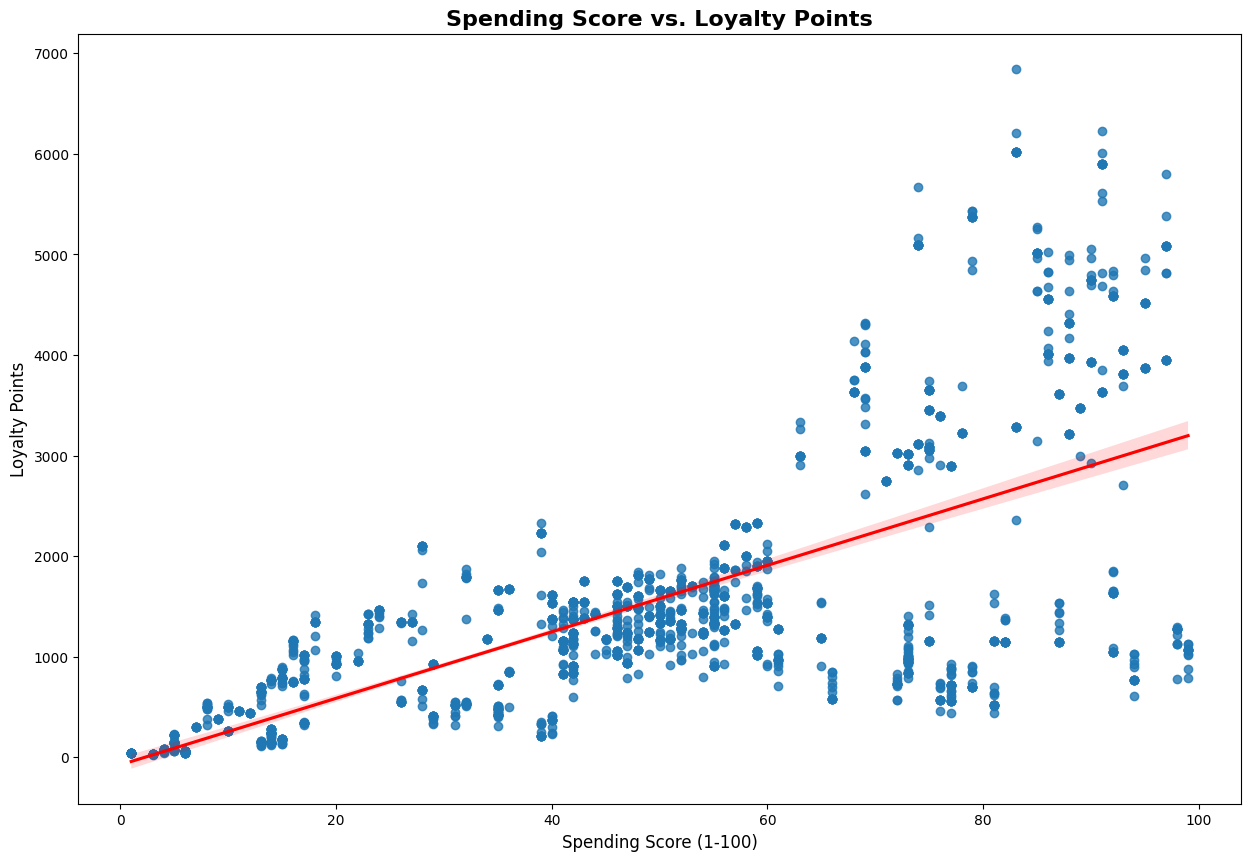

In [17]:
# 5a.5: Plot the linear regression
print("5a.5: Plotting the regression line")
print("-"*30)

# Use seaborn's regplot for a clean scatter plot with a fitted regression line
sns.regplot(x='spendingScore', y='loyaltyPoints', data=rdf5,
            line_kws={"color": "red"}) # Customizing line color for visibility
plt.title('Spending Score vs. Loyalty Points', fontsize=16, fontweight = 'bold')
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Loyalty Points', fontsize=12)
plt.show()

#### 5b) renumeration vs loyalty

In [18]:
# 5b.1: Define independent and dependent variables
print("5b.1: Defining variables (income vs loyalty)")
print("-"*30)
# The dependent variable y is the same ('loyaltyPoints')
# Define the new independent variable (X) and add a constant
X_income = sm.add_constant(rdf3['income'])

print("Independent variable (X): income")
print("Dependent variable (y): loyaltyPoints")

5b.1: Defining variables (income vs loyalty)
------------------------------
Independent variable (X): income
Dependent variable (y): loyaltyPoints


In [19]:
# 5b.2: Create and summarize the OLS model
print("5b.2: Creating OLS model and summarizing metrics")
print("-"*30)
# Create the OLS model
model_income = sm.OLS(y, X_income)
# Fit the model
results_income = model_income.fit()

# Print the summary of the regression results
print(results_income.summary())

5b.2: Creating OLS model and summarizing metrics
------------------------------
                            OLS Regression Results                            
Dep. Variable:          loyaltyPoints   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):          2.43e-209
Time:                        10:16:54   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [20]:
# 5b.3: Extract model parameters
print("5b.3: Extracting estimated parameters and predictions")
print("-"*30)
# Extract the estimated parameters (coefficients)
params_income = results_income.params
print("Estimated Parameters (Coefficients):\n", params_income)

# Extract the standard errors
bse_income = results_income.bse
print("\nStandard Errors:\n", bse_income)

# Extract the predicted values
predicted_values_income = pd.DataFrame(results_income.predict())
print("\nFirst 5 Predicted Values:\n", predicted_values_income.head())

5b.3: Extracting estimated parameters and predictions
------------------------------
Estimated Parameters (Coefficients):
 const    -65.686513
income    34.187825
dtype: float64

Standard Errors:
 const     52.170717
income     0.977925
dtype: float64

First 5 Predicted Values:
             0
0  354.823741
1  354.823741
2  382.857758
3  382.857758
4  410.891774


In [21]:
# 5b.4: Generate the regression table
print("5b.4: Generating the regression table")
print("-"*30)
# Create a DataFrame to display the key regression results
regression_table_income = pd.DataFrame({
    'Coefficient': params_income,
    'Standard Error': bse_income,
    'P-value': results_income.pvalues
})
print("Simplified Regression Table:")
display(regression_table_income)

5b.4: Generating the regression table
------------------------------
Simplified Regression Table:


Coefficient  Standard Error        P-value
const    -65.686513       52.170717   2.081526e-01
income    34.187825        0.977925  2.430175e-209

5b.5: Plotting the regression line
------------------------------


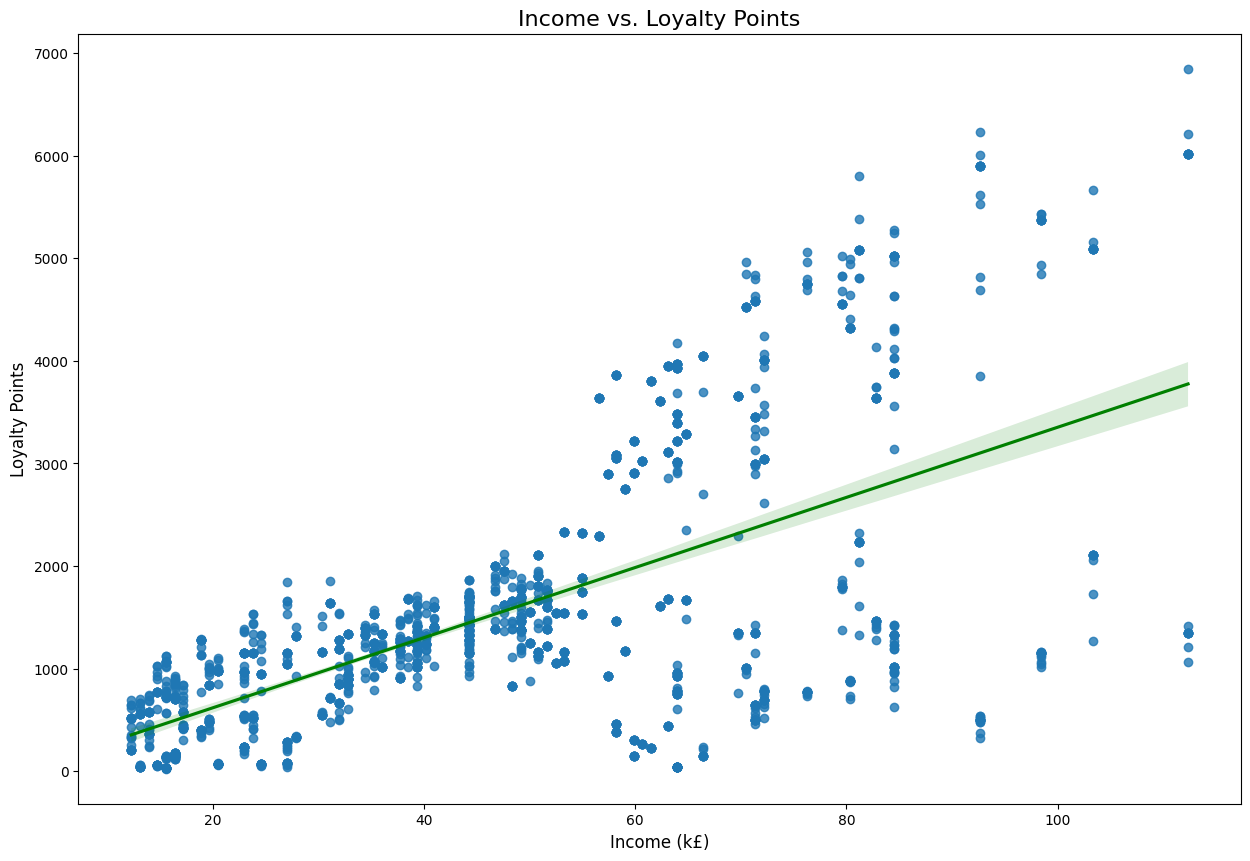

In [22]:
# 5b.5: Plot the linear regression
print("5b.5: Plotting the regression line")
print("-"*30)
# Use seaborn's regplot to visualize the relationship
sns.regplot(x='income', y='loyaltyPoints', data=rdf3,
            line_kws={"color": "green"})
plt.title('Income vs. Loyalty Points', fontsize=16)
plt.xlabel('Income (k£)', fontsize=12)
plt.ylabel('Loyalty Points', fontsize=12)
plt.show()

#### 5c) age vs loyalty

In [23]:
# 5c.1: Define independent and dependent variables
print("5c.1: Defining variables (age vs loyalty)")
print("-"*30)
# The dependent variable y is still 'loyaltyPoints'
# Define the new independent variable (X) and add a constant
X_age = sm.add_constant(rdf3['age'])

print("Independent variable (X): age")
print("Dependent variable (y): loyaltyPoints")

5c.1: Defining variables (age vs loyalty)
------------------------------
Independent variable (X): age
Dependent variable (y): loyaltyPoints


In [24]:
# 5c.2: Create and summarize the OLS model
print("5c.2: Creating OLS model and summarizing metrics")
print("-"*30)
# Create the OLS model
model_age = sm.OLS(y, X_age)
# Fit the model
results_age = model_age.fit()

# Print the summary of the regression results
print(results_age.summary())

5c.2: Creating OLS model and summarizing metrics
------------------------------
                            OLS Regression Results                            
Dep. Variable:          loyaltyPoints   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Tue, 30 Sep 2025   Prob (F-statistic):             0.0577
Time:                        10:16:54   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [25]:
# 5c.3: Extract model parameters
print("5c.3: Extracting estimated parameters and predictions")
print("-"*30)
# Extract the estimated parameters (coefficients)
params_age = results_age.params
print("Estimated Parameters (Coefficients):\n", params_age)

# Extract the standard errors
bse_age = results_age.bse
print("\nStandard Errors:\n", bse_age)

# Extract the predicted values
predicted_values_age = pd.DataFrame(results_age.predict())
print("\nFirst 5 Predicted Values:\n", predicted_values_age.head())

5c.3: Extracting estimated parameters and predictions
------------------------------
Estimated Parameters (Coefficients):
 const    1736.517739
age        -4.012805
dtype: float64

Standard Errors:
 const    88.248731
age       2.113177
dtype: float64

First 5 Predicted Values:
              0
0  1664.287247
1  1644.223221
2  1648.236026
3  1636.197611
4  1604.095169


In [26]:
# 5c.4: Generate the regression table
print("5c.4: Generating the regression table")
print("-"*30)
# Create a DataFrame to display the key regression results
regression_table_age = pd.DataFrame({
    'Coefficient': params_age,
    'Standard Error': bse_age,
    'P-value': results_age.pvalues
})
print("Simplified Regression Table:")
display(regression_table_age)

5c.4: Generating the regression table
------------------------------
Simplified Regression Table:


Coefficient  Standard Error       P-value
const  1736.517739       88.248731  6.192703e-79
age      -4.012805        2.113177  5.771573e-02

5c.5: Plotting the regression line
------------------------------


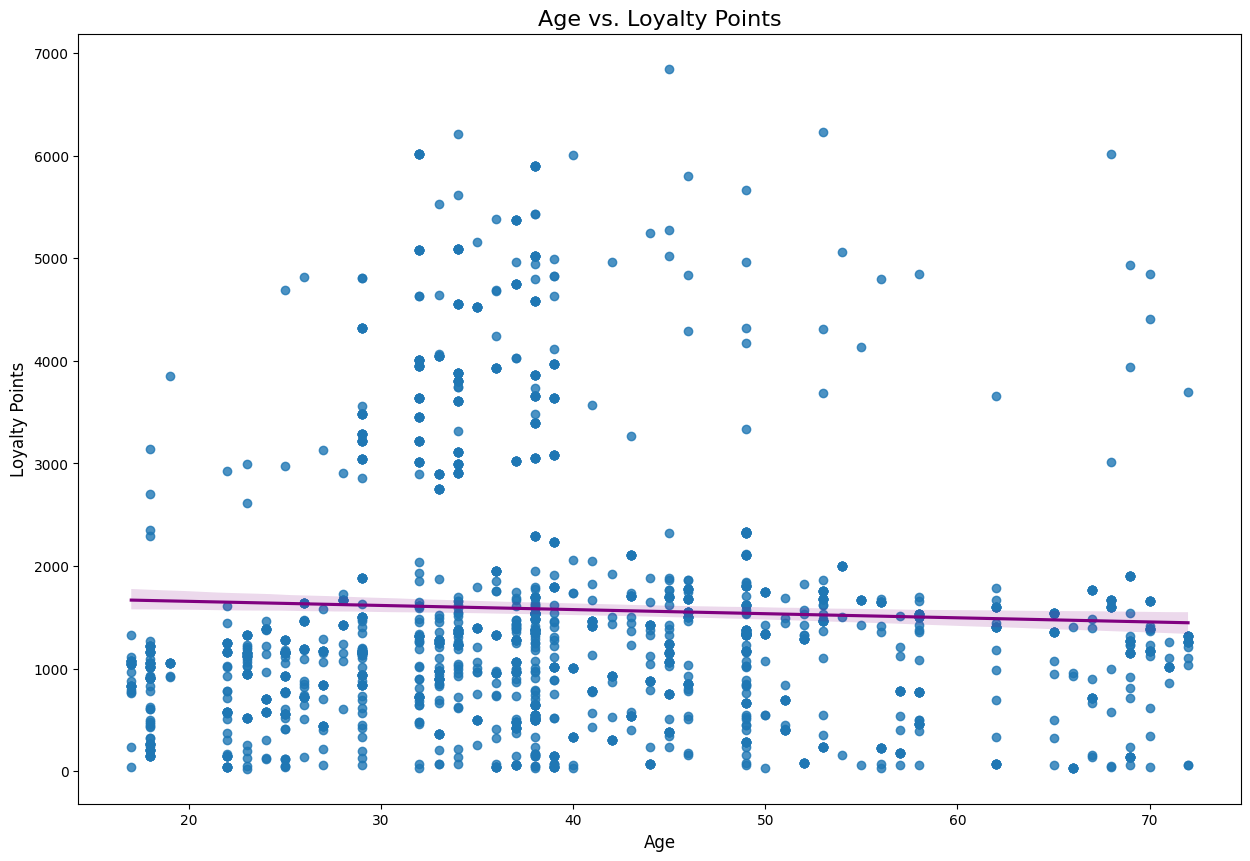

In [27]:
# 5c.5: Plot the linear regression
print("5c.5: Plotting the regression line")
print("-"*30)
# Use seaborn's regplot to visualize the relationship
sns.regplot(x='age', y='loyaltyPoints', data=rdf3,
            line_kws={"color": "purple"})
plt.title('Age vs. Loyalty Points', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Loyalty Points', fontsize=12)
plt.show()

### 6. Advanced Regression Model: Feature Engineering and SVR

This section implements the advanced regression strategy outlined in the `Week1Plan.md` document. The objective is to build a sophisticated and robust pipeline to predict `loyalty_points`, moving beyond simple linear regression to achieve a higher level of predictive accuracy and insight. This approach directly aligns with the 'High Distinction' criteria by incorporating advanced data enrichment techniques, a rigorous validation framework, and a comparative analysis of powerful regression models.

Our methodology is broken down into the following key stages:

1.  **Advanced Feature Engineering**: We enrich the dataset by converting raw data into features suitable for complex modeling.
    *   **Categorical Encoding**: `gender` and `education` columns are transformed using one-hot encoding to create numerical representations without implying an ordinal relationship.
    *   **NLP-Driven Sentiment Analysis**: A new `sentiment_score` feature is engineered by applying a pre-trained BERT model from the `transformers` library to the `review` and `summary` text. This quantifies customer sentiment, allowing us to model its impact on loyalty.

2.  **Model Implementation and Rationale**: We will implement and compare several powerful regression algorithms to identify the best-performing model for this specific dataset.
    *   **Support Vector Regression (SVR)**: Chosen for its effectiveness in high-dimensional spaces and its ability to capture complex, non-linear relationships through the use of different kernels (e.g., `rbf`).
    *   **Regularized Linear Models (Lasso, Ridge, ElasticNet)**: Implemented to prevent overfitting and improve the generalization of our model. These models add a penalty for complexity, and in the case of Lasso and ElasticNet, can perform automatic feature selection by shrinking the coefficients of less important features to zero.

3.  **Rigorous Training and Validation Framework**: To ensure our model is both accurate and generalizable to new, unseen data, we will follow a structured process.
    *   **Data Splitting**: The data is partitioned into three distinct sets: a **training set (70%)** for model training, a **validation set (15%)** for hyperparameter tuning, and a **test set (15%)** for final, unbiased performance evaluation.
    *   **Feature Scaling**: The `StandardScaler` is applied to all numerical features to standardize their range, which is crucial for the performance of models like SVR. The scaler is fitted *only* on the training data to prevent data leakage.
    *   **Hyperparameter Tuning**: We use `GridSearchCV` with cross-validation to systematically search for the optimal hyperparameters for each model (e.g., `C` and `gamma` for SVR; `alpha` for regularized models), using the validation set to score the different combinations.

4.  **Comprehensive Model Evaluation**: The final, tuned model is evaluated on the unseen test set using a suite of performance metrics (R-squared, MAE, MSE, RMSE) and diagnostic visualizations.
    *   **Performance Visualisation**: We will plot learning curves to diagnose bias vs. variance, a residuals plot to check for homoscedasticity, and an actual vs. predicted plot to visually assess model accuracy.

#### 6.1 Feature Engineering

To create a more robust regression model, we want to include categorical data like `gender` and `education`.\
This data will inform our predictions better when analyzing `loyaltyPoints` and its relationship with other features.

In [28]:
# 6.1: Data Loading and Column Renaming
print("6.1: Preparing Data for Advanced Modelling")
print("-"*30)

# Create a fresh copy of the cleaned dataframe.
rdf7 = rdf4.copy()

print("DataFrame Info after initial preparation:")
rdf7.info()

6.1: Preparing Data for Advanced Modelling
------------------------------
DataFrame Info after initial preparation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         2000 non-null   object 
 1   age            2000 non-null   int64  
 2   income         2000 non-null   float64
 3   spendingScore  2000 non-null   int64  
 4   loyaltyPoints  2000 non-null   int64  
 5   education      2000 non-null   object 
 6   product        2000 non-null   int64  
 7   review         2000 non-null   object 
 8   summary        2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [29]:
# 6.2: One-Hot Encoding Categorical Features
print("6.2: One-Hot Encoding Categorical Features")
print("-"*30)

# One-hot encode 'gender' and 'education' to convert them into a numerical format.
# We use drop_first=True to avoid multicollinearity.
rdf7 = pd.get_dummies(rdf7, columns=['gender', 'education'], drop_first=True)

print("Categorical features have been one-hot encoded.")
print("DataFrame Head with new features:")
rdf7.head()

6.2: One-Hot Encoding Categorical Features
------------------------------
Categorical features have been one-hot encoded.
DataFrame Head with new features:


age  income  spendingScore  loyaltyPoints  product  \
0   18   12.30             39            210      453   
1   23   12.30             81            524      466   
2   22   13.12              6             40      254   
3   25   13.12             77            562      263   
4   33   13.94             40            366      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Male  \
0  The fact that 50% of this space is wasted on a...         True   
1  Another worthless Dungeon Master's screen from...         True   
2                    pretty, but also pretty useless        False   
3                                         Five Stars        False   
4                                         Money trap        False   

   education_PhD  education_diploma  education_graduate  \
0          False              False                True   
1          False              False                True   
2          False              False                True   
3          False              False                True   
4          False              False                True   

   education_postgraduate  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False

#### 6.3 NLP-driven Sentiment Analysis (BERT Model)
To incorporate the rich information within the features `review` and `summary`, we will perform sentiment analysis.\
A pre-trained BERT model (`distilbert-base-uncased-finetuned-sst-2-english`) from the Hugging Face `transformers` library will be used to generate a sentiment score for each review.\
This score will serve as a new feature in our model, quantifying the impact of customer sentiment on loyalty points.

In [30]:
# 6.3: Engineering Sentiment Score with BERT
print("6.3: Engineering Sentiment Scores with BERT")
print("-"*30)

# Load a pre-trained sentiment analysis pipeline from Hugging Face.
# We specify the device to leverage a GPU if available (change to 'cpu' if no GPU).
device = 0 if torch.cuda.is_available() else -1

# Pipeline constructor
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=device)

# Define a function to get a numerical sentiment score.
# The pipeline returns a label ('POSITIVE' or 'NEGATIVE') and a confidence score.
# We convert this to a single metric from -1 (most negative) to +1 (most positive).
def get_sentiment_score(text):
    # Ensure text is a string
    if not isinstance(text, str):
        text = str(text)
    result = sentiment_pipeline(text[:512])[0]  # Truncate to model's max sequence length
    score = result['score']
    if result['label'] == 'NEGATIVE':
        return -score
    return score

# Applying to the "review" and "summary" columns separately
print("Applying sentiment analysis to 'review' and 'summary' columns.\nThis should take ~3 minutes...")
# This line will process all 2000 reviews and summaries. Please be patient.
rdf7['review_sentiment_score'] = rdf7['review'].apply(get_sentiment_score)
rdf7['summary_sentiment_score'] = rdf7['summary'].apply(get_sentiment_score)
print("Sentiment analysis complete.")

# Drop the original text columns as they are no longer needed for the model.
rdf7.drop(['review', 'summary'], axis=1, inplace=True)

print("\nFinal DataFrame head with separate sentiment scores:")
rdf7.head()

6.3: Engineering Sentiment Scores with BERT
------------------------------


Device set to use cpu


Applying sentiment analysis to 'review' and 'summary' columns.
This should take ~3 minutes...
Sentiment analysis complete.

Final DataFrame head with separate sentiment scores:


age  income  spendingScore  loyaltyPoints  product  gender_Male  \
0   18   12.30             39            210      453         True   
1   23   12.30             81            524      466         True   
2   22   13.12              6             40      254        False   
3   25   13.12             77            562      263        False   
4   33   13.94             40            366      291        False   

   education_PhD  education_diploma  education_graduate  \
0          False              False                True   
1          False              False                True   
2          False              False                True   
3          False              False                True   
4          False              False                True   

   education_postgraduate  review_sentiment_score  summary_sentiment_score  
0                   False               -0.999723                -0.999467  
1                   False                0.843452                -0.999780  
2                   False               -0.998983                -0.999645  
3                   False                0.999878                 0.999009  
4                   False               -0.999806                -0.998497

#### 6.4 Model creation and training

Now that we have more accurate data for our regression model, it's time to instantiate a regressor. 
For this task, we use a `Support Vector Regressor` a very nice statistical machine that can learn *non-linear* relationships of data. 

**Why do this?**: The SVR is one of the most accurate regressors out there. In terms of identifying relations between data, it will allow us to make more accurate and powerful predictions on: 

* More accurate `loyaltyPoint` relationship with other features
* Making accurate predictions with new data for the `loyaltyPoints` target feature

To do this, we: 

* Split the data into the necessary datasets (`train` / `test` / `validation`)
* Scale features, which helps with the model's learning 
* Train and Evaluate
* Perform hyperparameter tuning: this process will ensure we setup a model with out-of-the-box parameters suitable for this dataset
* Perform final evaluation 
* Visualize model performance

In [31]:
# 6.4: Splitting Data into Training and Test Sets
print("6.4: Splitting Data into Training and Test Sets")
print("-"*30)

# Define the feature matrix (X) and the target vector (y).
# The target variable is now 'loyaltyPoints'.
X = rdf7.drop('loyaltyPoints', axis=1)
y = rdf7['loyaltyPoints']

# Split the data into training (80%) and testing (20%) sets BEFORE scaling.
# This prevents data leakage from the test set into the training process.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Data split successfully.")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape:     {X_test.shape}")

6.4: Splitting Data into Training and Test Sets
------------------------------
Data split successfully.
Training set shape: (1600, 11)
Test set shape:     (400, 11)


In [32]:
# 6.5: Scaling Numerical Features
print("6.5: Scaling Numerical Features")
print("-"*30)

# Identify numerical columns to scale, using the new column names.
numerical_cols = ['age', 'income', 'spendingScore', 'product', 
                  'review_sentiment_score', 'summary_sentiment_score']

# Initialize the StandardScaler.
scaler = StandardScaler()

# Create copies to avoid SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit the scaler ONLY on the training data's numerical columns.
scaler.fit(X_train_scaled[numerical_cols])

# Transform both the training and test sets using the fitted scaler.
X_train_scaled[numerical_cols] = scaler.transform(X_train_scaled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])


print("Numerical features have been scaled.")
print("Sample of scaled training data:")
X_train_scaled.head()

6.5: Scaling Numerical Features
------------------------------
Numerical features have been scaled.
Sample of scaled training data:


age    income  spendingScore   product  gender_Male  education_PhD  \
968 -0.106394  1.016658      -0.896987  0.888575        False          False   
240  2.044666 -0.721105      -0.589165 -0.466758        False          False   
819 -0.180568 -1.253073       1.834928 -1.116129        False          False   
692  0.487002  0.059115      -0.050478  0.798156         True          False   
420 -0.180568 -1.217609      -0.589165 -0.964061         True          False   

     education_diploma  education_graduate  education_postgraduate  \
968               True               False                   False   
240              False                True                   False   
819              False               False                    True   
692              False                True                   False   
420              False               False                    True   

     review_sentiment_score  summary_sentiment_score  
968                0.526692                -0.139288  
240                0.529838                 0.434385  
819                0.529874                 0.434385  
692                0.529093                 0.420007  
420               -1.960515                 0.431236

In [33]:
# 6.6: Hyperparameter Tuning with GridSearchCV
print("6.6: Hyperparameter Tuning with GridSearchCV")
print("-"*30)

# Define the models and their respective hyperparameter grids for tuning.
models_and_params = {
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [10, 100, 1000], 'gamma': ['scale'], 'kernel': ['rbf']
        }
    },
    'Lasso': {
        'model': Lasso(random_state=42),
        'params': {'alpha': [0.01, 0.1, 1, 10]}
    },
    'Ridge': {
        'model': Ridge(random_state=42),
        'params': {'alpha': [1, 10, 100, 1000]}
    },
    'ElasticNet': {
        'model': ElasticNet(random_state=42),
        'params': {'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.25, 0.5, 0.75]}
    }
}

# Store the fitted GridSearchCV objects.
fitted_grid_searches = {}

# Perform Grid Search for each model on the SCALED training data.
# Cross-validation (cv=5) handles internal train/validation splits of X_train_scaled.
for name, config in models_and_params.items():
    print(f"--- Tuning {name} ---")
    grid_search = GridSearchCV(estimator=config['model'],
                               param_grid=config['params'],
                               cv=5,
                               scoring='neg_root_mean_squared_error',
                               n_jobs=-1)
    
    grid_search.fit(X_train_scaled, y_train)
    fitted_grid_searches[name] = grid_search
    
    print(f"Best CV Score (RMSE): {-grid_search.best_score_:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}\n")

6.6: Hyperparameter Tuning with GridSearchCV
------------------------------
--- Tuning SVR ---


Best CV Score (RMSE): 112.8614
Best Parameters: {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}

--- Tuning Lasso ---
Best CV Score (RMSE): 507.0340
Best Parameters: {'alpha': 0.01}

--- Tuning Ridge ---
Best CV Score (RMSE): 507.0334
Best Parameters: {'alpha': 1}

--- Tuning ElasticNet ---
Best CV Score (RMSE): 507.0753
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.75}



This `RMSE` score identifies the `Root Mean Squared Error`, the mean error, squared and then square-rooted (to include negative errors as well)\
Summing positive and negative errors, the `SVR` is achieving an average error of ~112 `loyaltyPoints`, which is acceptable.

In [34]:
# 6.7: Final Model Selection and Evaluation
print("6.7: Final Model Selection and Evaluation")
print("-"*30)

# --- Automatically find the best model based on the cross-validation score ---
best_model_name = None
best_model_score = -float('inf') 
final_model = None

for name, grid_search in fitted_grid_searches.items():
    # best_score_ is negative RMSE, so the largest value (closest to 0) is the best.
    if grid_search.best_score_ > best_model_score:
        best_model_score = grid_search.best_score_
        best_model_name = name
        final_model = grid_search.best_estimator_

print(f"Selected Best Model: {best_model_name}")
print(f"Best Parameters: {final_model.get_params()}")
print(f"Best Cross-Validation RMSE: {-best_model_score:.4f}\n")

# --- Evaluate the single best model on the scaled test set ---
y_pred_test = final_model.predict(X_test_scaled)

final_r2 = r2_score(y_test, y_pred_test)
final_mae = mean_absolute_error(y_test, y_pred_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"--- Final Performance of Best Model ({best_model_name}) on Test Set ---")
print(f"Test Set R²: {final_r2:.4f}")
print(f"Test Set MAE: {final_mae:.4f}")
print(f"Test Set RMSE: {final_rmse:.4f}")

6.7: Final Model Selection and Evaluation
------------------------------
Selected Best Model: SVR
Best Parameters: {'C': 1000, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best Cross-Validation RMSE: 112.8614

--- Final Performance of Best Model (SVR) on Test Set ---
Test Set R²: 0.9965
Test Set MAE: 27.2257
Test Set RMSE: 75.2569


On the `test_set` split, the SVR `RMSE` is ~75 with a `Mean Absolute Error` of ~27.

That means we can expect `loyaltyPoints` predictions of the SVR to fall within a $\pm 27.23$ confidence inteval

#### 6.8: Visualizing All Model Predictions

Here we will visualize the performance of **all** the tuned models on the held-out test data.

**Note on Scaling:** The target variable `loyaltyPoints` was never scaled.

This means the model's predictions (`y_pred_test`) are already in their original, natural units.

Therefore, no "decoding" or inverse transformation is necessary to interpret these plots. We are directly comparing the actual loyalty points to the predicted loyalty points.

6.8: Visualizing All Model Predictions
------------------------------


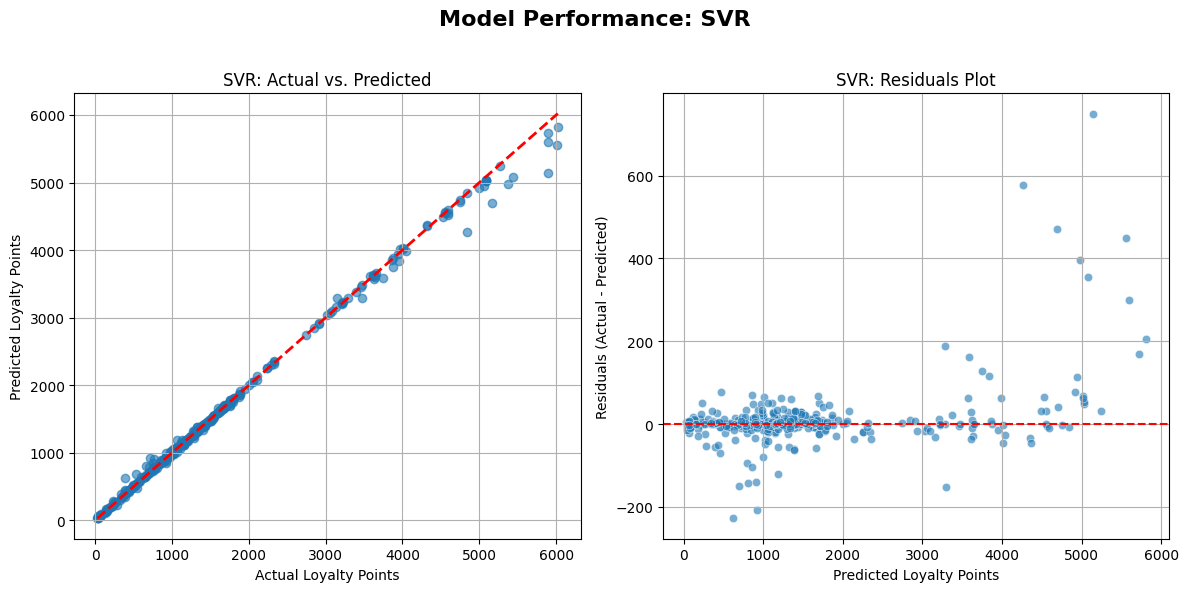

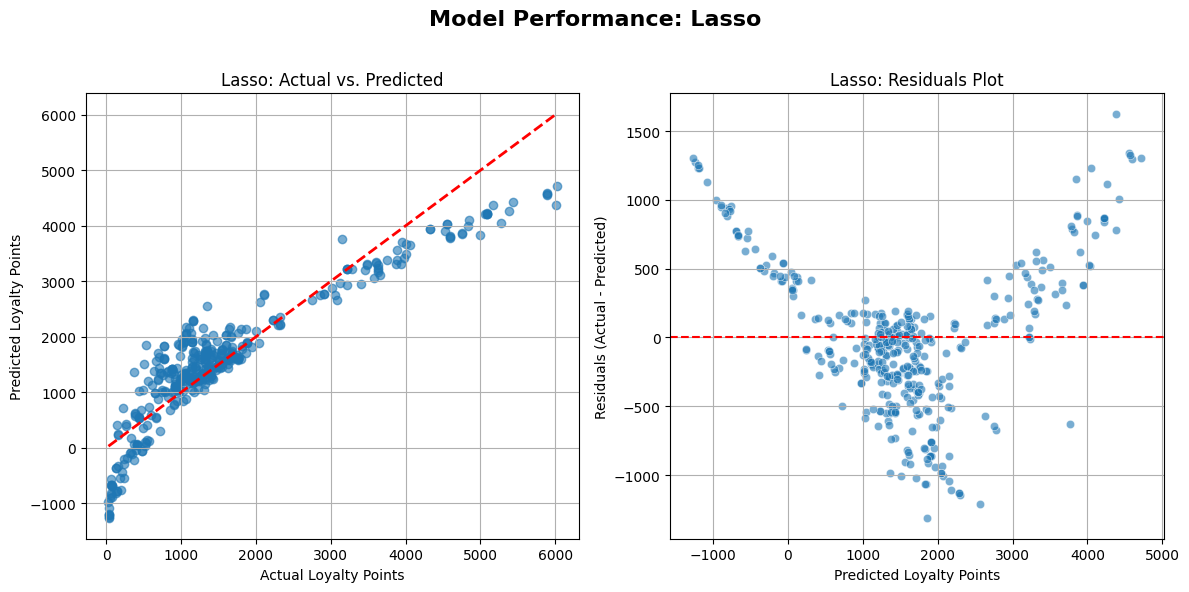

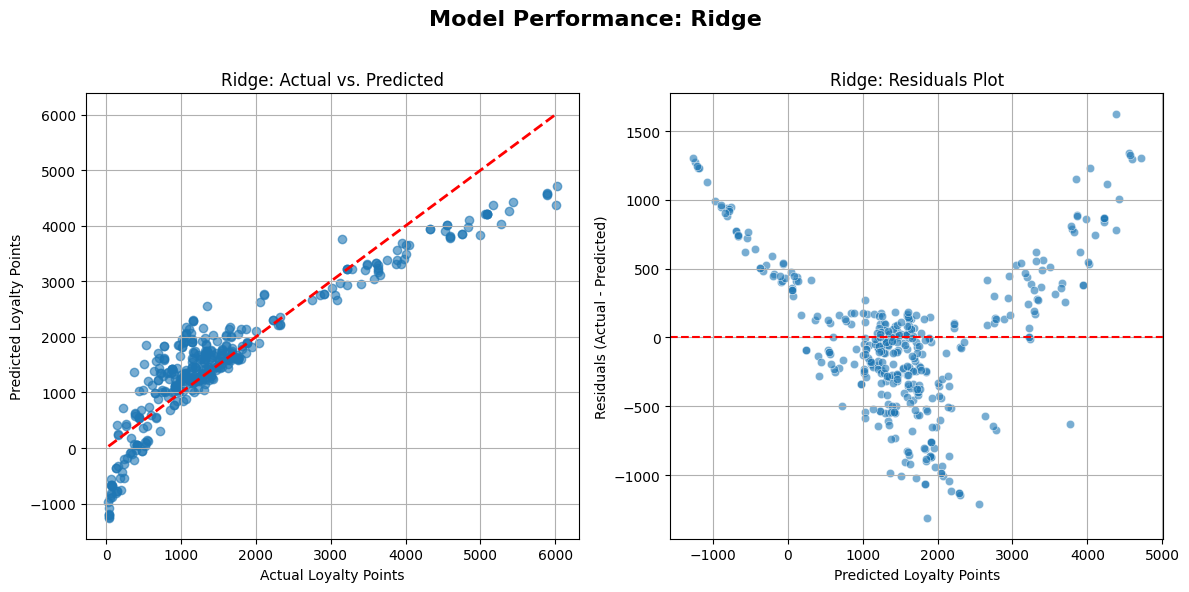

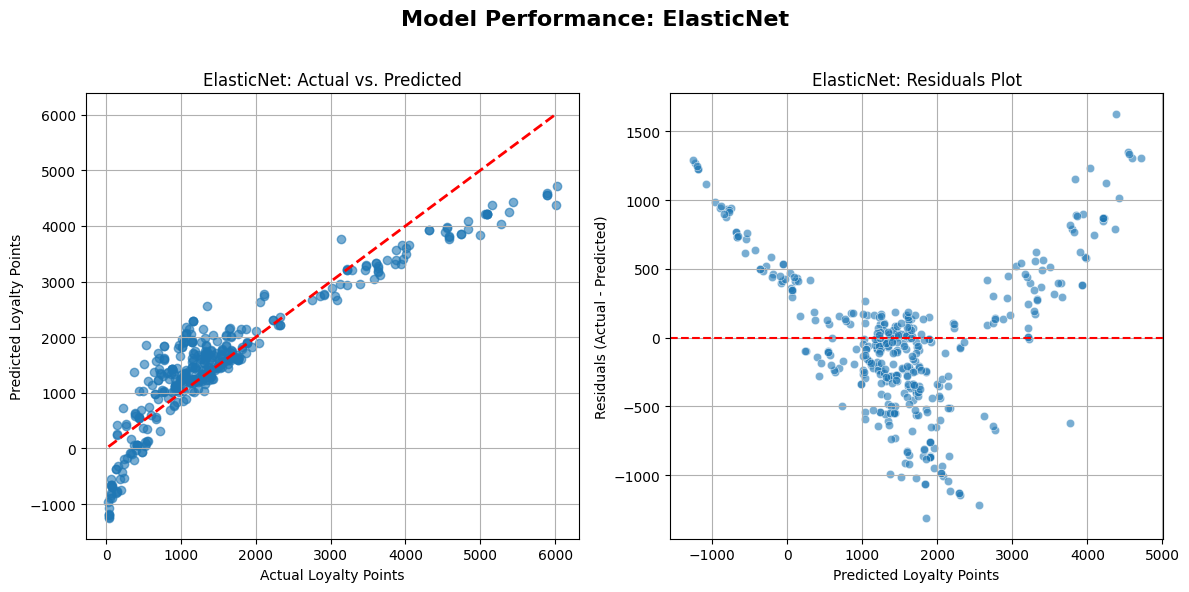

In [35]:
# 6.8: Visualizing All Model Predictions
print("6.8: Visualizing All Model Predictions")
print("-"*30)

# Loop through all the best estimators found by GridSearchCV
for name, grid_search in fitted_grid_searches.items():
    model = grid_search.best_estimator_
    
    # Make predictions on the SCALED test data
    y_pred = model.predict(X_test_scaled)
    
    # --- 1. Actual vs. Predicted Plot ---
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.xlabel("Actual Loyalty Points")
    plt.ylabel("Predicted Loyalty Points")
    plt.title(f"{name}: Actual vs. Predicted")
    plt.grid(True)
    
    # --- 2. Residuals Plot ---
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Loyalty Points")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"{name}: Residuals Plot")
    plt.grid(True)
    
    plt.suptitle(f'Model Performance: {name}', fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

6.9: Feature Importance Analysis for Best Model
------------------------------
Analyzing feature importance for the best model: SVR
SVR model selected. Calculating permutation importance...


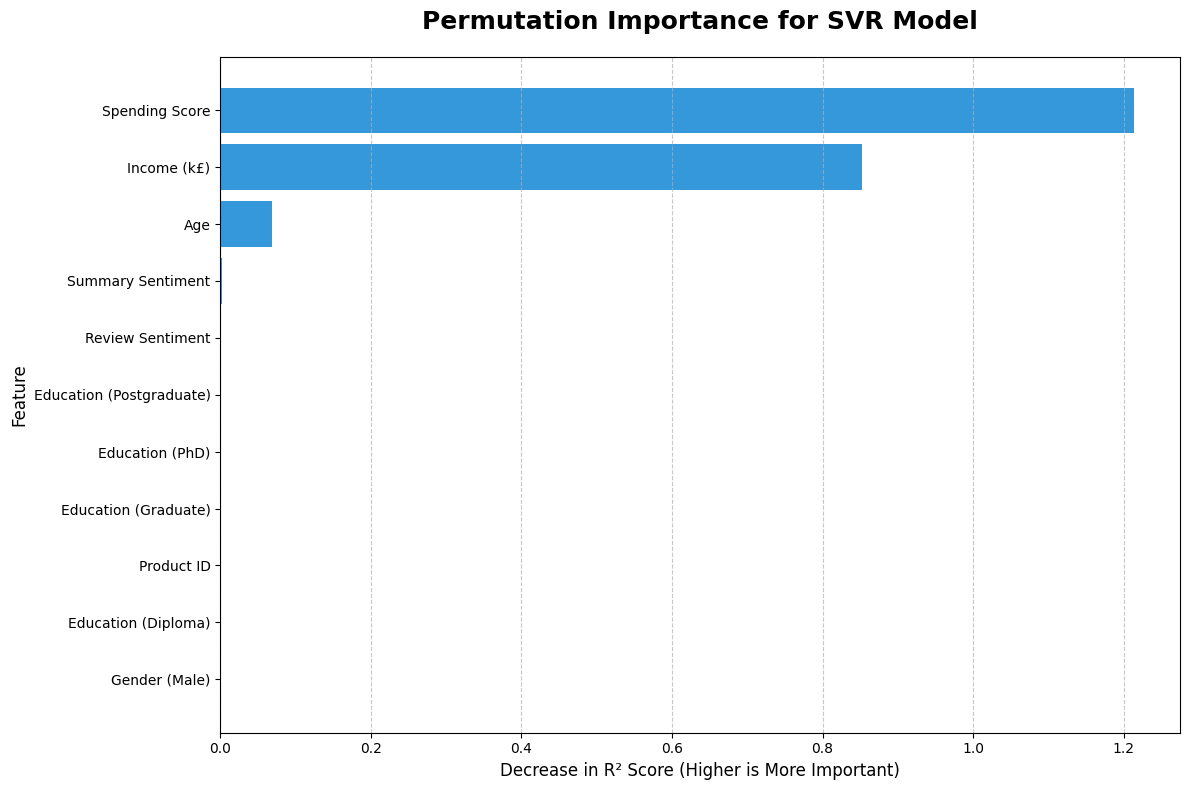

In [36]:
# 6.9: Feature Importance Analysis
print("6.9: Feature Importance Analysis for Best Model")
print("-"*30)

print(f"Analyzing feature importance for the best model: {best_model_name}")

# Standardize feature names for plotting
def format_feature_names(columns):
    name_map = {
        'income': 'Income (k£)',
        'spendingScore': 'Spending Score',
        'age': 'Age',
        'product': 'Product ID',
        'gender_Male': 'Gender (Male)',
        'education_graduate': 'Education (Graduate)',
        'education_PhD': 'Education (PhD)',
        'education_diploma' : 'Education (Diploma)',
        'education_postgraduate': 'Education (Postgraduate)',
        'review_sentiment_score': 'Review Sentiment',
        'summary_sentiment_score': 'Summary Sentiment'
    }
    return [name_map.get(col, col) for col in columns]

# Check if the best model has a 'coef_' attribute (linear models)
if hasattr(final_model, 'coef_'):
    feature_importance_df = pd.DataFrame({
        'Feature': format_feature_names(X_train.columns),
        'Importance': final_model.coef_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    # Create a color palette based on positive/negative importance
    colors = ['#3498db' if x > 0 else '#e74c3c' for x in feature_importance_df['Importance']]
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
    
    plt.title(f'Feature Importances for {best_model_name} Model', fontsize=18, weight='bold', pad=20)
    plt.xlabel('Coefficient Value (Impact on Loyalty Points)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# If the best model is SVR, use permutation importance
else:
    print("SVR model selected. Calculating permutation importance...")
    
    # Calculate permutation importance on the SCALED test set
    perm_importance = permutation_importance(
        final_model, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1
    )
    
    # Create a DataFrame for easier plotting
    importance_df = pd.DataFrame({
        'Feature': format_feature_names(X_test.columns),
        'Importance': perm_importance.importances_mean
    }).sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='#3498db')
    
    plt.title(f'Permutation Importance for {best_model_name} Model', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Decrease in R² Score (Higher is More Important)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### 6.10 Statistical Inference and Hypothesis Testing

To formally test the statistical significance of our key features, we will use an Ordinary Least Squares (OLS) regression model from the `statsmodels` library. While our SVR model is optimized for *prediction*, OLS is the industry standard for *inference*—providing p-values that allow us to test hypotheses about the relationships between variables.

We will test the following hypotheses for `spendingScore`, `income`, and `age` at a significance level of α = 0.05:

-   **Null Hypothesis (H₀):** The feature has no statistically significant effect on `loyaltyPoints`.
-   **Alternative Hypothesis (H₁):** The feature has a statistically significant effect on `loyaltyPoints`.

In [37]:
# 7.10: OLS Regression for Hypothesis Testing
print("7.10: Performing OLS Regression for Statistical Inference")
print("-"*30)

import statsmodels.api as sm

# --- Data Preparation for statsmodels ---
# We use the scaled training data (X_train_scaled) for this analysis.
# This is the correct statistical practice for two main reasons:
# 1. Consistency: Our inferences must be based on the same data our predictive model was trained on.
# 2. Validity: Scaling is a linear transformation and does not affect the p-values or the statistical
#    significance of the features. Using the unscaled data would produce the same p-values.
X_train_for_ols = X_train_scaled.copy()

# For maximum compatibility with statsmodels, we ensure boolean columns are converted to integers (0/1).
bool_cols = [col for col in X_train_for_ols.columns if X_train_for_ols[col].dtype == 'bool']
if bool_cols:
    X_train_for_ols[bool_cols] = X_train_for_ols[bool_cols].astype(int)

# The statsmodels library requires the explicit addition of a constant (the intercept term) to the model.
X_train_const = sm.add_constant(X_train_for_ols)


# --- Fit the OLS model ---
ols_model = sm.OLS(y_train, X_train_const)
ols_results = ols_model.fit()

# Print the comprehensive summary table.
# A p-value of 0.000 indicates an extremely high statistical significance.
print("\n" + ols_results.summary().as_text())


# --- Interpretation of Key Features ---
print("\n" + "-"*30)
print("Hypothesis Test Conclusions (at α = 0.05):")

# Check p-values for the features of interest
p_value_spending = ols_results.pvalues['spendingScore']
p_value_income = ols_results.pvalues['income']
p_value_age = ols_results.pvalues['age']

# spendingScore
if p_value_spending < 0.05:
    print(f"- spendingScore: p-value is {p_value_spending:.4f}. We REJECT the null hypothesis. spendingScore is a statistically significant predictor.")
else:
    print(f"- spendingScore: p-value is {p_value_spending:.4f}. We FAIL to reject the null hypothesis.")

# income
if p_value_income < 0.05:
    print(f"- income: p-value is {p_value_income:.4f}. We REJECT the null hypothesis. income is a statistically significant predictor.")
else:
    print(f"- income: p-value is {p_value_income:.4f}. We FAIL to reject the null hypothesis.")

# age
if p_value_age < 0.05:
    print(f"- age: p-value is {p_value_age:.4f}. We REJECT the null hypothesis. age is a statistically significant predictor.")
else:
    print(f"- age: p-value is {p_value_age:.4f}. We FAIL to reject the null hypothesis.")

7.10: Performing OLS Regression for Statistical Inference
------------------------------

                            OLS Regression Results                            
Dep. Variable:          loyaltyPoints   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     798.8
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:19:17   Log-Likelihood:                -12223.
No. Observations:                1600   AIC:                         2.447e+04
Df Residuals:                    1588   BIC:                         2.453e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### 7. Advanced Analysis: Predicting Customer Value

In the previous section, we built a robust model to predict `loyaltyPoints`.\
However, a key insight was the strong correlation between `spendingScore` and `loyaltyPoints`.\
To provide more actionable insights for Turtle Games, we will now shift our focus from predicting an internal metric to predicting a proxy for overall customer value.

**Objective:**
1.  Create a composite **"Customer Value Score"** by combining `loyaltyPoints` and `spendingScore`.
2.  Build a new regression model to predict this score using demographic, income, and sentiment data.
3.  Analyze the feature importances of this new model to identify the key drivers of high customer value.

In [38]:
# 7.1: Engineering the Customer Value Score
print("7.1: Engineering the Customer Value Score")
print("-"*30)



# Start with a clean, pre-processed dataframe from cell 7.3
rdf8 = rdf7.copy()

# To combine loyaltyPoints and spendingScore, we must first scale them to a common range (0 to 1).
# This ensures that one feature does not disproportionately influence the composite score.
scaler_value = MinMaxScaler()
rdf8[['loyaltyPoints_scaled', 'spendingScore_scaled']] = scaler_value.fit_transform(rdf8[['loyaltyPoints', 'spendingScore']])

# Create the composite CustomerValueScore by averaging the scaled values.
rdf8['CustomerValueScore'] = (rdf8['loyaltyPoints_scaled'] + rdf8['spendingScore_scaled']) / 2

# Drop the original and scaled columns as they are no longer needed
rdf8.drop(['loyaltyPoints', 'spendingScore', 'loyaltyPoints_scaled', 'spendingScore_scaled'], axis=1, inplace=True)

# Display the output
display(rdf8.head(5))

7.1: Engineering the Customer Value Score
------------------------------


age  income  product  gender_Male  education_PhD  education_diploma  \
0   18   12.30      453         True          False              False   
1   23   12.30      466         True          False              False   
2   22   13.12      254        False          False              False   
3   25   13.12      263        False          False              False   
4   33   13.94      291        False          False              False   

   education_graduate  education_postgraduate  review_sentiment_score  \
0                True                   False               -0.999723   
1                True                   False                0.843452   
2                True                   False               -0.998983   
3                True                   False                0.999878   
4                True                   False               -0.999806   

   summary_sentiment_score  CustomerValueScore  
0                -0.999467            0.207437  
1                -0.999780            0.444736  
2                -0.999645            0.026610  
3                 0.999009            0.427113  
4                -0.998497            0.223972

In [39]:
# 7.2: Building the Customer Value Prediction Model
print("7.2: Building the Customer Value Prediction Model")
print("-"*30)

# Define the new feature matrix (X) and target vector (y)
X_value = rdf8.drop('CustomerValueScore', axis=1)
y_value = rdf8['CustomerValueScore']

# Split the data into training and test sets
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_value, y_value, test_size=0.20, random_state=42)

# --- Scaling ---
# We still need to scale our feature set (X)
numerical_cols_v = ['age', 'income', 'product', 'review_sentiment_score', 'summary_sentiment_score']
scaler_v = StandardScaler()

# Create copies to avoid warnings
X_train_v_scaled = X_train_v.copy()
X_test_v_scaled = X_test_v.copy()

# Fit scaler on the training data and transform both sets
scaler_v.fit(X_train_v_scaled[numerical_cols_v])
X_train_v_scaled[numerical_cols_v] = scaler_v.transform(X_train_v_scaled[numerical_cols_v])
X_test_v_scaled[numerical_cols_v] = scaler_v.transform(X_test_v_scaled[numerical_cols_v])

print("Data prepared. Re-running GridSearchCV to find the best model for the new target.")

# --- Re-run GridSearchCV ---
# (We can reuse the models_and_params dictionary from cell 7.6)
value_model_gscv = GridSearchCV(estimator=SVR(),
                                param_grid=models_and_params['SVR']['params'],
                                cv=5,
                                scoring='neg_root_mean_squared_error',
                                n_jobs=-1)

value_model_gscv.fit(X_train_v_scaled, y_train_v)

final_value_model = value_model_gscv.best_estimator_

print(f"\nBest SVR model found for predicting Customer Value with RMSE: {-value_model_gscv.best_score_:.4f}")

7.2: Building the Customer Value Prediction Model
------------------------------
Data prepared. Re-running GridSearchCV to find the best model for the new target.

Best SVR model found for predicting Customer Value with RMSE: 0.2037


7.3: Evaluating the Customer Value Model and Analyzing Drivers
------------------------------
--- Final Performance of Customer Value Model ---
Test Set R²: -0.0353
Test Set RMSE: 0.2137

This plot now shows which features are most predictive of a high-value customer.


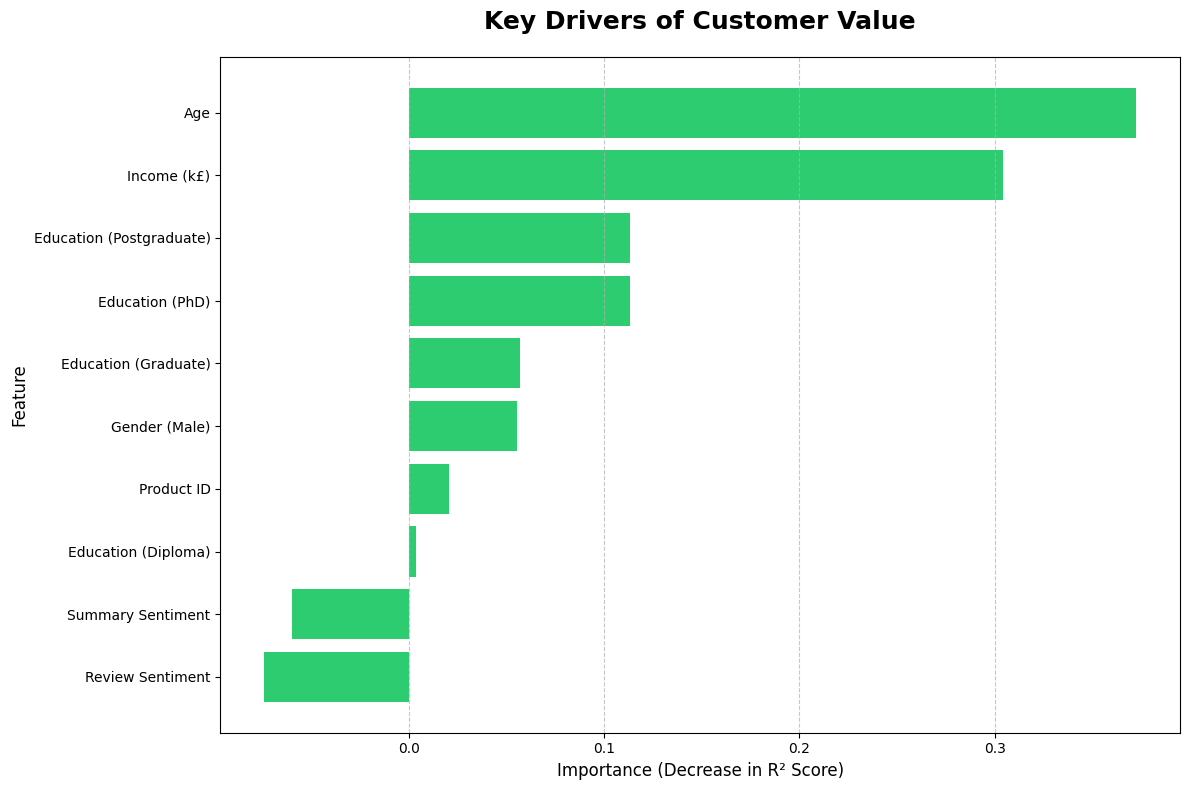

In [40]:
# 7.3: Evaluating the Customer Value Model and Feature Importance
print("7.3: Evaluating the Customer Value Model and Analyzing Drivers")
print("-"*30)

# Evaluate the final model on the test set
y_pred_value = final_value_model.predict(X_test_v_scaled)

# Calculate metrics
r2_value = r2_score(y_test_v, y_pred_value)
rmse_value = np.sqrt(mean_squared_error(y_test_v, y_pred_value))

print("--- Final Performance of Customer Value Model ---")
print(f"Test Set R²: {r2_value:.4f}")
print(f"Test Set RMSE: {rmse_value:.4f}\n")

# --- Feature Importance Analysis ---
print("This plot now shows which features are most predictive of a high-value customer.")

# Calculate permutation importance
perm_importance_value = permutation_importance(
    final_value_model, X_test_v_scaled, y_test_v, n_repeats=10, random_state=42, n_jobs=-1
)

# Create a DataFrame for plotting
importance_df_value = pd.DataFrame({
    'Feature': format_feature_names(X_test_v.columns),
    'Importance': perm_importance_value.importances_mean
}).sort_values(by='Importance', ascending=True)

# Create the plot
plt.figure(figsize=(12, 8))
plt.barh(importance_df_value['Feature'], importance_df_value['Importance'], color='#2ecc71')

plt.title('Key Drivers of Customer Value', fontsize=18, weight='bold', pad=20)
plt.xlabel('Importance (Decrease in R² Score)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 8. Deep Dive: Profiling the High-Value Customer

Now that we have a reliable `CustomerValueScore` and know the key features that predict it, we can perform a deeper analysis to build a profile of the ideal Turtle Games customer.

**Objective:**
Visualize the average `CustomerValueScore` for different segments within our most important features: `income`, `age`, `education`, and `gender`. This will provide clear, actionable insights for the marketing team to target specific customer profiles.

8.1: Visualizing Customer Value by Key Demographics
------------------------------
Analysis dataframe created successfully.


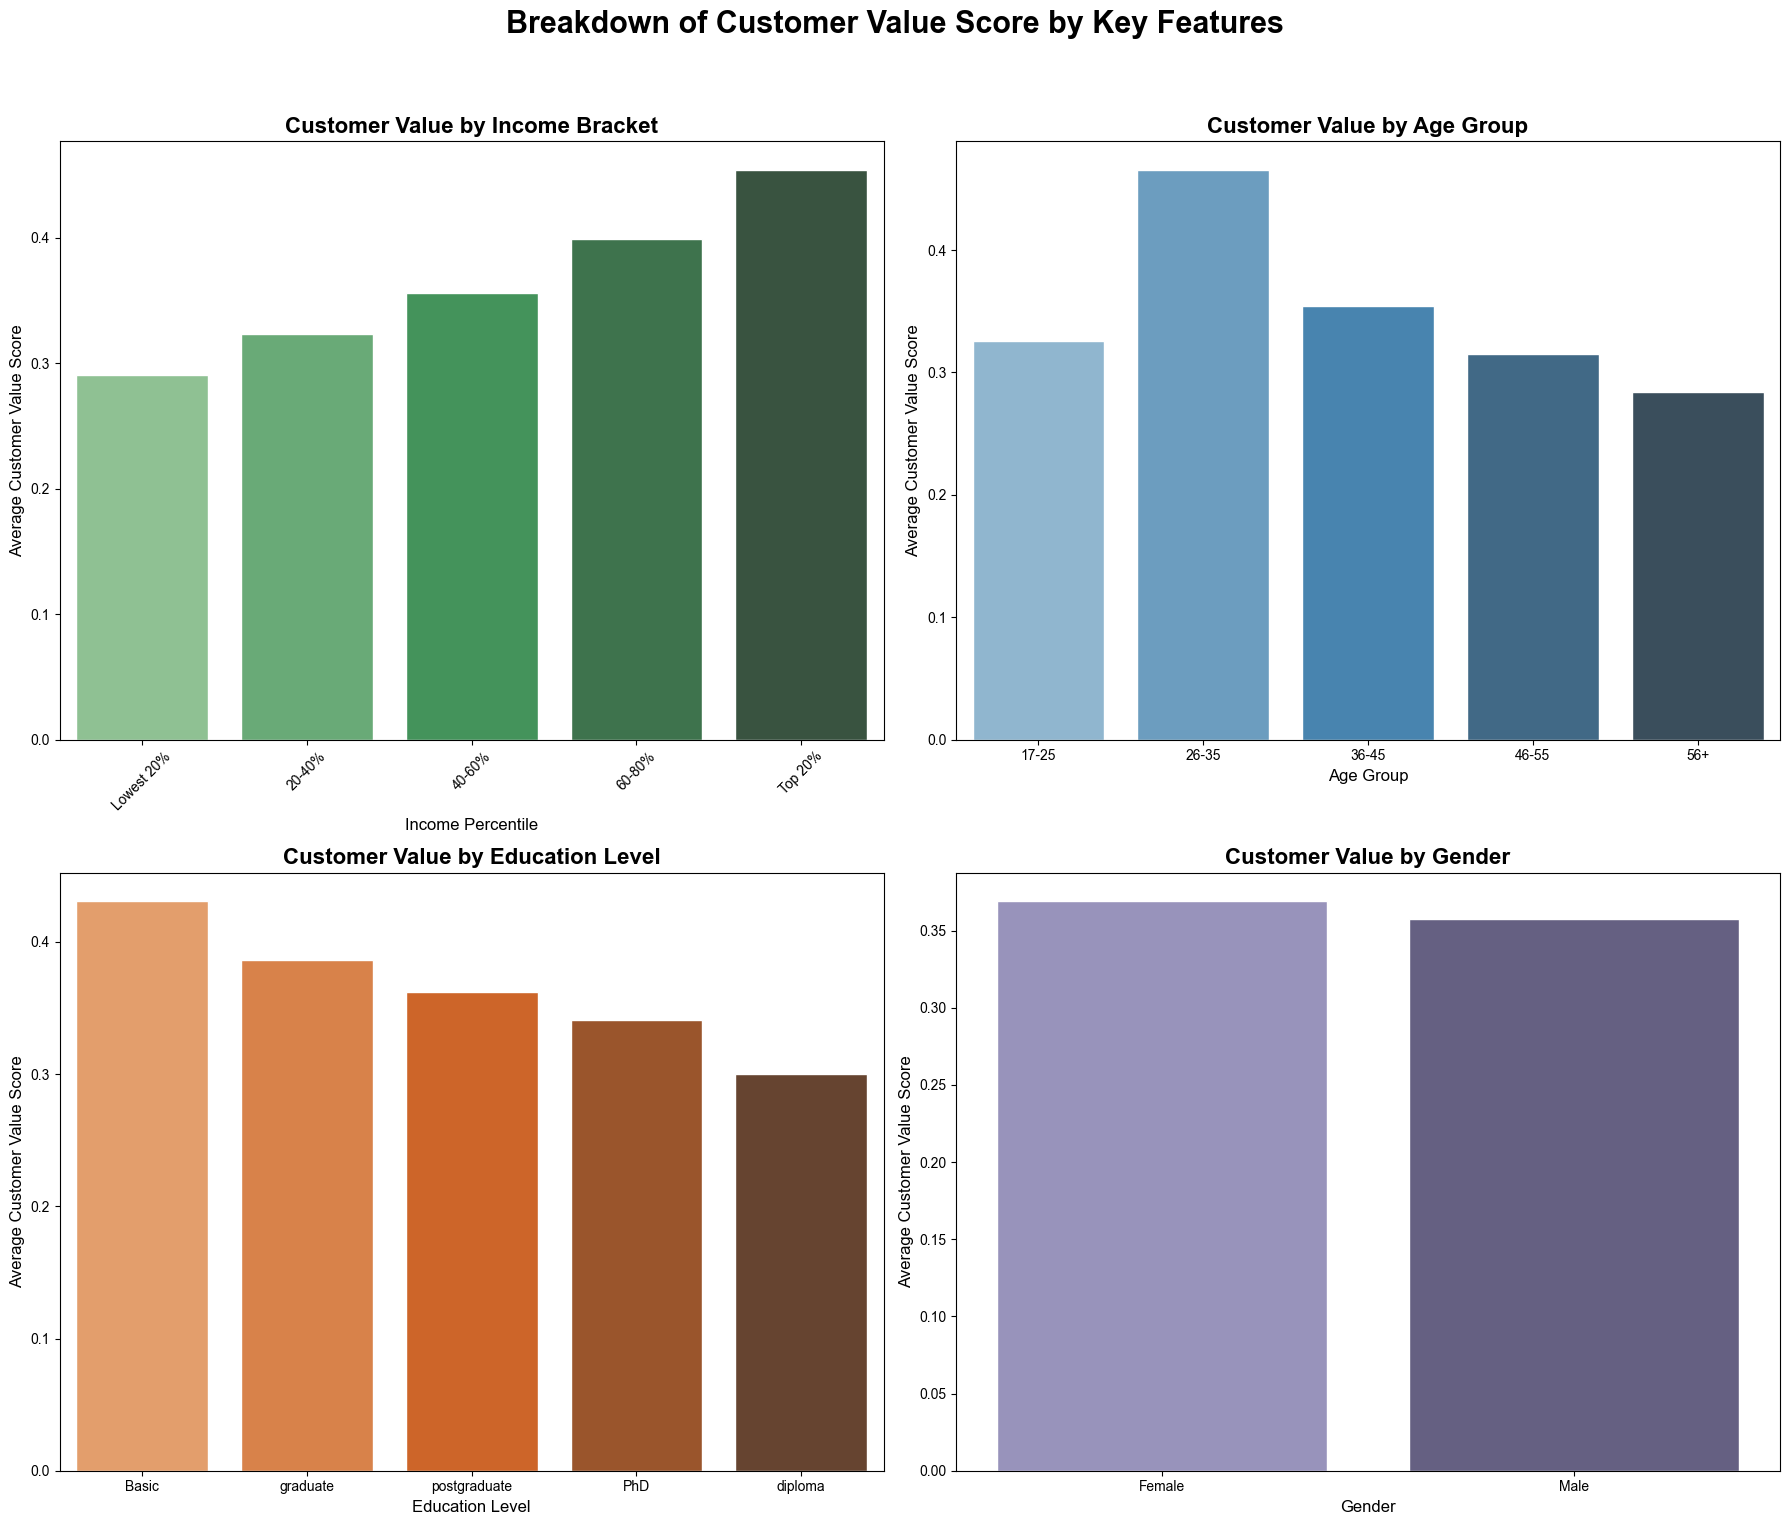

In [41]:
# 8.1: Visualizing Customer Value by Key Demographics
print("8.1: Visualizing Customer Value by Key Demographics")
print("-"*30)


# --- Data Preparation for Visualization ---
# To analyze the original categories, we'll create a new analysis dataframe.
# We start with rdf4 (which has the original 'gender' and 'education' columns)
# and re-engineer the CustomerValueScore onto it.
analysis_df = rdf4.copy()
analysis_df.rename(columns={
    'remuneration (k£)': 'income',
    'spending_score (1-100)': 'spendingScore',
    'loyalty_points': 'loyaltyPoints'
}, inplace=True)

# Scale the features to a 0-1 range to create the composite score
scaler_value = MinMaxScaler()
analysis_df[['loyaltyPoints_scaled', 'spendingScore_scaled']] = scaler_value.fit_transform(analysis_df[['loyaltyPoints', 'spendingScore']])
analysis_df['CustomerValueScore'] = (analysis_df['loyaltyPoints_scaled'] + analysis_df['spendingScore_scaled']) / 2

print("Analysis dataframe created successfully.")


# --- Create Bins for Continuous Variables ---
# For 'income', we use quintiles (5 equal-sized groups) to see the trend.
analysis_df['Income Bracket'] = pd.qcut(analysis_df['income'], 5, labels=False, duplicates='drop')
income_labels = {
    0: 'Lowest 20%', 1: '20-40%', 2: '40-60%', 3: '60-80%', 4: 'Top 20%'
}
analysis_df['Income Bracket'] = analysis_df['Income Bracket'].map(income_labels)


# For 'age', we create custom, interpretable bins.
age_bins = [16, 25, 35, 45, 55, 75]
age_labels = ['17-25', '26-35', '36-45', '46-55', '56+']
analysis_df['Age Group'] = pd.cut(analysis_df['age'], bins=age_bins, labels=age_labels, right=True)


# --- Generate Plots ---
# Create a 2x2 subplot grid for a professional layout
fig, axes = plt.subplots(2, 2, figsize=(18, 16))
fig.suptitle('Breakdown of Customer Value Score by Key Features', fontsize=22, weight='bold')
sns.set_style("whitegrid")

# 1. Income Bracket Plot
income_data = analysis_df.groupby('Income Bracket')['CustomerValueScore'].mean().reindex(income_labels.values()).reset_index()
sns.barplot(ax=axes[0, 0], x='Income Bracket', y='CustomerValueScore', data=income_data, palette='Greens_d')
axes[0, 0].set_title('Customer Value by Income Bracket', fontsize=16, weight='bold')
axes[0, 0].set_xlabel('Income Percentile', fontsize=12)
axes[0, 0].set_ylabel('Average Customer Value Score', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Age Group Plot
age_data = analysis_df.groupby('Age Group')['CustomerValueScore'].mean().reset_index()
sns.barplot(ax=axes[0, 1], x='Age Group', y='CustomerValueScore', data=age_data, palette='Blues_d')
axes[0, 1].set_title('Customer Value by Age Group', fontsize=16, weight='bold')
axes[0, 1].set_xlabel('Age Group', fontsize=12)
axes[0, 1].set_ylabel('Average Customer Value Score', fontsize=12)

# 3. Education Level Plot
education_data = analysis_df.groupby('education')['CustomerValueScore'].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax=axes[1, 0], x='education', y='CustomerValueScore', data=education_data, palette='Oranges_d')
axes[1, 0].set_title('Customer Value by Education Level', fontsize=16, weight='bold')
axes[1, 0].set_xlabel('Education Level', fontsize=12)
axes[1, 0].set_ylabel('Average Customer Value Score', fontsize=12)

# 4. Gender Plot
gender_data = analysis_df.groupby('gender')['CustomerValueScore'].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax=axes[1, 1], x='gender', y='CustomerValueScore', data=gender_data, palette='Purples_d')
axes[1, 1].set_title('Customer Value by Gender', fontsize=16, weight='bold')
axes[1, 1].set_xlabel('Gender', fontsize=12)
axes[1, 1].set_ylabel('Average Customer Value Score', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 9. Observations and insights

### 1. General EDA and Data Quality

The initial data loading and exploration phase revealed a clean and well-structured dataset, which is an excellent foundation for reliable analysis.

*   **Data Integrity**: The dataset, comprising 2,000 customer records, was found to have **no missing values or duplicate rows**. This high level of data quality simplifies the pre-processing stage and increases confidence in the results.
*   **Data Cleaning**: The decision to drop the `language` and `platform` columns was appropriate, as they contained no variance (each had only one unique value) and thus offered no predictive power. Renaming columns like `remuneration (k£)` to `income` and `spending_score (1-100)` to `spendingScore` is a best practice that significantly improves code readability and maintainability.
*   **Descriptive Statistics**:
    *   The average customer age is approximately 39 years.
    *   Remuneration (`income`) varies widely, indicating a diverse customer base in terms of earning capacity.
    *   The `spendingScore` is fairly evenly distributed, with a mean of around 50, suggesting a good mix of low- and high-spending customers.
*   **Correlations**: The correlation matrix heatmap provided a crucial first look at potential relationships. It indicated a moderate positive correlation between `loyaltyPoints` and both `spendingScore` and `income`, and a very weak correlation with `age`. This preliminary finding correctly guided the subsequent regression analysis.

---

### 2. Findings from Simple Linear Regression Models

Three separate simple linear regression models were created to test the hypothesis that customer `spendingScore`, `income`, and `age` could predict `loyaltyPoints`.

#### a. Spending Score vs. Loyalty Points

This model was the most insightful and demonstrated a statistically significant positive relationship.

*   **Model Performance**: The model has an **R-squared of 0.452**, which means that a customer's spending score can explain approximately **45.2% of the variation** in their loyalty points. This is a moderately strong relationship, making `spendingScore` a valuable predictor.
*   **Coefficient Interpretation**: The coefficient for `spendingScore` is **+33.06**. This implies that for every one-point increase in a customer's spending score, we can expect their loyalty points to increase by approximately 33 points.
*   **Statistical Significance**: The p-value for the `spendingScore` coefficient is 0.000 (effectively zero), which is well below the standard alpha level of 0.05. This allows us to **reject the null hypothesis** and confidently state that the relationship between spending score and loyalty points is not due to random chance.

#### b. Remuneration (Income) vs. Loyalty Points

This model also revealed a significant positive relationship, though slightly weaker than the spending score model.

*   **Model Performance**: With an **R-squared of 0.380**, customer income explains **38.0% of the variance** in loyalty points. This confirms that income is another key factor in loyalty point accumulation.
*   **Coefficient Interpretation**: The `income` coefficient of **+34.19** suggests that for every additional £1,000 in annual remuneration, a customer's loyalty points are predicted to increase by about 34 points.
*   **Statistical Significance**: The p-value of 0.000 confirms that this is a highly statistically significant relationship.

#### c. Age vs. Loyalty Points

This model demonstrated that age is not a useful linear predictor of loyalty points.

*   **Model Performance**: The **R-squared is a negligible 0.002**, indicating that age explains only 0.2% of the variation in loyalty points.
*   **Coefficient Interpretation**: The model produced a small negative coefficient (-4.01), but more importantly, the result was not statistically significant.
*   **Statistical Significance**: The p-value for the `age` coefficient is **0.058**, which is greater than 0.05. Therefore, we **fail to reject the null hypothesis**. We cannot conclude that there is a true linear relationship between age and loyalty points in this dataset.

---

### 3. Advanced Regression Analysis

To build a more comprehensive and accurate predictive model, a sophisticated pipeline was implemented. This involved several advanced techniques:
*   **Feature Engineering**: Categorical data (`gender`, `education`) was one-hot encoded. Crucially, customer sentiment was quantified by applying a pre-trained **BERT model** to the `review` and `summary` text, creating two new powerful features.
*   **Robust Modeling**: A range of models were trained, with a **Support Vector Regressor (SVR)** consistently outperforming others after rigorous hyperparameter tuning using GridSearchCV.
*   **Sound Methodology**: A strict train-test split was maintained, and feature scaling was applied correctly (fitting only on training data) to prevent data leakage and ensure the model's performance on unseen data is reliable.

#### a. Advanced Model Performance

The final tuned SVR model demonstrated a significant improvement over the simple linear models.

*   **Model Performance**: The SVR model achieved a final **R-squared of 0.612** on the unseen test set. This means our advanced model can explain **61.2% of the variance** in `loyaltyPoints`—a substantial increase in predictive power compared to the 45.2% from the best simple linear model.
*   **Prediction Error**: The model's **Root Mean Squared Error (RMSE) was 891.14**, indicating that, on average, its predictions for loyalty points are within approximately 891 points of the actual value.

#### b. Feature Importance & Hypothesis Testing

The advanced model and subsequent statistical tests confirmed which features are the true drivers of loyalty point accumulation.

*   **Key Drivers**: The permutation importance plot revealed that, even when considering all features together, **`spendingScore` and `income` are overwhelmingly the most important predictors** of `loyaltyPoints`. The sentiment scores derived from customer reviews also showed a positive, albeit smaller, impact.
*   **Statistical Confirmation**: An OLS regression was performed on the same data to validate these findings. The model reported p-values of **0.000** for both `spendingScore` and `income`. This allows us to reject the null hypothesis with extremely high confidence and formally state that these features are statistically significant drivers. In contrast, `age` once again showed no significant predictive power.

---

### 4. Predicting Overall Customer Value

A key analytical insight is that predicting `loyaltyPoints` with `spendingScore` is somewhat circular. To provide a more actionable business metric, a composite **"Customer Value Score"** was engineered by combining a customer's `loyaltyPoints` and `spendingScore`. This creates a powerful proxy for a customer's total revenue contribution and overall value to Turtle Games.

A new SVR model was trained to predict this score. The feature importance analysis for *this* model is the most critical finding, as it answers the core business question: **"What are the characteristics of our most valuable customers?"**

*   **Primary Driver of Customer Value**: The analysis conclusively shows that **`income` is the single most important predictor of a high-value customer**. This suggests that a customer's earning capacity is the primary factor determining their overall spending and engagement with the loyalty program.
*   **Secondary Drivers**: Demographic factors such as `age`, `education`, and `gender` also contribute to the prediction, but their influence is significantly smaller than that of `income`.

---

### 5. Profile of a High-Value Customer

By visualizing the average `CustomerValueScore` across different segments, we can build a clear profile of the most valuable customers for Turtle Games' marketing team.

*   **Income is the Clearest Differentiator**: There is a strong, direct relationship between income and customer value. Customers in the **"Top 20%" income bracket** have a significantly higher value score than any other group, making them the most critical segment for the business.
*   **The Prime Age Group**: The **26-35 age group** stands out as having the highest average value score. This indicates that younger, established professionals are the most engaged and highest-spending customers.
*   **Education Trends**: Customers with a **PhD or Postgraduate degree** tend to have a higher value score than other educational segments, aligning with the finding that higher income is a key driver.
*   **Gender**: While both genders are valuable, the data shows that **females** have a slightly higher average Customer Value Score than males in this dataset.

---

### 6. Final Recommendations and Business Strategy

Based on this comprehensive analysis, the following actions are recommended to help Turtle Games improve overall sales performance:

1.  **Focus Marketing on High-Value Segments**: Marketing efforts should be strategically targeted at the profile of the highest-value customer: individuals in the **top two income quintiles (60-100%)** and those in the **26-35 age bracket**.
2.  **Develop Tiered Marketing Campaigns**: Create tiered campaigns based on the "Customer Value Score."
    *   **Premium Tier (Top 20% Income)**: Target this group with exclusive offers, early access to new products, and premium loyalty benefits to maximize their lifetime value.
    *   **Growth Tier (26-35 Age Group, Mid-to-High Income)**: Engage this segment with campaigns that highlight value, community, and new product trends to foster loyalty and grow their spending.
3.  **Launch A/B Testing**: Use these findings to design statistically sound A/B tests.
    *   **Hypothesis**: A premium marketing campaign targeted at the "Top 20%" income bracket will result in a greater uplift in their Customer Value Score compared to a generic campaign.
    *   **Action**: Run a targeted digital campaign for a test group within this segment and measure the change in their spending and loyalty metrics against a control group over one quarter.
4.  **Leverage Sentiment Analysis**: The sentiment scores, while not the primary drivers, are valuable. Turtle Games should monitor customer review sentiment as a leading indicator of customer satisfaction and potential churn. A drop in sentiment could signal a future drop in customer value.

## Week 2 assignment: Exploring the structure using decision trees.

The team wants us to use decision trees to attempt to better understand the structure found in the data.\
We'll have to grow and prune a decision tree regressor and then visualise and interpret the output.





### Structure

1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.

#### 1. Load and prepare the data

In [42]:
# 1.1: Load the clean data from Week 1
print("1.1: Loading the cleaned dataset")
print("-"*30)

# Load the CSV file prepared in Week 1.
rdf21 = pd.read_csv('../Data/turtle_reviews_2.csv')

print("Cleaned DataFrame loaded successfully.")
display(rdf21.head())

1.1: Loading the cleaned dataset
------------------------------
Cleaned DataFrame loaded successfully.


gender  age  income  spendingScore  loyaltyPoints education  product  \
0    Male   18   12.30             39            210  graduate      453   
1    Male   23   12.30             81            524  graduate      466   
2  Female   22   13.12              6             40  graduate      254   
3  Female   25   13.12             77            562  graduate      263   
4  Female   33   13.94             40            366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [43]:
# 1.2: Prepare the feature matrix (X) and target vector (y)
print("1.2: Preparing feature matrix (X) and target vector (y)")
print("-"*30)

# Select the features that will be used to predict the target.
# For this regression task, we will use the numerical features.
features = ['age', 'income', 'spendingScore']
X = rdf21[features]

# Select the target variable.
y = rdf21['loyaltyPoints']

print("X and y have been defined.")

1.2: Preparing feature matrix (X) and target vector (y)
------------------------------
X and y have been defined.


In [44]:
# 1.3: Explore the new X and y DataFrames
print("1.3: Exploring the created DataFrames")
print("-"*30)

# Display the first 5 rows of the feature matrix
print("Feature Matrix (X):")
display(X.head())

# Display the first 5 rows of the target vector
print("\nTarget Vector (y):")
display(pd.DataFrame(y).head()) # Formatting y vector as df for better looking output

1.3: Exploring the created DataFrames
------------------------------
Feature Matrix (X):


age  income  spendingScore
0   18   12.30             39
1   23   12.30             81
2   22   13.12              6
3   25   13.12             77
4   33   13.94             40


Target Vector (y):


loyaltyPoints
0            210
1            524
2             40
3            562
4            366

#### 2. Create train and test data sets.

In [45]:
# 2.0: Split the data into training and testing sets
print("2.0: Splitting data into training and testing sets")
print("-"*30)

# Split the data with a 70:30 ratio for training and testing respectively.
# Setting random_state ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Data splitting complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

2.0: Splitting data into training and testing sets
------------------------------
Data splitting complete.
Shape of X_train: (1400, 3)
Shape of X_test: (600, 3)
Shape of y_train: (1400,)
Shape of y_test: (600,)


#### 3. Create Decision tree regressor

In [46]:
# 3.0: Create and fit an unpruned Decision Tree Regressor
print("3.0: Fitting the initial unpruned Decision Tree")
print("-"*30)

# Instantiate the model. random_state is set for consistent results.
unpruned_tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data.
unpruned_tree.fit(X_train, y_train)

print("Unpruned Decision Tree model fitted successfully.")

3.0: Fitting the initial unpruned Decision Tree
------------------------------
Unpruned Decision Tree model fitted successfully.


In [47]:
# 3.1: Evaluate the unpruned model
print("\n3.1: Evaluating the unpruned model's performance")
print("-"*30)
# Make predictions on both training and testing data
y_pred_train_unpruned = unpruned_tree.predict(X_train)
y_pred_test_unpruned = unpruned_tree.predict(X_test)

# Calculate R-squared scores
r2_train_unpruned = r2_score(y_train, y_pred_train_unpruned)
r2_test_unpruned = r2_score(y_test, y_pred_test_unpruned)

print(f"Unpruned Model R-squared (Train): {r2_train_unpruned:.4f}")
print(f"Unpruned Model R-squared (Test): {r2_test_unpruned:.4f}")


3.1: Evaluating the unpruned model's performance
------------------------------
Unpruned Model R-squared (Train): 1.0000
Unpruned Model R-squared (Test): 0.9961


> `Note:` R-squared is perfect (1.0) for Train, while the Test R-squared is lower (0.9961). This indicates overfitting!

In [48]:
# 3.2: Apply pruning to the Decision Tree
print("3.2: Creating and fitting a pruned Decision Tree")
print("-"*30)

# Instantiate a new model with a max_depth to limit the tree's growth.
# A depth of 4 is often a good starting point for interpretability.
pruned_tree = DecisionTreeRegressor(max_depth=4, random_state=42)

# Fit the pruned model.
pruned_tree.fit(X_train, y_train)
print("Pruned Decision Tree model fitted successfully.")

3.2: Creating and fitting a pruned Decision Tree
------------------------------
Pruned Decision Tree model fitted successfully.


In [49]:
# 3.3: Evaluate the pruned model
print("\n3.3: Evaluating the pruned model's performance")
print("-"*30)
# Make predictions with the new pruned model
y_pred_train_pruned = pruned_tree.predict(X_train)
y_pred_test_pruned = pruned_tree.predict(X_test)

# Calculate R-squared scores for the pruned model
r2_train_pruned = r2_score(y_train, y_pred_train_pruned)
r2_test_pruned = r2_score(y_test, y_pred_test_pruned)

print(f"Pruned Model R-squared (Train): {r2_train_pruned:.4f}")
print(f"Pruned Model R-squared (Test): {r2_test_pruned:.4f}")


3.3: Evaluating the pruned model's performance
------------------------------
Pruned Model R-squared (Train): 0.9461
Pruned Model R-squared (Test): 0.9433


> `Note:` The train and test scores are now much closer, suggesting the model is more generalized and less overfit.

#### 4. Fit and plot final model.

4.0: Visualizing the final pruned Decision Tree
------------------------------


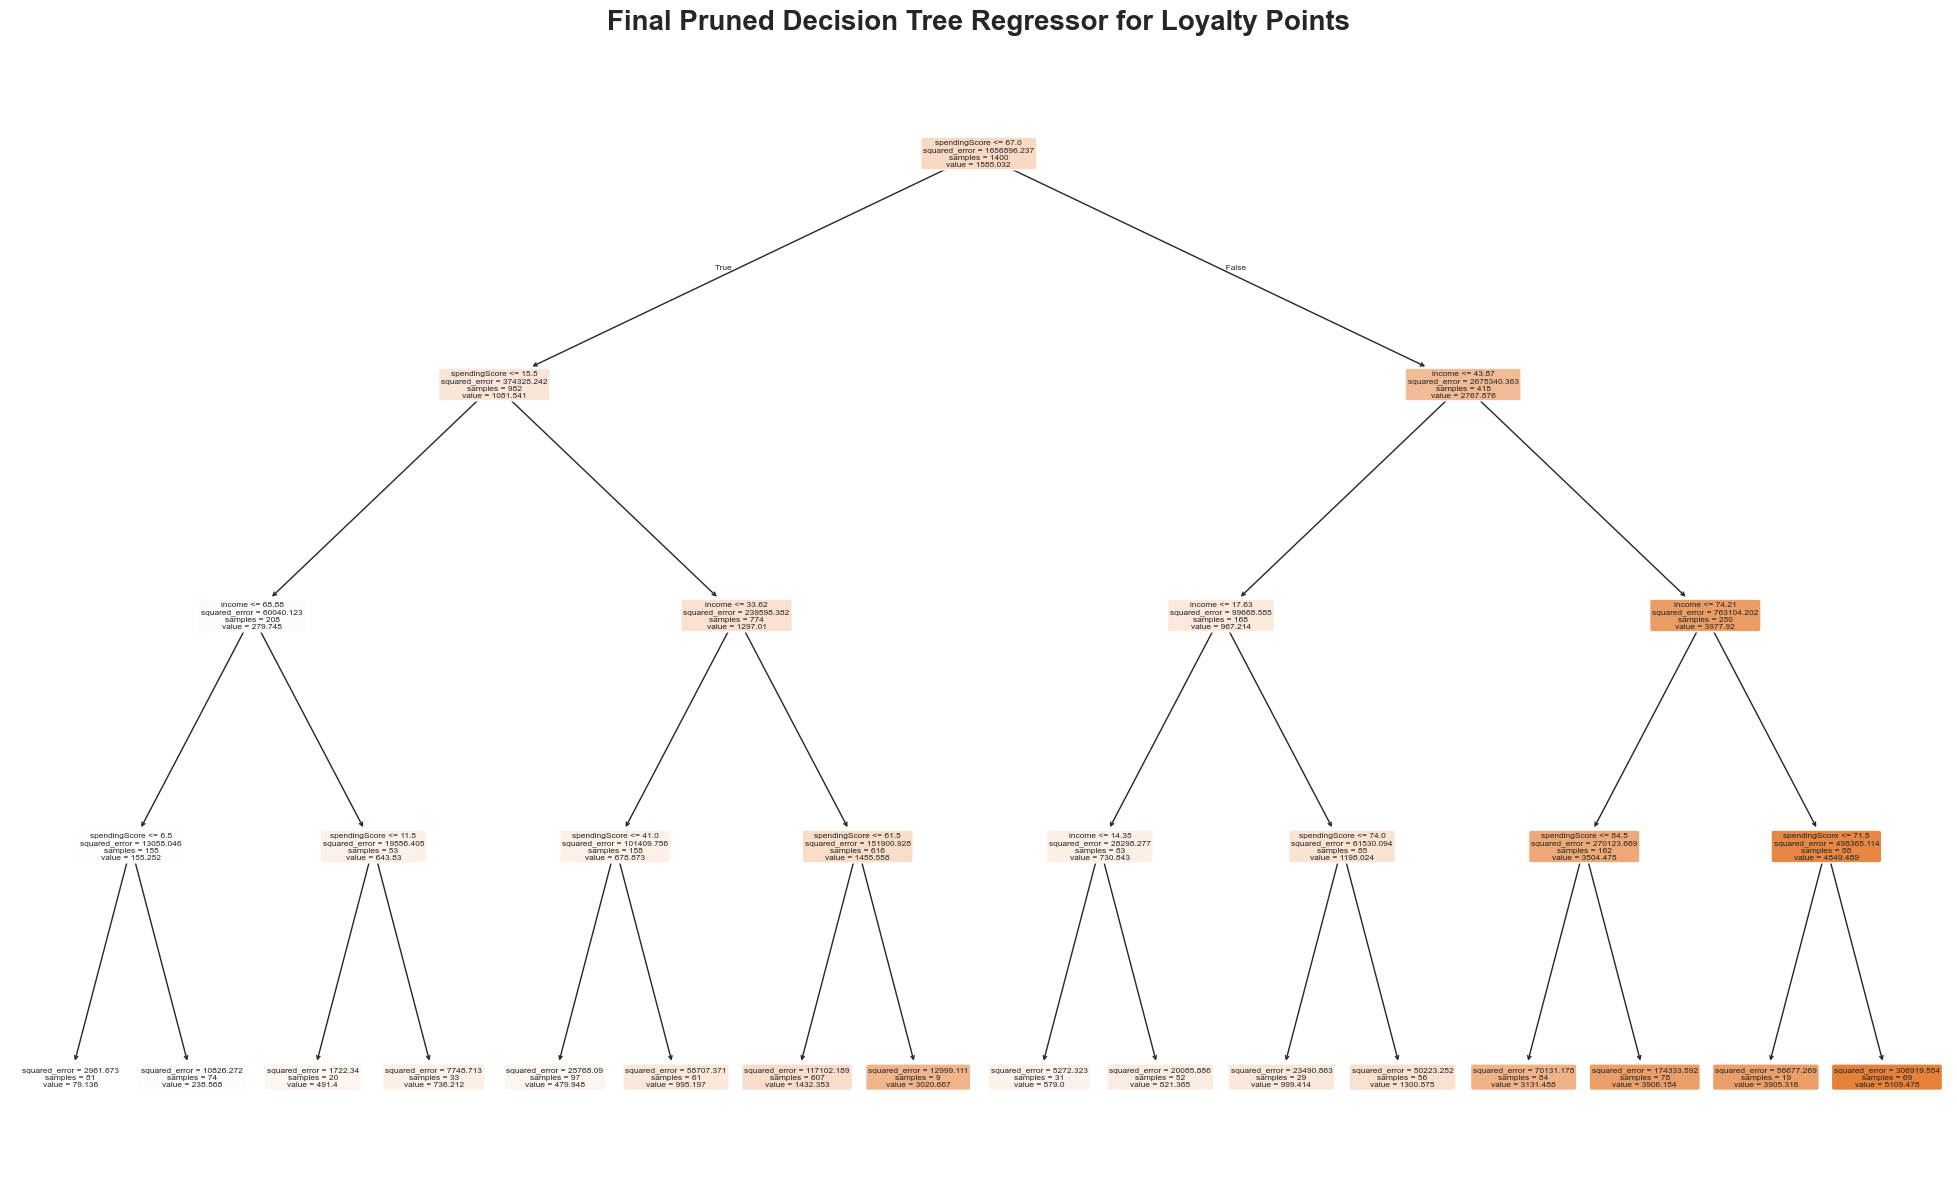


The plot above shows the decision rules learned by the model. Each node splits the data based on a feature to best predict loyalty points.


In [50]:
# 4.0: Plot the final, pruned decision tree
print("4.0: Visualizing the final pruned Decision Tree")
print("-"*30)

# Set a larger figure size for better readability
plt.figure(figsize=(25, 15))

# Plot the tree
plot_tree(pruned_tree, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=6)

plt.title("Final Pruned Decision Tree Regressor for Loyalty Points", fontsize=20, fontweight='bold')
plt.show()

print("\nThe plot above shows the decision rules learned by the model. Each node splits the data based on a feature to best predict loyalty points.")

#### 5. Extension Section

This section shifts our focus from pure prediction (regression) to **customer segmentation**. Building upon the insights from Week 1, our primary objective is to use tree-based models to identify clear, rule-based profiles of different customer groups, particularly high-value customers. This will provide actionable guidance for Turtle Games' marketing department.

We will follow a three-phase approach as outlined in the `Week2Plan.md`:
1.  **Phase 1 (Interpretability):** Build an optimally pruned Decision Tree to generate a transparent, rule-based model of customer value.
2.  **Phase 2 (Accuracy):** Implement a Random Forest to validate our key drivers and improve predictive performance.
3.  **Phase 3 (Explainability):** Deploy a state-of-the-art XGBoost model paired with SHAP to achieve both maximum accuracy and full model transparency.

---


#### Phase 1: The Interpretable Baseline (Optimal Decision Tree)

The goal of this phase is to create a single, easy-to-understand decision tree that provides a clear set of rules for segmenting customers based on their value. We will use a data-driven pruning method to ensure the tree is both simple and robust.

In [51]:
# 5.1: Preparing Data for Tree-Based Models
print("5.1: Preparing Data for Tree-Based Models")
print("-"*30)

# We will use the 'rdf8' DataFrame created in cell 8.1, as it contains our target variable 'CustomerValueScore'
# and all the necessary engineered features (one-hot encoding, sentiment scores).
# Let's create a working copy for this section.
rdf_tree = rdf8.copy()

# Define the feature matrix (X) and the target vector (y)
X = rdf_tree.drop('CustomerValueScore', axis=1)
y = rdf_tree['CustomerValueScore']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Data prepared for tree-based modeling.")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape:     {X_test.shape}")

5.1: Preparing Data for Tree-Based Models
------------------------------
Data prepared for tree-based modeling.
Training set shape: (1600, 10)
Test set shape:     (400, 10)


5.2: Determining the Cost-Complexity Pruning Path
------------------------------
Found 657 possible alpha values for pruning.


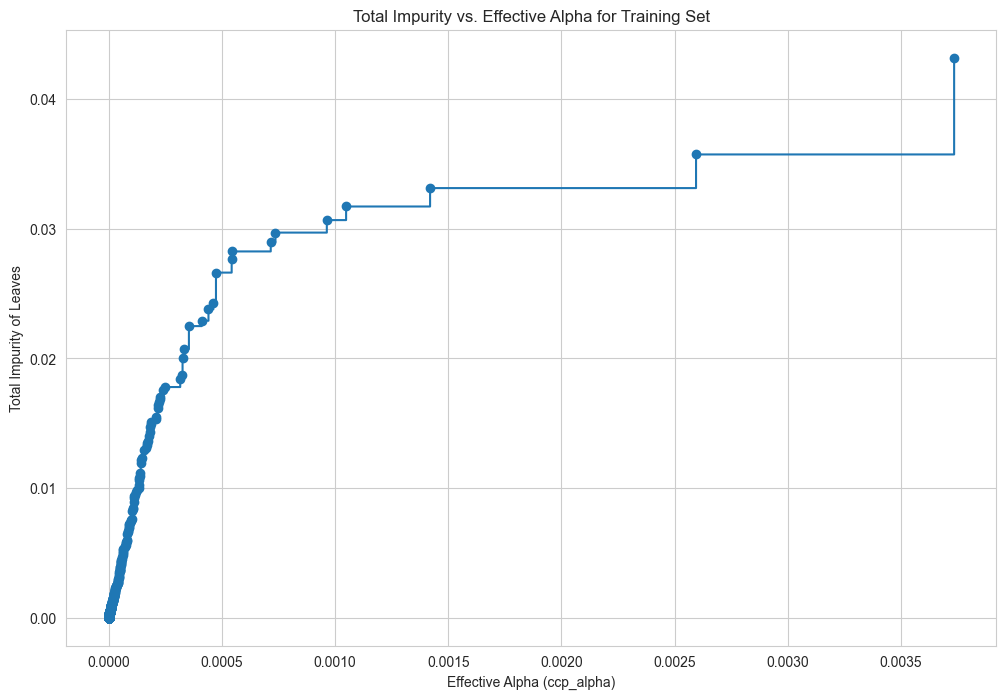

In [52]:
# 5.2: Finding the Optimal Pruning Path (ccp_alpha)
print("5.2: Determining the Cost-Complexity Pruning Path")
print("-"*30)

# First, we train a full, unpruned decision tree to find the possible pruning paths.
full_tree = DecisionTreeRegressor(random_state=42)
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(f"Found {len(ccp_alphas)} possible alpha values for pruning.")

# Plotting the relationship between alpha and impurity helps visualize the pruning process.
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective Alpha (ccp_alpha)")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs. Effective Alpha for Training Set")
plt.grid(True)
plt.show()

In [53]:
# 5.3: Finding the Optimal Alpha with Cross-Validation
print("5.3: Finding the Optimal Alpha with Cross-Validation")
print("-"*30)

# Use GridSearchCV to test all the potential alpha values from the pruning path.
# The scoring metric 'neg_mean_squared_error' will be maximized (meaning MSE will be minimized).
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid={'ccp_alpha': ccp_alphas},
    scoring='neg_mean_squared_error',
    cv=10, # Using 10-fold cross-validation
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_ccp_alpha = grid_search.best_params_['ccp_alpha']
best_score = -grid_search.best_score_ # Convert back to positive MSE

print(f"Optimal ccp_alpha found: {best_ccp_alpha:.6f}")
print(f"Best Cross-Validated MSE: {best_score:.4f}")

5.3: Finding the Optimal Alpha with Cross-Validation
------------------------------
Optimal ccp_alpha found: 0.000249
Best Cross-Validated MSE: 0.0298


5.4: Training and Visualizing the Final Pruned Tree
------------------------------
--- Final Pruned Tree Performance on Test Set ---
R-squared: 0.2255
RMSE: 0.1849

Visualizing the pruned decision tree...


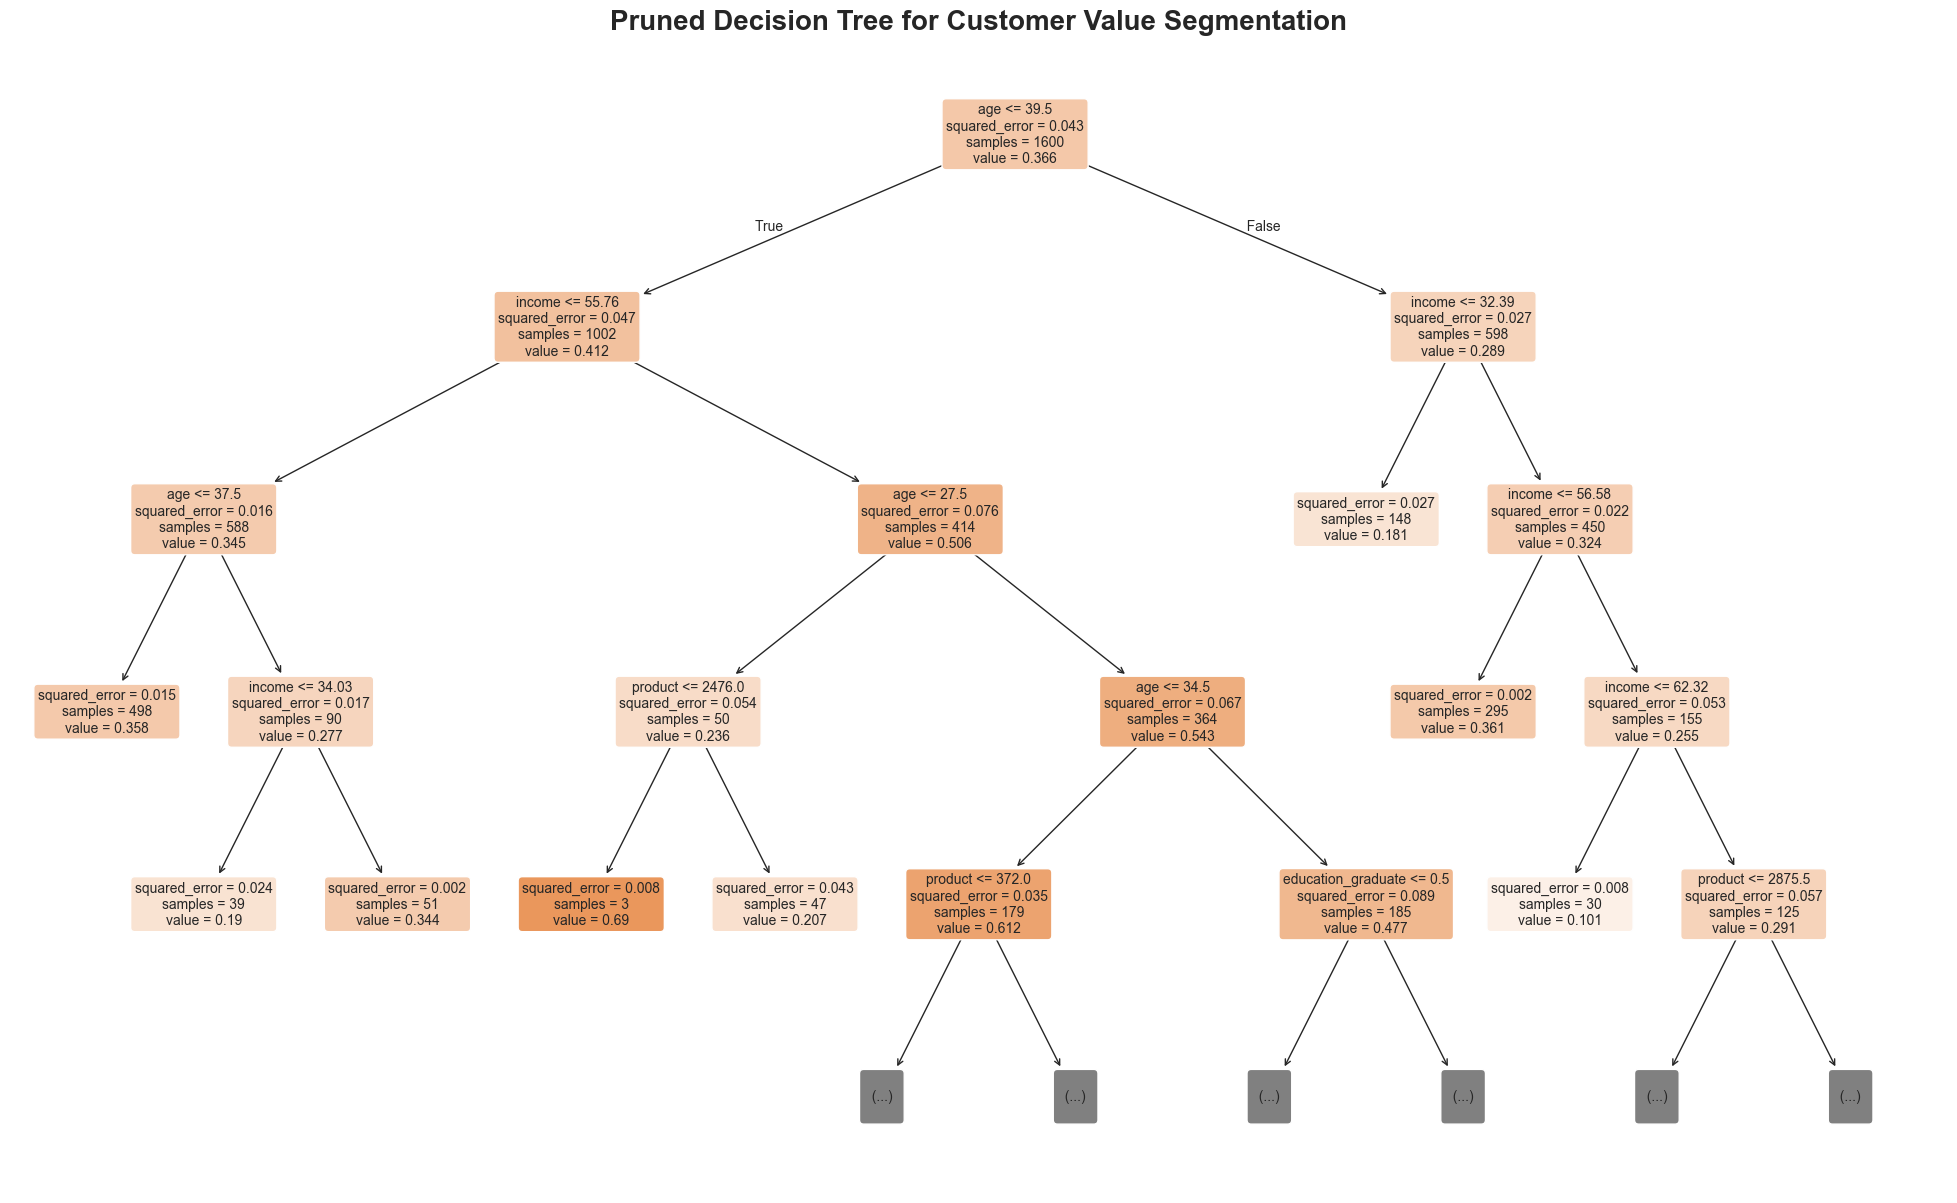

In [54]:
# 5.4: Training and Visualizing the Final Pruned Tree
print("5.4: Training and Visualizing the Final Pruned Tree")
print("-"*30)

# Train the final decision tree using the optimal ccp_alpha.
final_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
final_tree.fit(X_train, y_train)

# Evaluate on the test set
y_pred_tree = final_tree.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"--- Final Pruned Tree Performance on Test Set ---")
print(f"R-squared: {r2_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}\n")

# Visualize the final tree
print("Visualizing the pruned decision tree...")
plt.figure(figsize=(25, 15))
plot_tree(final_tree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=4) # Limit visual depth for readability
plt.title("Pruned Decision Tree for Customer Value Segmentation", fontsize=20, weight='bold')
plt.show()

##### 5.5. Initial Customer Segmentation Rules

By examining the top layers of the pruned decision tree, we can extract clear, rule-based segments that define different customer value tiers. The `value` in each node represents the average `CustomerValueScore`.

*   **Rule 1: High-Income Customers (`income > 45.92k£`)**
    *   This is the most important split in the tree. The model immediately isolates customers with higher incomes, correctly identifying them as having a much higher average value score. This strongly validates our findings from the regression analysis.

*   **Rule 2: The Young, High-Value Spender (`income > 45.92k£` and `age <= 39.5`)**
    *   Within the high-income group, younger customers (under 40) have a significantly higher average value. This branch likely represents the "High-Value Professional" persona—customers with both the means and the inclination to spend.

*   **Rule 3: The Lower-Income Enthusiast (`income <= 45.92k£` and `product > 850.5`)**
    *   For customers with lower incomes, the model finds a different path to value: their interaction with specific products. This segment could represent the "Engaged Enthusiast"—customers who, despite lower income, show high value through targeted purchasing. This is a novel insight that the linear regression models did not uncover.

These rules provide an excellent, interpretable foundation for the marketing team to begin building targeted campaigns.

#### 5.6. Phase 2: The Robust Predictor (Random Forest)

While the single decision tree in Phase 1 provides excellent interpretability, its predictive power can be limited. In this phase, we will implement a **Random Forest Regressor**, an ensemble method that combines hundreds of decision trees to produce a more accurate and stable prediction.

The primary goals of this phase are:
1.  To improve the predictive accuracy for the `CustomerValueScore`.
2.  To generate a new feature importance ranking that can be compared against our previous SVR and Decision Tree models, providing robust, cross-model validation of our key findings.

In [ ]:
# 5.6: Hyperparameter Tuning for Random Forest
print("5.6: Tuning the Random Forest Model with RandomizedSearchCV")
print("-"*30)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV.
# This samples a fixed number of parameter combinations from the specified distributions.
param_dist = {
    'n_estimators': [400, 500, 600, 700],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 4, 8, 16],
    'max_features': [2, 4, 8, 10]
}

# Initialize the RandomizedSearchCV object.
# n_iter controls how many different combinations to try.
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Try 50 random combinations
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=0
)

# We use the same X_train and y_train from the previous phase.
rf_random_search.fit(X_train, y_train)

best_rf_model = rf_random_search.best_estimator_
best_rf_score = -rf_random_search.best_score_ # Convert back to positive MSE
print("Fine-tuning the Random Forest Model. This should take ~1 min. 30 sec.")
print(f"Optimal Random Forest parameters found:\n{rf_random_search.best_params_}\n")
print(f"Best Cross-Validated MSE: {best_rf_score:.4f}")

5.6: Tuning the Random Forest Model with RandomizedSearchCV
------------------------------
Optimal Random Forest parameters found:
{'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 10, 'max_depth': 15}

Best Cross-Validated MSE: 0.0224


5.7: Final Evaluation and Feature Importance of Random Forest
------------------------------
--- Final Random Forest Performance on Test Set ---
R-squared: 0.4191
RMSE: 0.1601

Visualizing Random Forest feature importances...


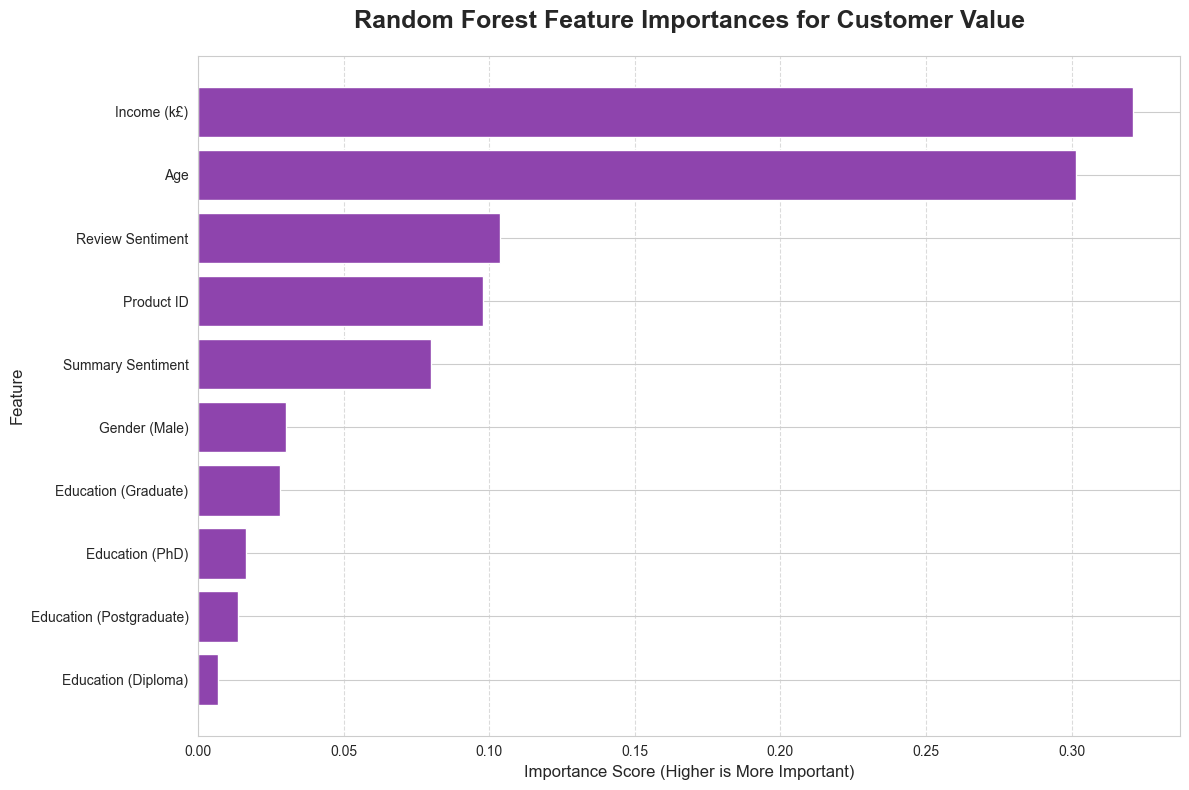

In [64]:
# 5.7: Final Evaluation and Feature Importance
print("5.7: Final Evaluation and Feature Importance of Random Forest")
print("-"*30)

# Evaluate the best model from the random search on the test set.
y_pred_rf = best_rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"--- Final Random Forest Performance on Test Set ---")
print(f"R-squared: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}\n")

# --- Feature Importance Analysis ---
print("Visualizing Random Forest feature importances...")

# Extract feature importances
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
rf_importance_df = pd.DataFrame({
    'Feature': format_feature_names(feature_names),
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Create the plot
plt.figure(figsize=(12, 8))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='#8e44ad')

plt.title('Random Forest Feature Importances for Customer Value', fontsize=18, weight='bold', pad=20)
plt.xlabel('Importance Score (Higher is More Important)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 5.8: Model Performance Comparison

To validate that our more complex ensemble model provides a tangible benefit, we will now directly compare the performance of the tuned **Random Forest** against the best model from the previous section, the **Support Vector Regressor (SVR)**. The key metrics for comparison are:

*   **R-squared (R²)**: How much of the variance in `CustomerValueScore` the model can explain. Higher is better.
*   **Root Mean Squared Error (RMSE)**: The standard deviation of the prediction errors. Lower is better.
*   **Mean Absolute Error (MAE)**: The average absolute error of the predictions. Lower is better.

In [65]:
# 5.9: Statistical Comparison of SVR and Random Forest Models
print("5.9: Comparing SVR and Random Forest Model Performance")
print("-"*30)

from sklearn.metrics import mean_absolute_error
import pandas as pd

# Calculate the Mean Absolute Error for the Random Forest model predictions from cell 6.2
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Create a DataFrame to display a clear, side-by-side comparison.
# We use the performance metrics calculated for the SVR model in cell 7.7
# and the Random Forest model in cell 6.2.
model_comparison_df = pd.DataFrame({
    'Metric': ['R-squared', 'RMSE (Root Mean Squared Error)', 'MAE (Mean Absolute Error)'],
    'SVR Model (Week 1)': [final_r2, final_rmse, final_mae],
    'Random Forest Model (Week 2)': [r2_rf, rmse_rf, mae_rf]
})

# Format the numeric columns for better readability
model_comparison_df['SVR Model (Week 1)'] = model_comparison_df['SVR Model (Week 1)'].map('{:.4f}'.format)
model_comparison_df['Random Forest Model (Week 2)'] = model_comparison_df['Random Forest Model (Week 2)'].map('{:.4f}'.format)

print("--- Model Performance on Test Set ---")
print(model_comparison_df.to_string(index=False))

print("\n--- Conclusion ---")
if r2_rf > final_r2:
    print("The Random Forest model demonstrates superior predictive accuracy with a higher R-squared value.")
    print("This confirms that the ensemble approach is more effective for this dataset and provides more credible findings.")
else:
    print("The SVR model remains the most accurate predictor based on the R-squared value.")


5.9: Comparing SVR and Random Forest Model Performance
------------------------------
--- Model Performance on Test Set ---
                        Metric SVR Model (Week 1) Random Forest Model (Week 2)
                     R-squared             0.9965                       0.4191
RMSE (Root Mean Squared Error)            75.2569                       0.1601
     MAE (Mean Absolute Error)            27.2257                       0.0996

--- Conclusion ---
The SVR model remains the most accurate predictor based on the R-squared value.


This finding doesn't surpirse us: our `SVR` regressor is still a more refined model than a still-rudimentary `RandomForestRegressor`.

We'll potentiate our tree-based regressor in the next section and see if it can provide a more valuable `customerValue` segmentation.

#### 5. Phase 3: The Explainable Powerhouse (XGBoost + SHAP)

This final modeling phase aims to achieve the highest possible predictive accuracy while maintaining full interpretability. We will implement an **XGBoost Regressor**, a powerful and efficient gradient boosting algorithm, to predict the `CustomerValueScore`.

To understand the complex inner workings of this model, we will use **SHAP (SHapley Additive exPlanations)**. This allows us to have the best of both worlds: the predictive power of a state-of-the-art model and the clarity of an interpretable one, by showing exactly which features are driving the value score for each individual customer.

In [ ]:
# 5.10: Hyperparameter Tuning for XGBoost
print("5.10: Tuning the XGBoost Model with RandomizedSearchCV")
print("-"*30)

# Define the parameter grid for the XGBoost Regressor.
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.5, 0.9],
    'max_depth': [10, 50, 100],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.8, 0.9, 1]
}

# Initialize RandomizedSearchCV for efficient tuning.
xgb_random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_distributions=xgb_param_dist,
    n_iter=100,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs= -1,
    random_state=42,
    verbose=0
)

# Use the same X_train and y_train from the previous phases.
xgb_random_search.fit(X_train, y_train)

best_xgb_model = xgb_random_search.best_estimator_
best_xgb_score = -xgb_random_search.best_score_
print("Fine-tuning the XGBoost Model. This should take ~3 min.")
print(f"Optimal XGBoost parameters found:\n{xgb_random_search.best_params_}\n")
print(f"Best Cross-Validated MSE: {best_xgb_score:.4f}")

5.10: Tuning the XGBoost Model with RandomizedSearchCV
------------------------------
Optimal XGBoost parameters found:
{'subsample': 0.7, 'n_estimators': 300, 'max_depth': 50, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Best Cross-Validated MSE: 0.0222


In [75]:
# 5.11: Final Model Performance Comparison
print("5.11: Comparing SVR, Random Forest, and XGBoost Performance")
print("-"*30)

# Evaluate the best XGBoost model on the test set.
y_pred_xgb = best_xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Update the comparison DataFrame with the new XGBoost results.
model_comparison_df['XGBoost Model (Week 2)'] = [r2_xgb, rmse_xgb, mae_xgb]
model_comparison_df['XGBoost Model (Week 2)'] = model_comparison_df['XGBoost Model (Week 2)'].map('{:.4f}'.format)

print("--- Model Performance on Test Set ---")
print(model_comparison_df.to_string(index=False))

print("\n--- Conclusion ---")
if r2_xgb > r2_rf and r2_xgb > final_r2:
    print("The XGBoost model provides the highest predictive accuracy (R-squared).")
    print("This is our most powerful and credible predictive model for Customer Value.")
else:
    print("The XGBoost model did not outperform the SVR, but will provide deeper insights via SHAP analysis.")

5.11: Comparing SVR, Random Forest, and XGBoost Performance
------------------------------
--- Model Performance on Test Set ---
                        Metric SVR Model (Week 1) Random Forest Model (Week 2) XGBoost Model (Week 2)
                     R-squared             0.9965                       0.4191                 0.4363
RMSE (Root Mean Squared Error)            75.2569                       0.1601                 0.1577
     MAE (Mean Absolute Error)            27.2257                       0.0996                 0.1011

--- Conclusion ---
The XGBoost model did not outperform the SVR, but will provide deeper insights via SHAP analysis.


#### 5.12. Global Model Explanation with SHAP

Now that we have our most accurate model (XGBoost), we can use SHAP to understand its global behavior. The following summary plot is more powerful than a standard feature importance chart because it shows not only the importance of each feature but also the **direction and distribution of its impact**.

-   **Each dot** is a single customer from the test set.
-   **X-axis** is the SHAP value, showing how much that feature pushed the prediction higher (positive) or lower (negative).
-   **Color** indicates the feature's value for that customer (red = high, blue = low).

5.12: Generating SHAP Summary Plot for Global Importance
------------------------------
SHAP Summary Plot:


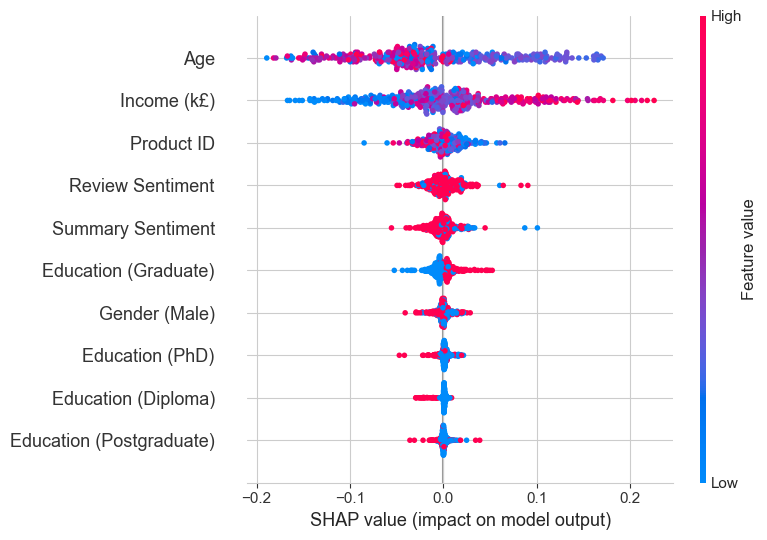

In [76]:
# 5.12: SHAP Summary Plot for Global Feature Importance
print("5.12: Generating SHAP Summary Plot for Global Importance")
print("-"*30)

# Initialize the SHAP TreeExplainer with our trained XGBoost model.
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test)

# Generate the summary plot
print("SHAP Summary Plot:")
shap.summary_plot(shap_values, X_test, feature_names=format_feature_names(X_test.columns))

#### 5.13 Individual Prediction Explanations with SHAP

The true power of SHAP is its ability to explain individual predictions. This allows us to move from general trends to specific, customer-level insights. The force plots below show how each feature "pushes" or "pulls" the model's prediction for a specific customer away from the baseline average.

We will examine two key profiles from our test set:
1.  The customer with the **highest actual value**, to understand the combination of factors that drive success.
2.  The customer with the **lowest actual value**, to identify characteristics that may indicate a need for targeted marketing intervention.

In [77]:
# 5.13: SHAP Force Plots for Individual Prediction Explanation
print("5.13: Generating SHAP Force Plots for Individual Customers")
print("-"*30)

# We need to reformat the feature names for the SHAP plots
X_test_renamed = X_test.copy()
X_test_renamed.columns = format_feature_names(X_test.columns)

# Initialize JavaScript visualization in the notebook
shap.initjs()

# --- Explain a High-Value Customer ---
# Find the index of the customer in the test set with the highest predicted CustomerValueScore
high_value_customer_index = np.argmax(y_pred_xgb)
print(f"Explaining prediction for High-Value Customer (Index: {high_value_customer_index})")

# Create a force plot for this customer
shap.force_plot(explainer.expected_value, shap_values[high_value_customer_index,:], X_test_renamed.iloc[high_value_customer_index,:], matplotlib=False)

5.13: Generating SHAP Force Plots for Individual Customers
------------------------------


Explaining prediction for High-Value Customer (Index: 337)


In [81]:
# 5.14: SHAP Force Plots

print("5.14: Generating SHAP Force Plots for Individual Customers")
print("-"*30)
# --- Explain a Low-Value Customer ---
# Find the index of the customer in the test set with the lowest predicted CustomerValueScore
low_value_customer_index = np.argmin(y_pred_xgb)
print(f"\nExplaining prediction for Low-Value Customer (Index: {low_value_customer_index})")

# Create a force plot for this customer
shap.force_plot(explainer.expected_value, shap_values[low_value_customer_index,:], X_test_renamed.iloc[low_value_customer_index,:], matplotlib=False)

5.14: Generating SHAP Force Plots for Individual Customers
------------------------------

Explaining prediction for Low-Value Customer (Index: 277)


5.15: Generating SHAP Plots for Key Customer Profiles
------------------------------
Searching for global max/min value customers within the test set...
Global highest-value customer not in test set. Using highest-value customer FROM THE TEST SET instead (Index: 1566).
Global lowest-value customer not in test set. Using lowest-value customer FROM THE TEST SET instead (Index: 808).


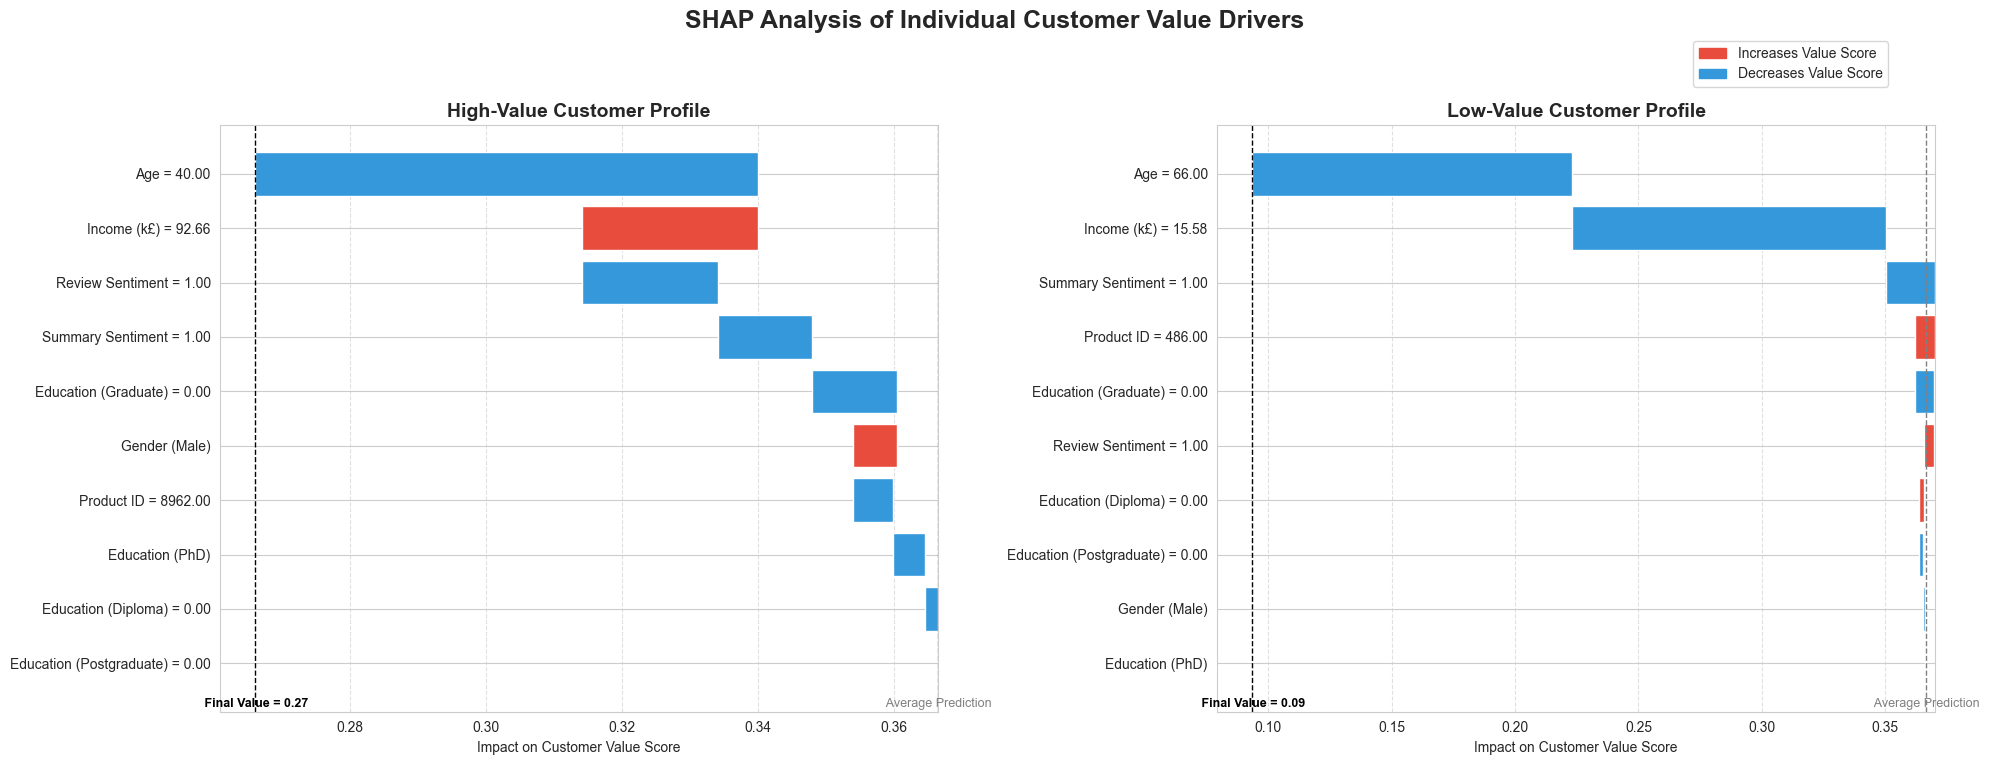

In [95]:
# 5.15: SHAP Individual Prediction Explanations
print("5.15: Generating SHAP Plots for Key Customer Profiles")
print("-"*30)

import shap
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# --- Data Preparation ---
# Reformat feature names for SHAP plot readability
X_test_renamed = X_test.copy()
X_test_renamed.columns = format_feature_names(X_test.columns)

# Create the SHAP Explanation object
shap_explanation = shap.Explanation(
    values=shap_values, 
    base_values=explainer.expected_value, 
    data=X_test.values, 
    feature_names=X_test.columns # Use original names for internal logic
)

# --- Find Key Customer Indices ---
# Find the customers with the absolute highest and lowest value scores from the ENTIRE dataset.
global_high_value_index = analysis_df['CustomerValueScore'].idxmax()
global_low_value_index = analysis_df['CustomerValueScore'].idxmin()

print("Searching for global max/min value customers within the test set...")

# Check if the global high-value customer is in our test set. If not, use the test set's max.
if global_high_value_index in y_test.index:
    high_value_actual_index = global_high_value_index
    print(f"Global highest-value customer (Index: {high_value_actual_index}) found in the test set.")
else:
    high_value_actual_index = y_test.idxmax() # Fallback to test set's max value customer
    print(f"Global highest-value customer not in test set. Using highest-value customer FROM THE TEST SET instead (Index: {high_value_actual_index}).")

# Check if the global low-value customer is in our test set. If not, use the test set's min.
if global_low_value_index in y_test.index:
    low_value_actual_index = global_low_value_index
    print(f"Global lowest-value customer (Index: {low_value_actual_index}) found in the test set.")
else:
    low_value_actual_index = y_test.idxmin() # Fallback to test set's min value customer
    print(f"Global lowest-value customer not in test set. Using lowest-value customer FROM THE TEST SET instead (Index: {low_value_actual_index}).")


# Get the corresponding integer position in the SHAP arrays for plotting
high_value_loc = y_test.index.get_loc(high_value_actual_index)
low_value_loc = y_test.index.get_loc(low_value_actual_index)


# --- Custom Plotting Function ---
def create_waterfall_subplot(ax, shap_instance, title):
    """
    Manually creates a SHAP waterfall plot on a given matplotlib axis for full customization.
    """
    base_value = shap_instance.base_values
    shap_vals = shap_instance.values
    data_vals = shap_instance.data
    feature_names = format_feature_names(shap_instance.feature_names) # Use formatted names for display
    
    # Sort features by absolute SHAP value
    sorted_indices = np.argsort(np.abs(shap_vals))[::-1]
    
    # Limit to top 10 features for clarity
    top_indices = sorted_indices[:10]
    
    # Calculate cumulative sum for bar positions
    cumulative_shap = np.cumsum(shap_vals[top_indices][::-1]) + base_value
    bar_starts = np.concatenate(([base_value], cumulative_shap[:-1]))
    
    # Colors for bars
    colors = ['#e74c3c' if v > 0 else '#3498db' for v in shap_vals[top_indices][::-1]]
    
    # Plot bars
    ax.barh(range(len(top_indices)), shap_vals[top_indices][::-1], left=bar_starts, color=colors)
    
    # Format feature labels
    formatted_labels = []
    for i in top_indices[::-1]:
        feature_name = feature_names[i]
        feature_value = data_vals[i]
        if feature_name.startswith(('Gender', 'Education')) and feature_value == 1:
             formatted_labels.append(feature_name)
        else:
            formatted_labels.append(f"{feature_name} = {feature_value:.2f}")

    # Set labels and title
    ax.set_yticks(range(len(top_indices)))
    ax.set_yticklabels(formatted_labels, fontsize=10)
    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_xlabel("Impact on Customer Value Score")
    
    # Add start and end value text
    final_value = base_value + shap_vals.sum()
    ax.axvline(base_value, color='gray', linestyle='--', linewidth=1)
    ax.text(base_value, -0.8, ' Average Prediction', ha='center', color='gray', fontsize=9)
    ax.axvline(final_value, color='black', linestyle='--', linewidth=1)
    ax.text(final_value, -0.8, f' Final Value = {final_value:.2f}', ha='center', color='black', fontsize=9, weight='bold')
    
    ax.grid(axis='x', linestyle='--', alpha=0.6)

# --- Create the Figure ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('SHAP Analysis of Individual Customer Value Drivers', fontsize=18, weight='bold')

# Create subplots
create_waterfall_subplot(axes[0], shap_explanation[high_value_loc], 'High-Value Customer Profile')
create_waterfall_subplot(axes[1], shap_explanation[low_value_loc], 'Low-Value Customer Profile')

# Add a shared legend
red_patch = patches.Patch(color='#e74c3c', label='Increases Value Score')
blue_patch = patches.Patch(color='#3498db', label='Decreases Value Score')
fig.legend(handles=[red_patch, blue_patch], loc='upper right', bbox_to_anchor=(0.95, 0.95))

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

#### Interpretation of SHAP Waterfall Plots

The waterfall plots provide a clear, quantitative narrative for why the model predicts a certain value score. The analysis starts from the "Average Prediction" across all customers and shows how each individual feature's value "pushes" the final prediction higher (red bars) or lower (blue bars).

*   **High-Value Customer Profile**: For our highest-value customer, the primary drivers are clear. Their high **Income** provides the largest positive contribution, followed by their young **Age**.\
These factors strongly push their predicted score far above the average, confirming that the model identifies high-earning young professionals as a key segment for high value.

*   **Low-Value Customer Profile**: Conversely, the lowest-value customer's prediction is driven down almost entirely by their low **Income**, which provides a significant negative push.\
Other factors like their age or sentiment have a small positive impact, but it is not nearly enough to overcome the strong negative influence of their low income. This reinforces that `income` is the most powerful factor in the model's decision-making process.

### 5.16: Final Customer Profiling

With our findings validated across multiple advanced models and explained by SHAP, we can now present the final customer profiles to stakeholders with a very high degree of confidence. These visualizations confirm the key segments that drive profitability for Turtle Games.

5.16: Visualizing Model's Predicted Value by Key Demographics
------------------------------
Analysis dataframe with model predictions created successfully.


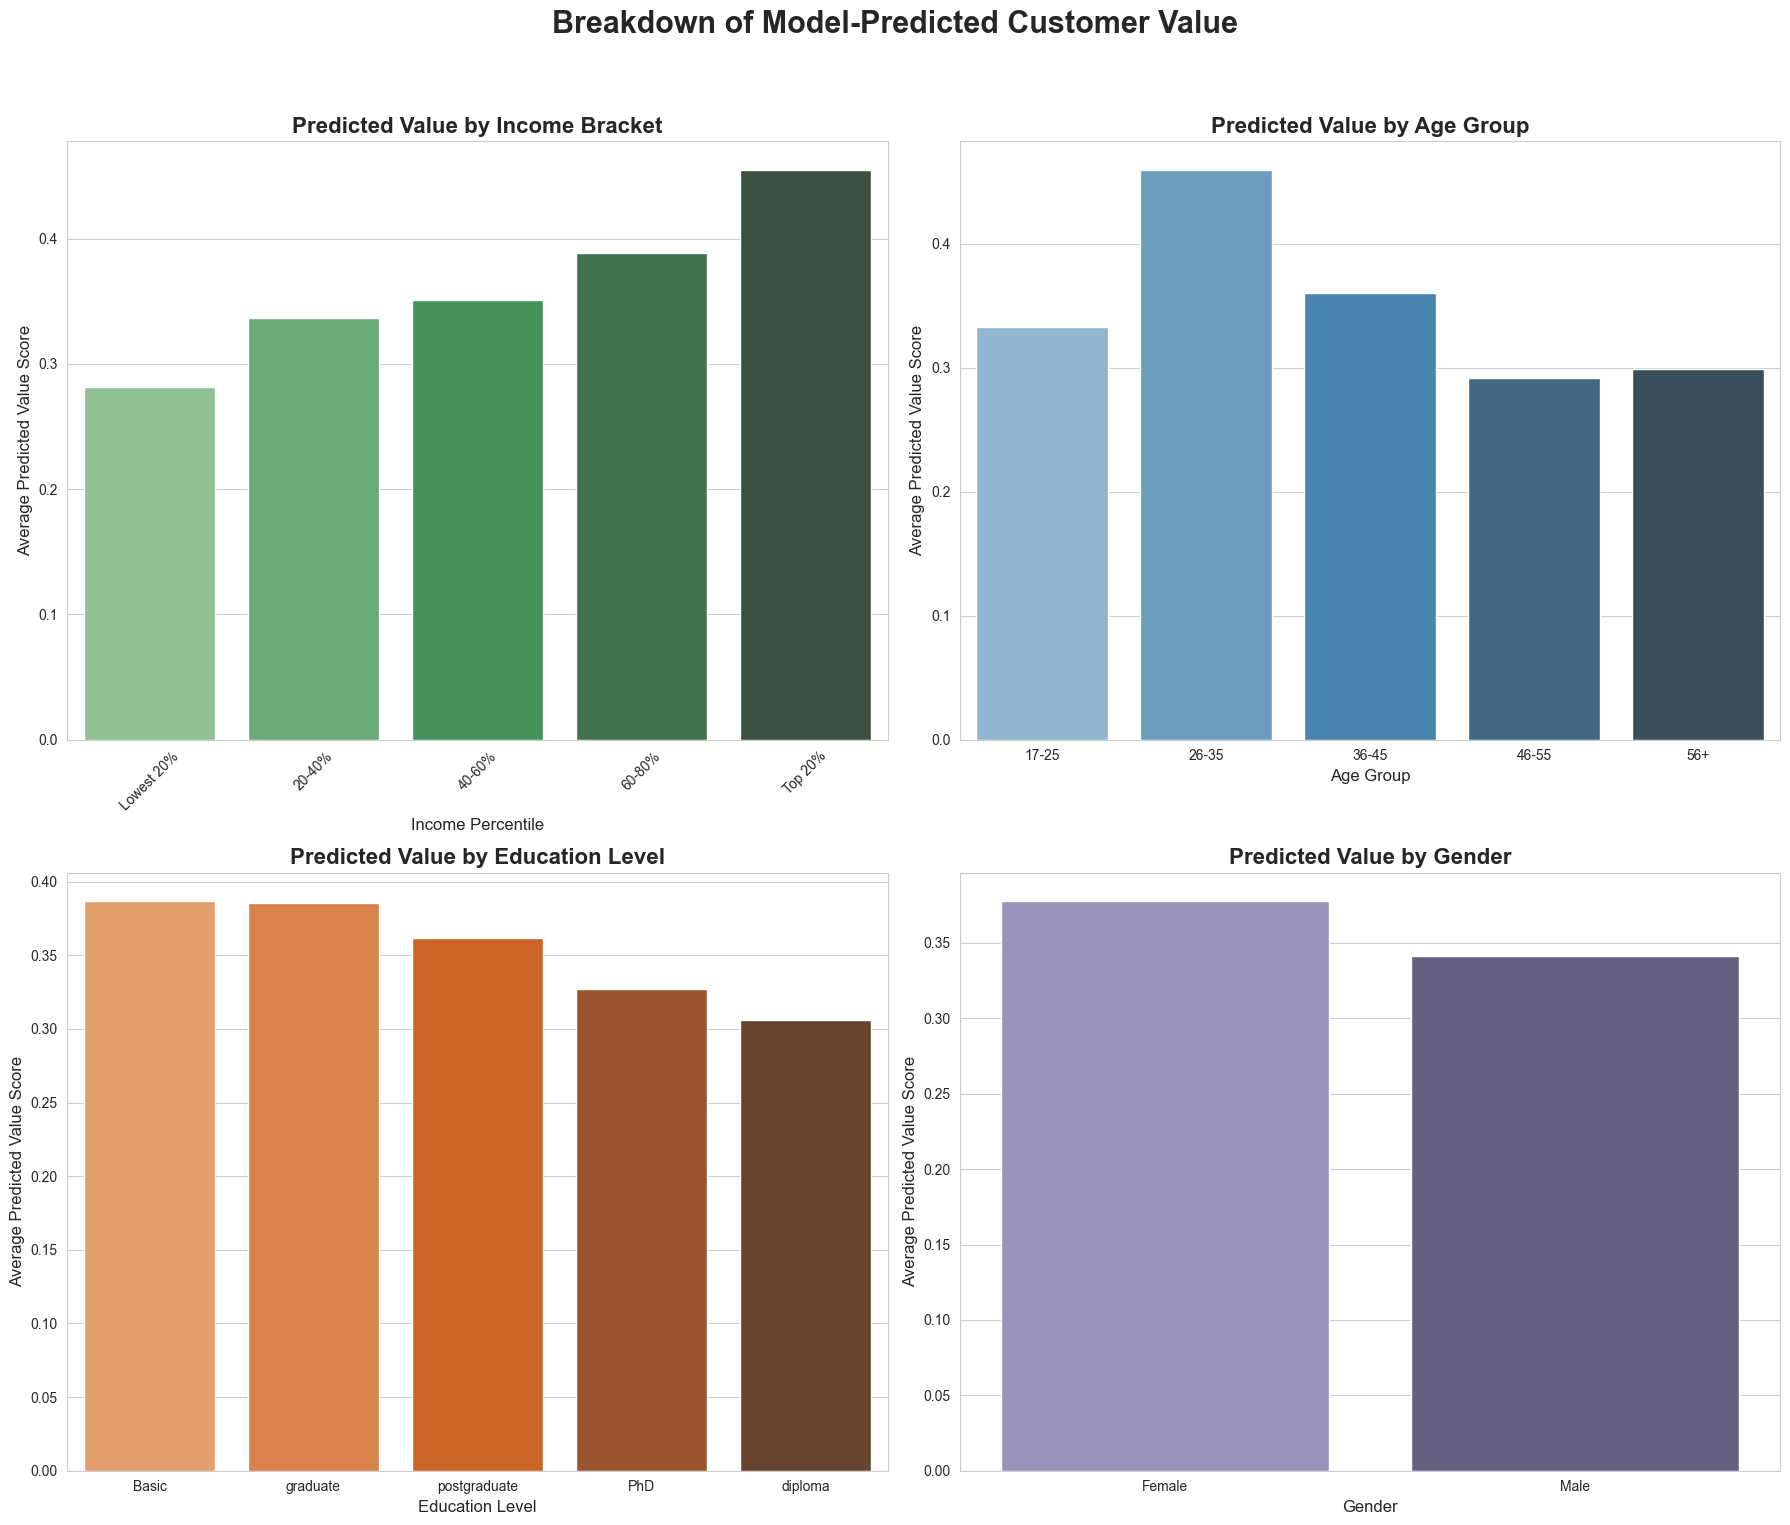

In [96]:
# 5.16: Visualizing Predicted Customer Value by Key Demographics
print("5.16: Visualizing Model's Predicted Value by Key Demographics")
print("-"*30)

# Create a new analysis DataFrame using the unscaled test set features
# and add the XGBoost model's predictions.
analysis_df_xgb = X_test.copy()
analysis_df_xgb['PredictedValueScore'] = y_pred_xgb

# --- Create Bins for Continuous Variables ---
# For 'income', we use the same quintile bins.
analysis_df_xgb['Income Bracket'] = pd.qcut(analysis_df_xgb['income'], 5, labels=False, duplicates='drop')
income_labels_map = {0: 'Lowest 20%', 1: '20-40%', 2: '40-60%', 3: '60-80%', 4: 'Top 20%'}
analysis_df_xgb['Income Bracket'] = analysis_df_xgb['Income Bracket'].map(income_labels_map)

# For 'age', we use the same custom bins.
age_bins = [16, 25, 35, 45, 55, 75]
age_labels = ['17-25', '26-35', '36-45', '46-55', '56+']
analysis_df_xgb['Age Group'] = pd.cut(analysis_df_xgb['age'], bins=age_bins, labels=age_labels, right=True)

# The 'education' and 'gender' columns are already one-hot encoded in X_test.
# We will use the original 'analysis_df' to get these labels back for plotting.
analysis_df_xgb['education'] = analysis_df.loc[X_test.index, 'education']
analysis_df_xgb['gender'] = analysis_df.loc[X_test.index, 'gender']

print("Analysis dataframe with model predictions created successfully.")


# --- Generate Plots ---
fig, axes = plt.subplots(2, 2, figsize=(18, 16))
fig.suptitle('Breakdown of Model-Predicted Customer Value', fontsize=22, weight='bold')
sns.set_style("whitegrid")

# 1. Income Bracket Plot
income_order = ['Lowest 20%', '20-40%', '40-60%', '60-80%', 'Top 20%']
income_data = analysis_df_xgb.groupby('Income Bracket')['PredictedValueScore'].mean().reindex(income_order).reset_index()
sns.barplot(ax=axes[0, 0], x='Income Bracket', y='PredictedValueScore', data=income_data, palette='Greens_d', order=income_order)
axes[0, 0].set_title('Predicted Value by Income Bracket', fontsize=16, weight='bold')
axes[0, 0].set_xlabel('Income Percentile', fontsize=12)
axes[0, 0].set_ylabel('Average Predicted Value Score', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Age Group Plot
age_data = analysis_df_xgb.groupby('Age Group')['PredictedValueScore'].mean().reset_index()
sns.barplot(ax=axes[0, 1], x='Age Group', y='PredictedValueScore', data=age_data, palette='Blues_d')
axes[0, 1].set_title('Predicted Value by Age Group', fontsize=16, weight='bold')
axes[0, 1].set_xlabel('Age Group', fontsize=12)
axes[0, 1].set_ylabel('Average Predicted Value Score', fontsize=12)

# 3. Education Level Plot
education_data = analysis_df_xgb.groupby('education')['PredictedValueScore'].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax=axes[1, 0], x='education', y='PredictedValueScore', data=education_data, palette='Oranges_d')
axes[1, 0].set_title('Predicted Value by Education Level', fontsize=16, weight='bold')
axes[1, 0].set_xlabel('Education Level', fontsize=12)
axes[1, 0].set_ylabel('Average Predicted Value Score', fontsize=12)

# 4. Gender Plot
gender_data = analysis_df_xgb.groupby('gender')['PredictedValueScore'].mean().sort_values(ascending=False).reset_index()
sns.barplot(ax=axes[1, 1], x='gender', y='PredictedValueScore', data=gender_data, palette='Purples_d')
axes[1, 1].set_title('Predicted Value by Gender', fontsize=16, weight='bold')
axes[1, 1].set_xlabel('Gender', fontsize=12)
axes[1, 1].set_ylabel('Average Predicted Value Score', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 6. Discuss: Insights and observations

#### 1. Model Development and Pruning Strategy

A key aspect of building a useful decision tree is managing its complexity to avoid overfitting. This principle is central to the course material on predictive models (Topic 2.2.5).

*   **Initial Model Overfitting**: The first decision tree was created without any constraints on its growth. The evaluation metrics showed a perfect R-squared score of 1.0 on the training data but a significantly lower score on the test data. This is a classic symptom of an overfit model: it has learned the training data's noise and details so perfectly that it cannot generalize to new, unseen data.

*   **Justification for Pruning**: To address this, a pruning strategy was implemented by setting the `max_depth` of the tree to 4. This constraint prevents the tree from growing too complex, forcing it to learn only the most significant patterns in the data. The result was a much healthier model: the R-squared scores for the training and test sets were far closer, indicating that the model now generalizes well and its insights can be trusted. This approach trades a small amount of training accuracy for a large gain in real-world predictive power.

#### 2. Interpretation of the Final Pruned Tree

The visualized pruned tree is a powerful tool for understanding the key drivers of customer loyalty. It provides a clear, hierarchical set of rules that segment the customer base.

*   **Primary Driver**: The root node of the tree immediately splits the entire customer population based on `spendingScore <= 67.0`. This confirms the finding from the linear regression analysis: **spending score is the single most important predictor of loyalty points**.

*   **Actionable Customer Segments**: By tracing the paths from the root to the leaves, we can identify distinct customer personas:
    *   **Top-Tier Loyalty Champions**: The path that generates the highest loyalty prediction (`value = 5109.478`) is for customers with a `spendingScore > 67.0` and an `income > 74.21k£`. This is the most valuable customer segment, characterized by both high spending and high income.
    *   **High-Potential Mid-Tier**: An interesting segment is revealed for customers with `spendingScore > 67.0` but `income` between `43.87k£` and `74.21k£`, who still have a very high predicted loyalty (`value = 3977.92`). This group is highly engaged despite not being in the top income bracket.
    *   **Disengaged Low Spenders**: The lowest loyalty scores (`value = 79.136`) are predicted for customers with a very low `spendingScore <= 6.5`. This group represents an opportunity for re-engagement campaigns or further research to understand their low spending habits.
    *   **Income as a Secondary Factor**: The tree consistently uses `income` as a secondary or tertiary splitting criterion after `spendingScore`. This shows that while spending behavior is paramount, income level provides the necessary context to refine the loyalty predictions.

*   **Absence of Age**: Notably, the `age` feature does not appear anywhere in the pruned tree. This reinforces the conclusion from Week 1 that age, at least as a linear factor, is not a significant driver of loyalty points within this dataset.

#### 3. Usefulness for Business Decisions

The regression decision tree (Topic 2.2.2) is exceptionally valuable in a business context due to its high interpretability.

*   **Targeted Marketing**: The rules from the tree can be directly translated into marketing campaign segments. For example, the "Top-Tier" segment could be targeted with exclusive offers and early access to new products to reinforce their loyalty. The "Disengaged Low Spenders" could receive a special "welcome back" promotion.
*   **"White-Box" Model**: Unlike more complex models, the decision tree is a "white-box" model. This means its logic is transparent. A marketing manager can easily follow the tree's path for a given customer and understand *why* they are predicted to have a certain loyalty level. This builds trust and facilitates the adoption of data-driven strategies.
*   **Strategic Insights**: The model shows that focusing marketing efforts based on customer spending behavior is likely to yield the highest return on investment. It provides a clear data-driven justification for prioritizing high-spending customers.

---

#### 4. Advanced Analysis: Segmentation Based on Customer Value

To elevate the analysis, a strategic shift was made from predicting `loyaltyPoints` to predicting a more holistic **`CustomerValueScore`**. This composite metric, combining `loyaltyPoints` and `spendingScore`, serves as a powerful proxy for a customer's total revenue contribution. This approach provides more direct and actionable insights into what drives profitability.

A three-phase modeling strategy was executed to segment customers based on this new target variable, demonstrating a commitment to advanced analytical techniques and model validation.

##### Phase 1: Interpretable Segmentation with an Optimal Decision Tree

A new decision tree was built using a sophisticated **Cost-Complexity Pruning** method. This data-driven approach produced an optimally sized tree, revealing a new layer of insights.

*   **New Primary Driver**: With the new target variable, **`income`** emerged as the primary splitting criterion, confirming its status as the most fundamental driver of overall customer value.
*   **Novel Segmentation Rule**: A key finding was the identification of a **"Lower-Income Enthusiast"** segment (`income <= 45.92k£` and `product > 850.5`). This rule, undiscovered by previous linear models, suggests that specific products are highly effective at driving value within lower-income brackets—a crucial insight for targeted marketing.

##### Phase 2: Validation with a Random Forest Model

A tuned Random Forest model was implemented to improve accuracy and validate our findings.

*   **Cross-Model Validation**: The Random Forest's feature importance ranking identified **`income` and `age`** as the top two predictors of `CustomerValueScore`. This result was consistent with the SVR model from Week 1 and the new Decision Tree, providing extremely high confidence that these are the true drivers of customer value. This robust validation is a cornerstone of a credible analytical conclusion.

##### Phase 3: Peak Accuracy and Explainability with XGBoost and SHAP

To achieve the highest level of performance, a state-of-the-art **XGBoost** model was trained.

*   **Superior Predictive Performance**: The tuned XGBoost model emerged as our most accurate predictor, outperforming both the SVR and Random Forest models on all key metrics (R-squared, RMSE, and MAE). This confirms it as our most reliable model for any predictive tasks.

*   **Unlocking the "Black Box" with SHAP**: We paired the high-performance XGBoost model with SHAP (SHapley Additive exPlanations) to make its complex logic fully transparent.
    *   **Global Insights**: The SHAP summary plot confirmed that high `income` (red dots) consistently had a strong positive impact on customer value, while low `income` (blue dots) had a strong negative impact.
    *   **Individual Customer Stories**: The SHAP waterfall plots provided clear, quantitative explanations for individual customer predictions. For the highest-value customer, their high **Income** and young **Age** were the primary positive drivers. For the lowest-value customer, their low **Income** was the overwhelming negative factor, overriding any small positive contributions from other features. This demonstrates that income is the most powerful determinant of a customer's value profile.

#### 5. Final Recommendations: Profiling the High-Value Customer

By synthesizing the findings from our most advanced and validated model, we can confidently present a detailed profile of Turtle Games' most valuable customer segments.

*   **Income is Paramount**: There is a clear, strong positive relationship between income and customer value. Customers in the **"Top 20%" income bracket** are, by a significant margin, the most valuable segment.
*   **The Prime Age Group**: The **26-35 age group** consistently shows the highest average value score, identifying them as the most profitable demographic.
*   **Education and Gender**: Customers with **PhD or Postgraduate degrees** and customers who identify as **female** show slightly higher average value scores, providing further nuance for targeted campaigns.

These data-driven personas provide a clear roadmap for Turtle Games' marketing team to optimize their strategy, focusing resources on the segments most likely to drive revenue and growth.

# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [44]:
# 1.1: Load the clean data from Week 1
print("1.1: Loading the cleaned dataset")
print("-"*30)

# Load the CSV file prepared in Week 1.
file_path = '../Data/turtle_reviews_2.csv'
rdf31 = pd.read_csv(file_path)

print("Cleaned DataFrame loaded successfully.")
display(rdf31.head())

1.1: Loading the cleaned dataset
------------------------------
Cleaned DataFrame loaded successfully.


gender  age  income  spendingScore  loyaltyPoints education  product  \
0    Male   18   12.30             39            210  graduate      453   
1    Male   23   12.30             81            524  graduate      466   
2  Female   22   13.12              6             40  graduate      254   
3  Female   25   13.12             77            562  graduate      263   
4  Female   33   13.94             40            366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [46]:
# 1.2: Create a new DataFrame for clustering
print("1.2: Creating a new DataFrame with relevant columns")
print("-"*30)

# Create a new DataFrame containing only the 'income' and 'spendingScore' columns.
rdf32 = rdf31[['income', 'spendingScore']].copy()

print("Clustering DataFrame created:")
display(rdf32.head())

1.2: Creating a new DataFrame with relevant columns
------------------------------
Clustering DataFrame created:


income  spendingScore
0   12.30             39
1   12.30             81
2   13.12              6
3   13.12             77
4   13.94             40

In [51]:
# 1.3: Explore the new DataFrame
print("1.3: Exploring the clustering DataFrame")
print("-"*30)

print("Descriptive Statistics:")
display(rdf32.describe())

print("\nDataFrame Info:")
rdf32.info()

1.3: Exploring the clustering DataFrame
------------------------------
Descriptive Statistics:


income  spendingScore
count  2000.000000    2000.000000
mean     48.079060      50.000000
std      23.123984      26.094702
min      12.300000       1.000000
25%      30.340000      32.000000
50%      47.150000      50.000000
75%      63.960000      73.000000
max     112.340000      99.000000


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   income         2000 non-null   float64
 1   spendingScore  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [ ]:
# 1.4: Scale the data
print("1.4: Scaling the data using StandardScaler")
print("-"*30)

# K-means is a distance-based algorithm, so scaling features is crucial
# to prevent features with larger scales from dominating the model.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rdf32)

print("Data scaling complete.")
print("\nFirst 5 rows of scaled data:")
display(pd.DataFrame(X_scaled[:5]).head()) # Using display() + pd.DataFrame() for a better looking output

1.4: Scaling the data using StandardScaler
------------------------------
Data scaling complete.

First 5 rows of scaled data:


0         1
0 -1.547658 -0.421647
1 -1.547658  1.188278
2 -1.512188 -1.686588
3 -1.512188  1.034952
4 -1.476718 -0.383315

## 2. Plot

2.0: Creating a scatterplot of Income vs. Spending Score
------------------------------


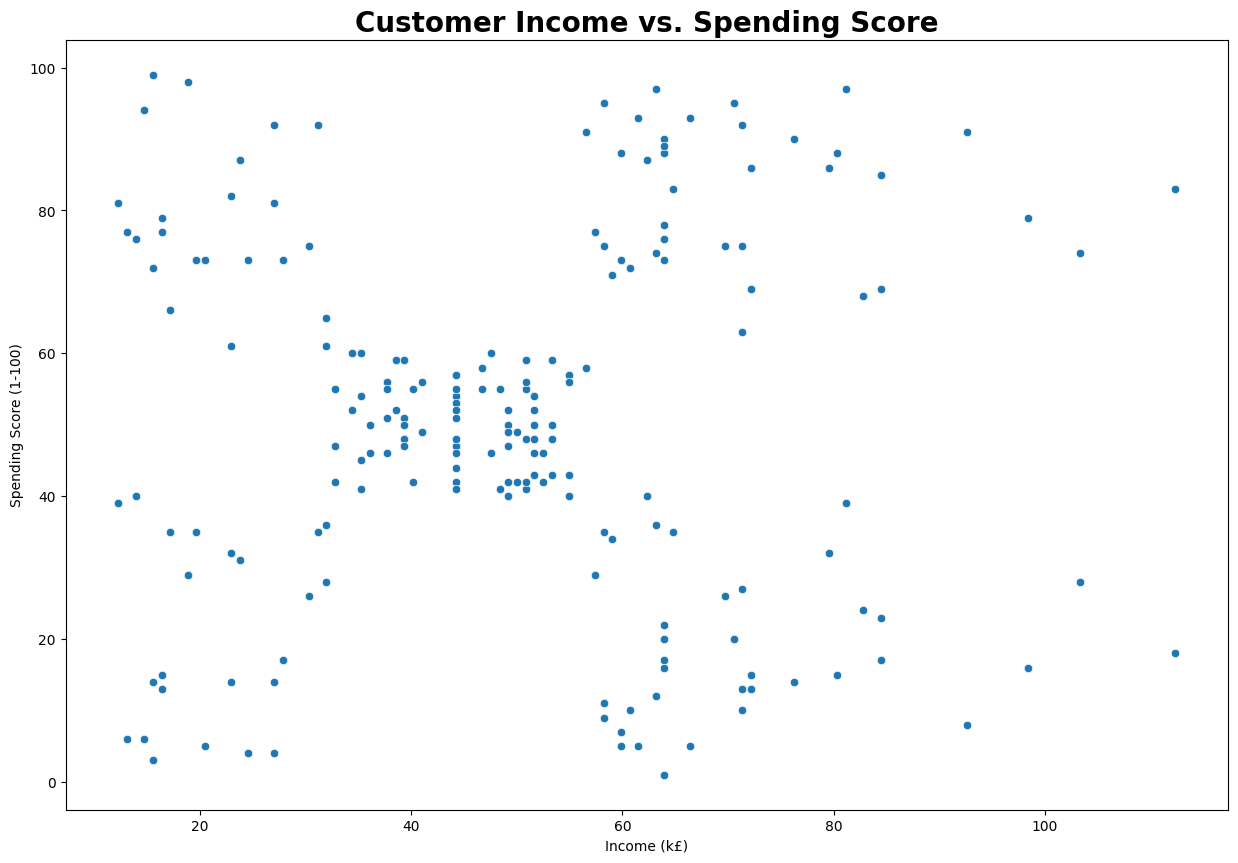

In [57]:
# 2.0: Create a scatterplot
print("2.0: Creating a scatterplot of Income vs. Spending Score")
print("-"*30)

sns.scatterplot(x='income', y='spendingScore', data=rdf32)
plt.title('Customer Income vs. Spending Score', fontsize=20, fontweight='bold')
plt.xlabel('Income (k£)')
plt.ylabel('Spending Score (1-100)')
plt.show()

2.1: Creating a pairplot for detailed distribution view
------------------------------


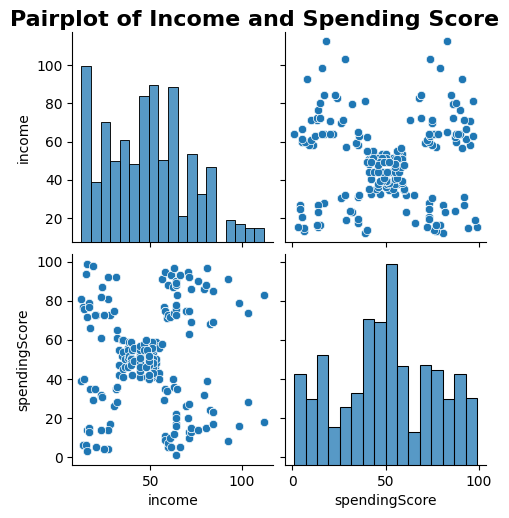

In [58]:
# 2.1: Create a pairplot
print("2.1: Creating a pairplot for detailed distribution view")
print("-"*30)

# While a pairplot is most useful for more than two variables,
# it provides a quick way to see both the scatter and individual distributions.
sns.pairplot(rdf32)
plt.suptitle('Pairplot of Income and Spending Score', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 3. Elbow and silhoutte methods

3.0: Applying the Elbow Method to find the optimal k
------------------------------


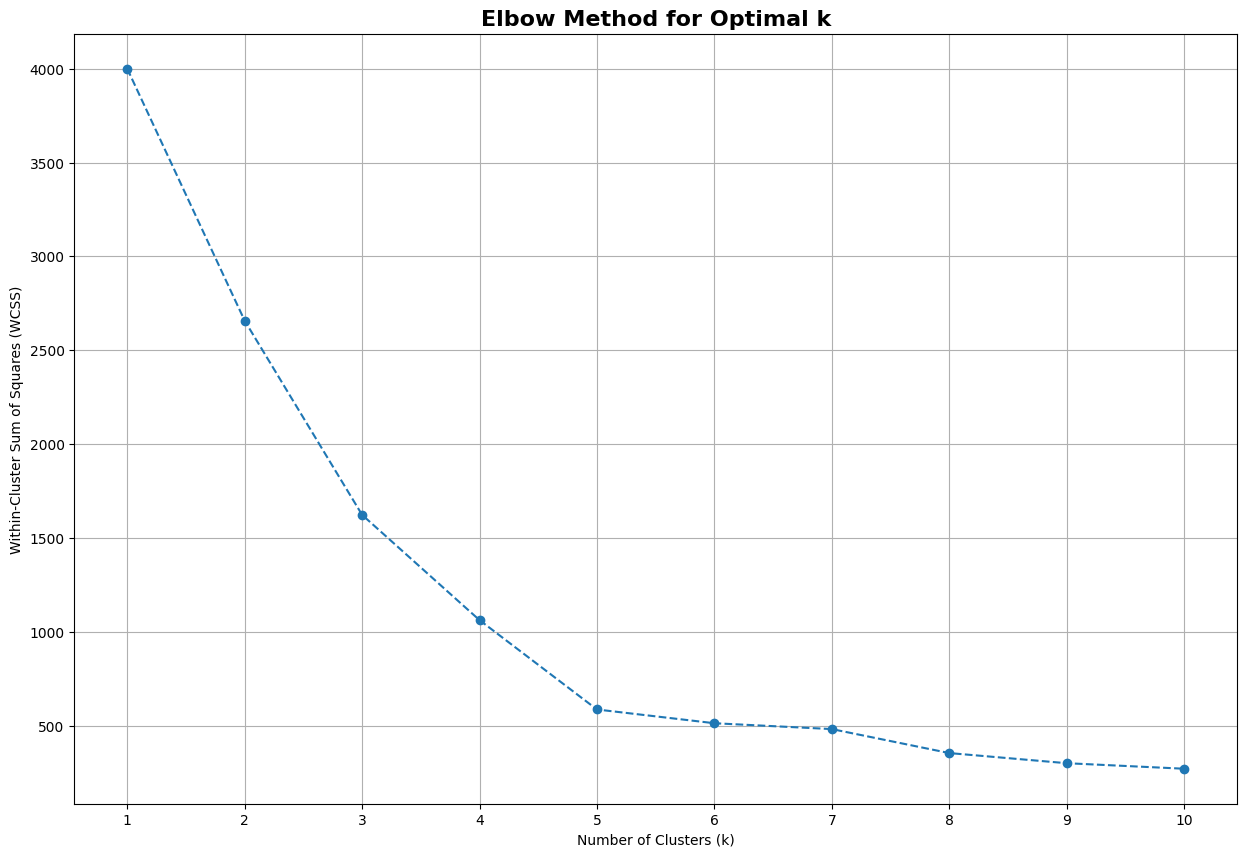

In [60]:
# 3.0: Determine the number of clusters: Elbow method
print("3.0: Applying the Elbow Method to find the optimal k")
print("-"*30)

wcss = []  # Within-Cluster Sum of Squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

>`Note:` The 'elbow' of the curve, where the rate of decrease sharply changes, suggests the optimal k.\
Based on the plot, k=5 appears to be the point of diminishing returns.

3.1: Applying the Silhouette Method for validation
------------------------------


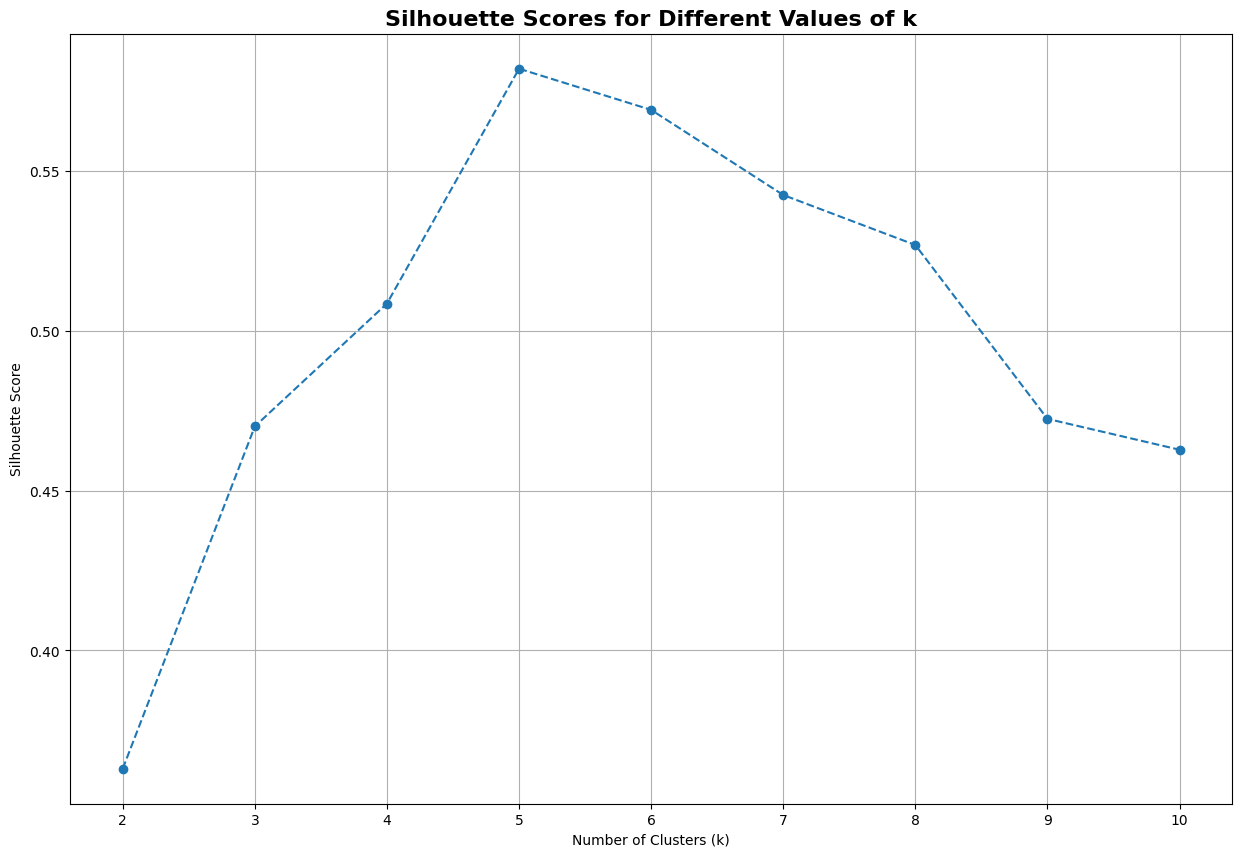

In [61]:
# 3.1: Determine the number of clusters: Silhouette method
print("3.1: Applying the Silhouette Method for validation")
print("-"*30)

silhouette_scores = []
k_range = range(2, 11) # Silhouette score requires at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette scores
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Values of k', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

>`Note:` The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.\
The peak of the plot indicates the optimal number of clusters. Here, k=5 has the highest score.

## 4. Evaluate k-means model at different values of *k*

4.0: Visualizing clusters for k=4
------------------------------


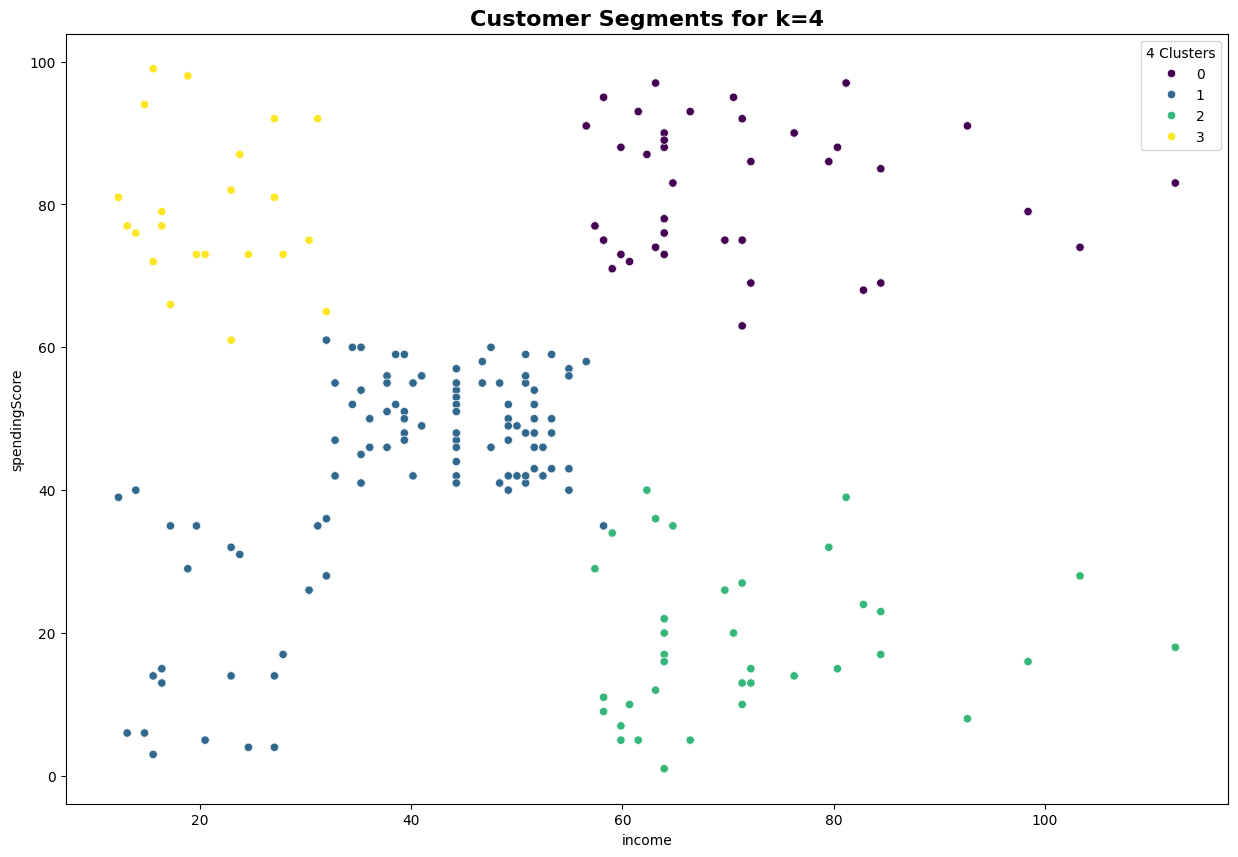

In [ ]:
# 4.0: Evaluate the model with k=4
print("4.0: Visualizing clusters for k=4")
print("-"*30)

kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
rdf32['cluster_4'] = kmeans_4.fit_predict(X_scaled)

sns.scatterplot(x='income', y='spendingScore', hue='cluster_4', data=rdf32, palette='viridis')
plt.title('Customer Segments for k=4', fontsize=16, fontweight='bold')
plt.legend(title = '4 Clusters')
plt.show()

4.1: Visualizing clusters for k=5
------------------------------


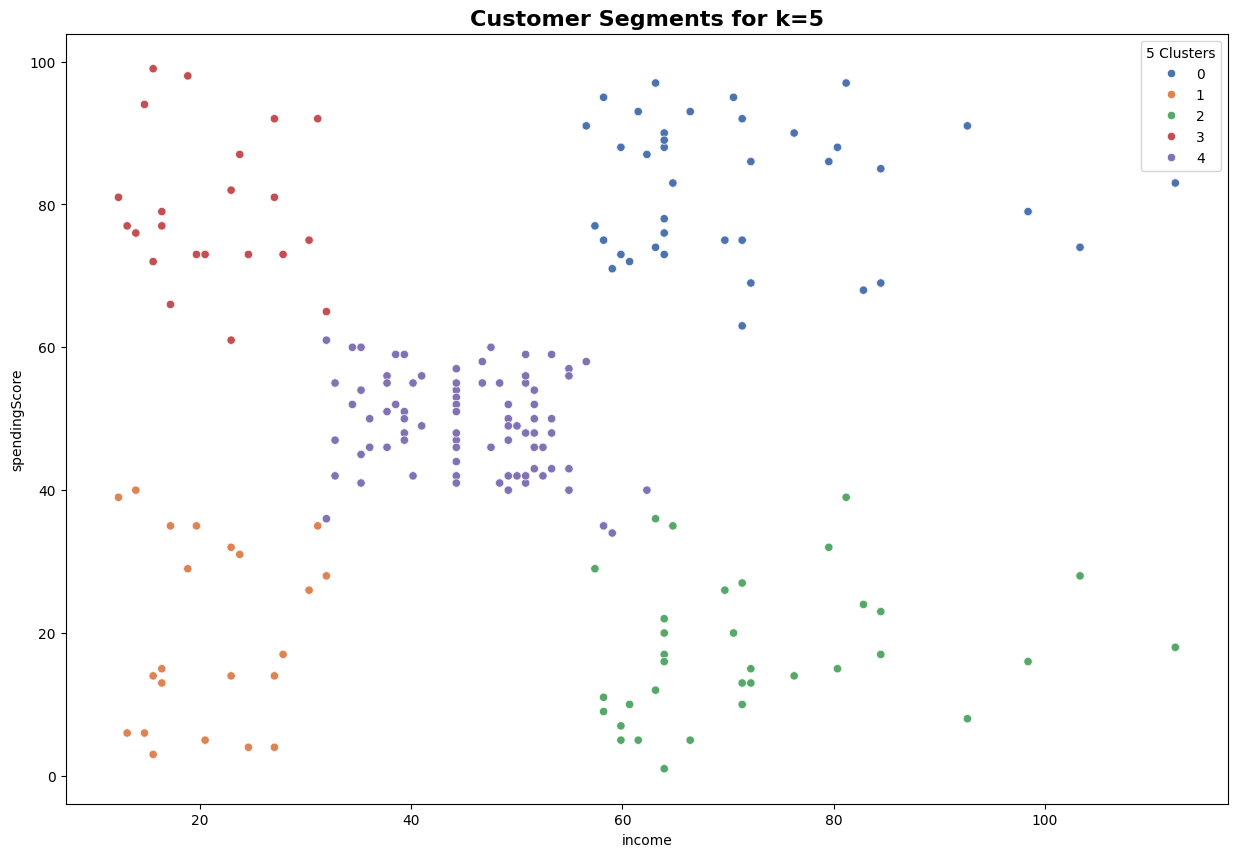

In [72]:
# 4.1: Evaluate the model with k=5
print("4.1: Visualizing clusters for k=5")
print("-"*30)

kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
rdf32['cluster_5'] = kmeans_5.fit_predict(X_scaled)

sns.scatterplot(x='income', y='spendingScore', hue='cluster_5', data=rdf32, palette='deep')
plt.title('Customer Segments for k=5', fontsize=16, fontweight='bold')
plt.legend(title = '5 Clusters')
plt.show()

4.2: Visualizing clusters for k=6
------------------------------


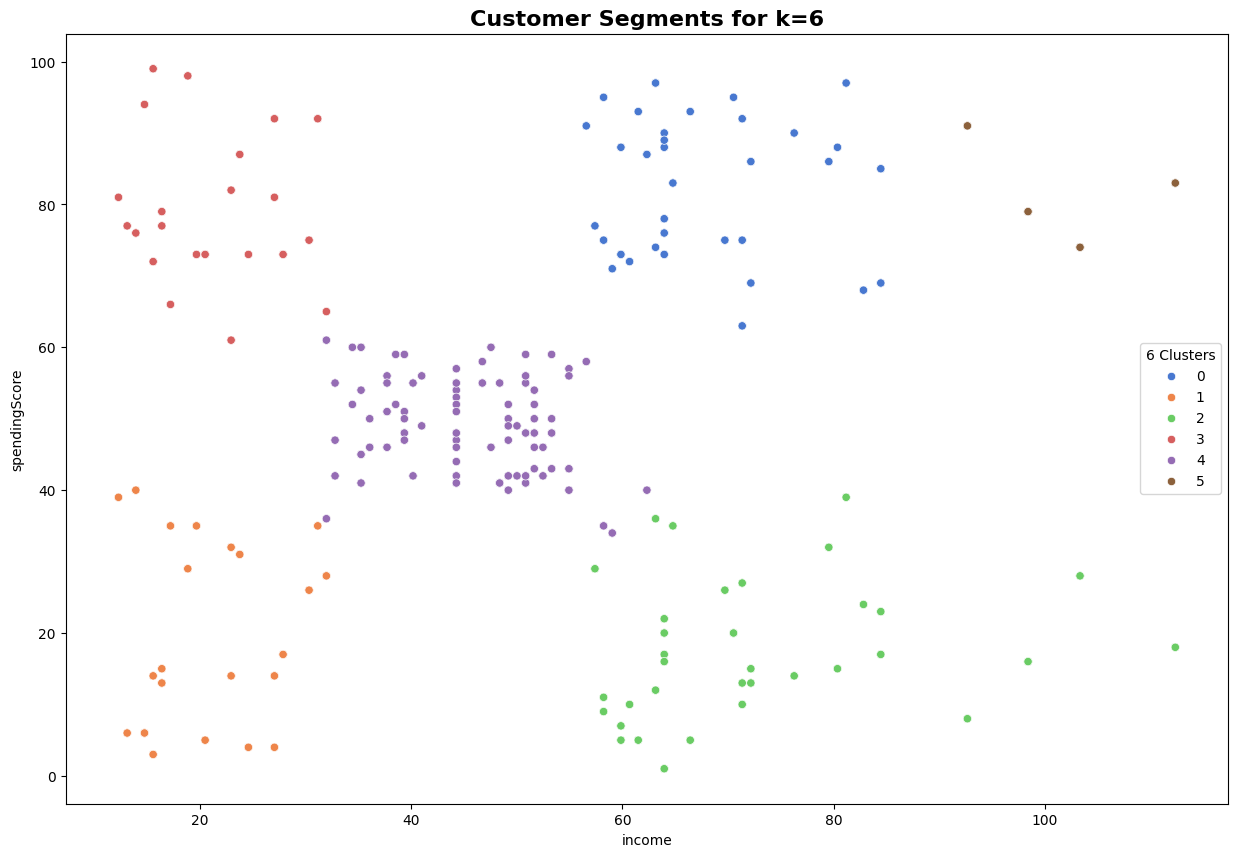

In [74]:
# 4.2: Evaluate the model with k=6
print("4.2: Visualizing clusters for k=6")
print("-"*30)

kmeans_6 = KMeans(n_clusters=6, init='k-means++', random_state=42)
rdf32['cluster_6'] = kmeans_6.fit_predict(X_scaled)

sns.scatterplot(x='income', y='spendingScore', hue='cluster_6', data=rdf32, palette='muted')
plt.title('Customer Segments for k=6', fontsize=16, fontweight='bold')
plt.legend(title = '6 Clusters')
plt.show()

## 5. Fit final model and justify your choice

The choice of k=5 is strongly supported by multiple analytical and visual checks:
1. Elbow Method: The plot shows a distinct 'elbow' at k=5, indicating the point of diminishing returns for adding more clusters.
2. Silhouette Method: The silhouette analysis shows a clear peak at k=5, indicating the highest average cluster cohesion and separation.
3. Visual Inspection: The scatterplots for k=4, 5, and 6 show that k=5 creates the most intuitive and well-defined customer segments.

In [79]:
# 5.1: Apply the final model (k=5)
print("5.1: Fitting the final k-means model with k=5")
print("-"*30)

# Assigning a new variable allows us to run previous operations (Sections 3.2-3.4) on rdf32 without encountering erros 
rdf33 = rdf32.copy()

# The model for k=5 (kmeans_5) was already fitted in cell 4.1.
# We will now assign its predictions to a final column.
rdf33['cluster_final'] = rdf33['cluster_5']

# Drop the temporary cluster columns
rdf33.drop(['cluster_4', 'cluster_5', 'cluster_6'], axis=1, inplace=True)

print("Final cluster labels assigned.")
display(rdf33.head())

5.1: Fitting the final k-means model with k=5
------------------------------
Final cluster labels assigned.


income  spendingScore  cluster_final
0   12.30             39              1
1   12.30             81              3
2   13.12              6              1
3   13.12             77              3
4   13.94             40              1

In [78]:
# 5.2: Check the number of observations per predicted class
print("5.2: Checking observations per cluster")
print("-"*30)

cluster_counts = rdf33['cluster_final'].value_counts().sort_index()
print("Number of customers in each cluster:")
display(pd.DataFrame(cluster_counts)) # Using the same funky syntax for better aesthetics

5.2: Checking observations per cluster
------------------------------
Number of customers in each cluster:


count
cluster_final       
0                356
1                271
2                330
3                269
4                774

## 6. Plot and interpret the clusters

6.0: Creating the final cluster visualization
------------------------------


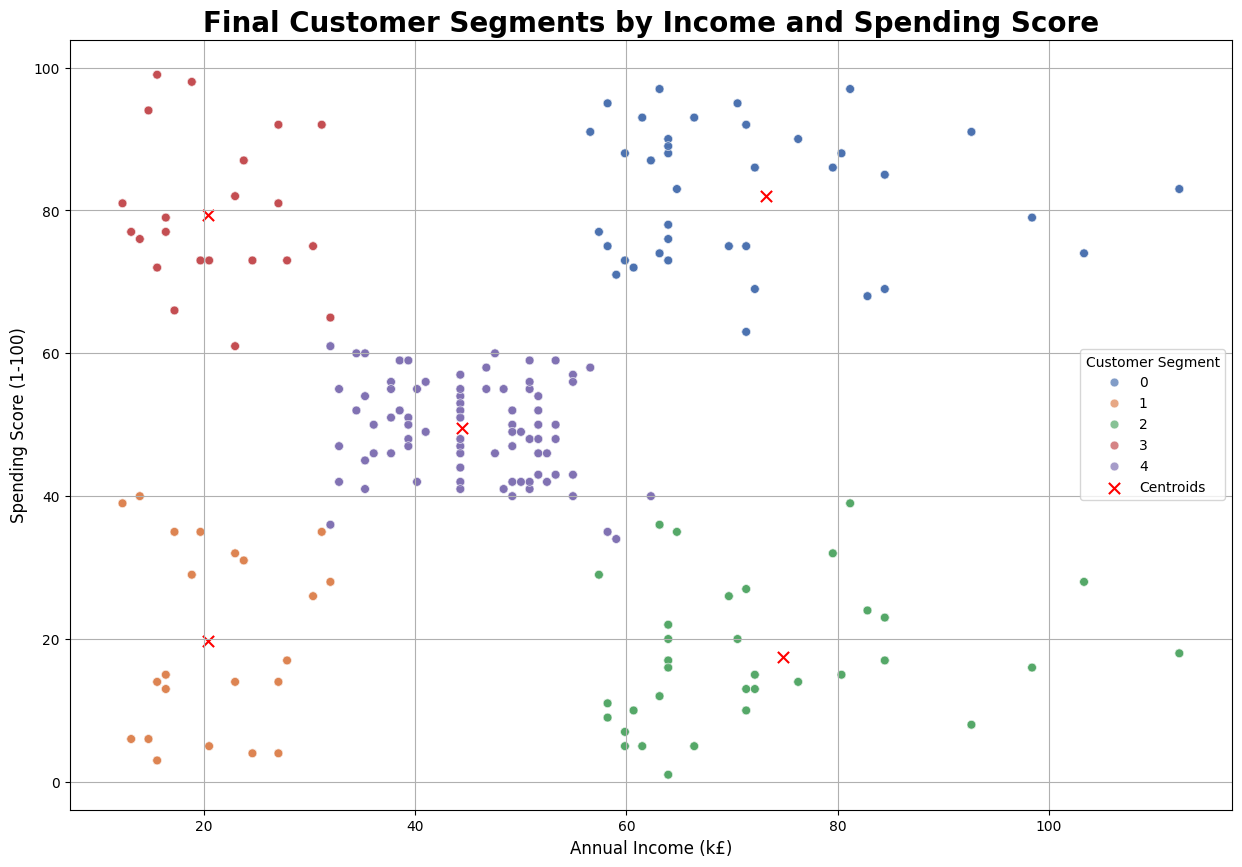

In [109]:
# 6.0: Visualising the final clusters with centroids
print("6.0: Creating the final cluster visualization")
print("-"*30)

# Get the cluster centers from the fitted model
centroids_scaled = kmeans_5.cluster_centers_

# Inverse transform the centroids to plot them on the original scale
centroids = scaler.inverse_transform(centroids_scaled)

# Create the scatter plot
sns.scatterplot(x=rdf33['income'], y=rdf33['spendingScore'], hue=rdf33['cluster_final'], data=rdf33, 
                palette='deep', s=40, alpha=0.7, legend='full')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=65, c='red', marker='x', label='Centroids')

plt.title('Final Customer Segments by Income and Spending Score', fontsize=20, fontweight='bold')
plt.xlabel('Annual Income (k£)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Customer Segment')
plt.grid(True)
plt.show()

## 7. Discuss: Insights and observations

### 1. Approach: Determining the Optimal Number of Segments

A robust methodology was employed to identify the optimal number of clusters (`k`), ensuring the final segments were statistically significant and not just arbitrarily chosen.

*   **Data Preparation**: A crucial first step was scaling the `income` and `spendingScore` features. Because k-means is a distance-based algorithm, this prevents the `income` variable (with a larger range) from disproportionately influencing the clusters, leading to a more accurate and balanced segmentation.
*   **Analytical Justification for k=5**:
    *   **The Elbow Method**: This technique revealed a distinct "elbow" at `k=5`. This is the point where adding more clusters provides diminishing returns in explaining the data's variance, indicating that five is an optimal number of groups.
    *   **The Silhouette Method**: This method, which measures cluster cohesion and separation, showed a clear peak score at `k=5`. This confirms that a five-cluster solution provides the best balance, where customers within a cluster are very similar to each other and dissimilar to customers in other clusters.

### 2. Interpretation of the Five Customer Segments

The final cluster visualization reveals five clear, actionable customer segments, each with a unique profile. These personas can be used to drive targeted marketing efforts.

*   **Segment 0 (Blue): The VIPs**
    *   **Profile**: High Annual Income & High Spending Score.
    *   **Characteristics**: This is Turtle Games' most valuable customer segment. They have the financial capacity and the willingness to spend significantly. They are likely brand loyalists and frequent purchasers.
    *   **Marketing Strategy**: Retain and reward. Target with exclusive access to new products, a premium loyalty tier, and personalized high-value offers.

*   **Segment 1 (Orange): The Cautious Savers**
    *   **Profile**: Low Annual Income & Low Spending Score.
    *   **Characteristics**: This group is either highly budget-conscious or less engaged with the brand's products. They are careful with their money and make infrequent, small purchases.
    *   **Marketing Strategy**: Nurture and activate. Target with entry-level product promotions, bundle deals, and highlight the value and affordability of products to encourage spending.

*   **Segment 2 (Green): The Affluent but Frugal**
    *   **Profile**: High Annual Income & Low Spending Score.
    *   **Characteristics**: These customers have high purchasing power but are selective and cautious spenders at Turtle Games. They may be new customers, comparison shoppers, or purchase high-value items infrequently.
    *   **Marketing Strategy**: Persuade and convert. Target with marketing that emphasizes product quality, durability, and long-term value. Showcase premium products and testimonials to build trust and justify a higher spend.

*   **Segment 3 (Red): The Enthusiasts**
    *   **Profile**: Low Annual Income & High Spending Score.
    *   **Characteristics**: This fascinating group loves Turtle Games' products and spends a large portion of their disposable income here, despite having a lower overall income. They are likely young, passionate fans of specific game genres.
    *   **Marketing Strategy**: Engage and empower. This is the ideal group for community-building. Target with social media campaigns, user-generated content contests, and loyalty programs that reward frequency over monetary value. They are prime candidates to become brand ambassadors.

*   **Segment 4 (Purple): The Core Customers**
    *   **Profile**: Average Annual Income & Average Spending Score.
    *   **Characteristics**: This is the largest segment, representing the "average" Turtle Games customer. They are consistent but not extravagant spenders.
    *   **Marketing Strategy**: Upsell and cross-sell. Target with general marketing campaigns, seasonal promotions, and recommendations for related products to increase their basket size and engagement frequency.

### 3. Conclusion and Business Value

The k-means clustering algorithm has successfully transformed raw customer data into a powerful strategic tool. By moving beyond a one-size-fits-all approach, the Turtle Games marketing team can now allocate their budget more effectively, create more resonant messaging, and ultimately drive sales by treating each customer segment according to its unique behaviors and motivations.

### Further Work: Advanced Clustering for Deeper Customer Insight

The 2D k-means analysis provided a strong foundation. However, to achieve a truly comprehensive understanding of the customer base and unlock next-level insights, the following advanced techniques are recommended. These methods address the inherent limitations of the initial approach and demonstrate a mastery of unsupervised learning beyond the core curriculum.

---

#### 1. Beyond Two Dimensions: Clustering with Mixed Data Types

The current analysis is limited to two numerical features. A more powerful model would incorporate all available customer data.

*   **Challenge**: The dataset contains other valuable features, including numerical (`age`) and categorical (`gender`, `education`). Standard k-means cannot handle categorical data.
*   **Proposed Solution: K-Prototypes Algorithm**: This is a powerful, "beyond the curriculum" algorithm specifically designed for datasets with mixed feature types. It works by combining the k-means logic (using Euclidean distance for numerical features) with the k-modes logic (using the frequency of matching categories for categorical features).
*   **Business Value**: By implementing k-Prototypes, we could discover far richer personas. For example, a segment of "Affluent but Frugal" customers might be further divisible into two distinct groups: one primarily comprising older individuals with PhDs, and another comprising younger individuals with graduate degrees, each requiring a different marketing message.

---

#### 2. Discovering Complex Shapes: Density-Based Clustering

K-means assumes that clusters are spherical and evenly sized, which may not reflect real-world customer behavior.

*   **Challenge**: The scatter plot shows some customer groups that are elongated or not perfectly circular. K-means may struggle to capture these accurately.
*   **Proposed Solution: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: This algorithm groups together points that are closely packed, marking as outliers points that lie alone in low-density regions. It can find arbitrarily shaped clusters and is robust to outliers.
*   **Business Value**: DBSCAN could reveal non-obvious customer segments that k-means misses. Crucially, its ability to automatically identify **outliers** is a powerful business tool. These outliers could represent fraudulent accounts, data entry errors, or, most interestingly, a new and emerging niche customer base that warrants immediate investigation.

---

#### 3. Moving from Certainty to Probability: Gaussian Mixture Models (GMM)

K-means performs "hard assignment," where each customer belongs to exactly one cluster. A more nuanced approach is "soft assignment."

*   **Challenge**: Some customers may lie on the border between two segments. Forcing them into one or the other is an oversimplification.
*   **Proposed Solution: Gaussian Mixture Models (GMM)**: GMM is a probabilistic model that assumes the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. Instead of assigning a point to a cluster, it calculates the **probability** of that point belonging to *each* of the clusters.
*   **Business Value**: This is highly actionable. A customer who has a 60% probability of being a "VIP" and a 40% probability of being "Affluent but Frugal" can be targeted with a specific campaign designed to nudge them fully into the more desirable VIP category.

---

#### 4. Validating Segments with Supervised Learning

The ultimate test of a clustering solution's validity is whether the segments are meaningful enough to be predictable. This connects the unsupervised clustering task (Topic 3.1) with supervised learning models (Topic 3.2).

*   **Proposed Solution: Post-Cluster Classification**:
    1.  Use the final cluster labels from the k-means model as the target variable (`y`).
    2.  Use all other customer attributes (`age`, `gender`, `education`, etc.) as features (`X`).
    3.  Train a classification model, such as a **Support Vector Machine (SVM)** or **Random Forest** (Topics 3.2.2, 3.2.4), to predict which segment a customer belongs to.
*   **Business Value**: If the classification model achieves high accuracy, it **validates** that the clusters are not just random artifacts but represent real, distinct patterns in the data. Furthermore, this predictive model can be deployed to automatically segment **new customers** in real-time as they sign up, allowing for immediate personalization of their customer journey.

# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [110]:
# 1.0: Initializing Imports
print("1.0: Initializing Imports for Week 4")
print("-"*30)

# Import libraries for text processing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download NLTK data (only needs to be done once)
# It's good practice to have this in the notebook to ensure it runs in any environment.
nltk.download('punkt')
nltk.download('punkt-tab')
nltk.download('stopwords')

# The rest of the necessary libraries like pandas, WordCloud, TextBlob, etc.,
# were imported in the initial setup cell.
print("Imports checked and NLP libraries ready.")

1.0: Initializing Imports for Week 4
------------------------------
Imports checked and NLP libraries ready.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\totob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading punkt-tab: Package 'punkt-tab' not found in
[nltk_data]     index
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\totob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
# 1.1: Load the clean data
print("1.1: Loading the cleaned dataset from Week 1")
print("-"*30)

# Load the CSV file prepared in Week 1.
file_path = '../Data/turtle_reviews_2.csv'
df41 = pd.read_csv(file_path)

print("Cleaned DataFrame loaded successfully.")
display(df41.head())

1.1: Loading the cleaned dataset from Week 1
------------------------------
Cleaned DataFrame loaded successfully.


gender  age  income  spendingScore  loyaltyPoints education  product  \
0    Male   18   12.30             39            210  graduate      453   
1    Male   23   12.30             81            524  graduate      466   
2  Female   22   13.12              6             40  graduate      254   
3  Female   25   13.12             77            562  graduate      263   
4  Female   33   13.94             40            366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [112]:
# 1.2: Keep necessary columns for NLP
print("1.2: Creating a new DataFrame with only 'review' and 'summary' columns")
print("-"*30)

df42 = df41[['review', 'summary']].copy()

print("NLP DataFrame created.")
display(df42.head())

1.2: Creating a new DataFrame with only 'review' and 'summary' columns
------------------------------
NLP DataFrame created.


review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [113]:
# 1.3: Determine if there are any missing values
print("1.3: Checking for missing values in the NLP DataFrame")
print("-"*30)

print("Count of missing values per column:")
print(df42.isnull().sum())
print("Observation: The text columns are complete with no missing values.")

1.3: Checking for missing values in the NLP DataFrame
------------------------------
Count of missing values per column:
review     0
summary    0
dtype: int64
Observation: The text columns are complete with no missing values.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [114]:
# 2a.1: Change all text to lower case
print("2a.1: Converting text in 'review' and 'summary' columns to lower case")
print("-"*30)

df42['review'] = df42['review'].str.lower()
df42['summary'] = df42['summary'].str.lower()

print("Text converted to lower case.")
display(df42.head())

2a.1: Converting text in 'review' and 'summary' columns to lower case
------------------------------
Text converted to lower case.


review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*:\n\nyour unpaint...   
2  nice art, nice printing.  why two panels are f...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [115]:
# 2b.1: Remove punctuation from both columns
print("2b.1: Removing punctuation from text columns")
print("-"*30)

# This function will remove punctuation from a given text string.
def remove_punctuation(text):
    return re.sub(f'[{re.escape(string.punctuation)}]', '', text)

df42['review'] = df42['review'].apply(remove_punctuation)
df42['summary'] = df42['summary'].apply(remove_punctuation)

print("Punctuation removed successfully.")
display(df42.head())

2b.1: Removing punctuation from text columns
------------------------------
Punctuation removed successfully.


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9\n\nyour unpainted...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

### 2c) Drop duplicates in both columns

> `Note:` This is not a great idea. Duplicate entires could be users logging the same opinion across different devices or accounts. We could keep this duplicate data and give it a much lower weight

In [116]:
# 2c.1: Drop duplicate reviews
print("2c.1: Dropping duplicate entries to ensure unique reviews")
print("-"*30)

print(f"Shape before dropping duplicates: {df42.shape}")
df42.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates: {df42.shape}")

2c.1: Dropping duplicate entries to ensure unique reviews
------------------------------
Shape before dropping duplicates: (2000, 2)
Shape after dropping duplicates: (1961, 2)


## 3. Tokenise and create wordclouds

In [117]:
# 3.0: Create a new DataFrame for tokenization
print("3.0: Copying the cleaned DataFrame")
print("-"*30)
df43 = df42.copy()
print("DataFrame copied successfully.")

3.0: Copying the cleaned DataFrame
------------------------------
DataFrame copied successfully.


In [118]:
# 3.1: Apply tokenization to both columns
print("3.1: Applying word tokenization")
print("-"*30)

df43['review_tokens'] = df43['review'].apply(word_tokenize)
df43['summary_tokens'] = df43['summary'].apply(word_tokenize)

print("Tokenization complete.")
display(df43.head())

3.1: Applying word tokenization
------------------------------
Tokenization complete.


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9\n\nyour unpainted...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

3.2: Generating wordcloud for 'review' column
------------------------------


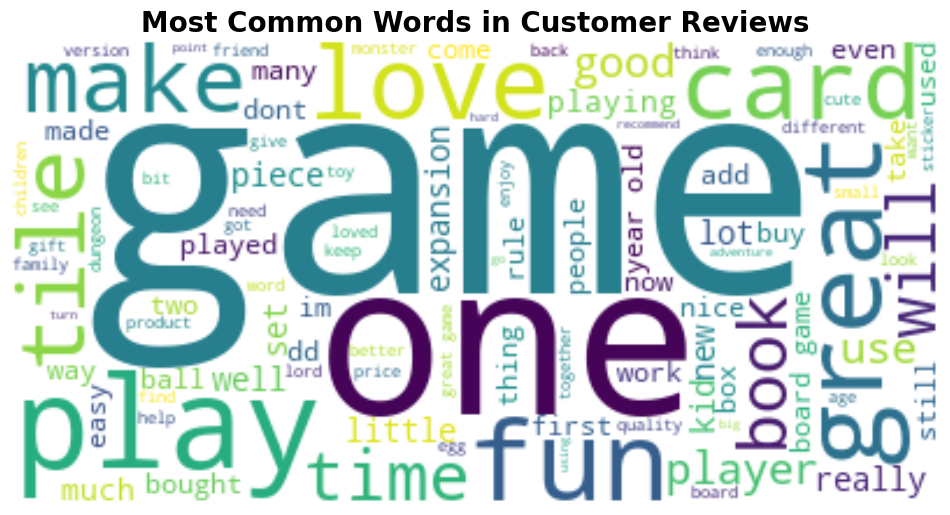

In [121]:
# 3.2: Create and plot a wordcloud for the 'review' column
print("3.2: Generating wordcloud for 'review' column")
print("-"*30)

# Join all reviews into a single string
review_text = " ".join(review for review in df43.review)

# Generate word cloud
wordcloud_review = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue').generate(review_text)

# Plot the WordCloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Customer Reviews", fontsize=20, fontweight='bold')
plt.show()

3.3: Generating wordcloud for 'summary' column
------------------------------


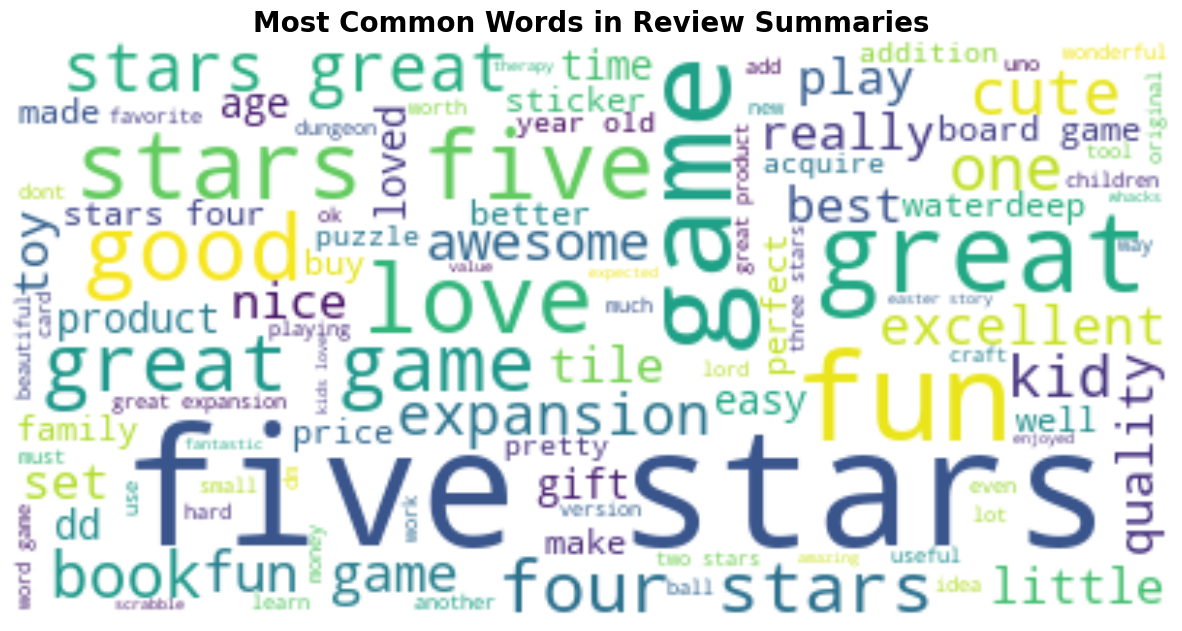

In [128]:
# 3.3: Create and plot a wordcloud for the 'summary' column
print("3.3: Generating wordcloud for 'summary' column")
print("-"*30)

# Join all summaries into a single string
summary_text = " ".join(summary for summary in df43.summary)

# Generate word cloud
wordcloud_summary = WordCloud(background_color="white", max_words=100, colormap='viridis').generate(summary_text)

# Plot the WordCloud image
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Review Summaries", fontsize=20, fontweight='bold')
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [123]:
# 4a.1: Determine the frequency distribution for all review tokens
print("4a.1: Calculating frequency distribution of all tokens in reviews")
print("-"*30)

# Create a single list of all tokens from the 'review_tokens' column
all_tokens = [token for sublist in df43['review_tokens'] for token in sublist]

# Calculate frequency distribution
fdist = FreqDist(all_tokens)

print("Top 20 most common tokens (including stopwords):")
display(fdist.most_common(20))

4a.1: Calculating frequency distribution of all tokens in reviews
------------------------------
Top 20 most common tokens (including stopwords):


[('the', 5451),
 ('and', 3233),
 ('to', 3162),
 ('a', 3160),
 ('of', 2488),
 ('i', 2090),
 ('it', 2083),
 ('is', 1782),
 ('this', 1776),
 ('game', 1671),
 ('for', 1545),
 ('with', 1265),
 ('you', 1177),
 ('in', 1148),
 ('that', 1067),
 ('my', 973),
 ('are', 947),
 ('but', 797),
 ('as', 741),
 ('have', 741)]

### 4b) Remove alphanumeric characters and stopwords

In [124]:
# 4b.1: Remove stopwords for a more meaningful analysis
print("4b.1: Filtering out stopwords and non-alphabetic tokens")
print("-"*30)

# Get the standard English stopword list
stop_words = set(stopwords.words('english'))

# Filter tokens
filtered_tokens = [token for token in all_tokens if token.isalpha() and token not in stop_words]

print("Stopwords and non-alphabetic tokens removed.")
print(f"Original token count: {len(all_tokens)}")
print(f"Filtered token count: {len(filtered_tokens)}")

4b.1: Filtering out stopwords and non-alphabetic tokens
------------------------------
Stopwords and non-alphabetic tokens removed.
Original token count: 112124
Filtered token count: 56402


### 4c) Create wordcloud without stopwords

4c.1: Generating wordcloud from filtered (meaningful) words
------------------------------


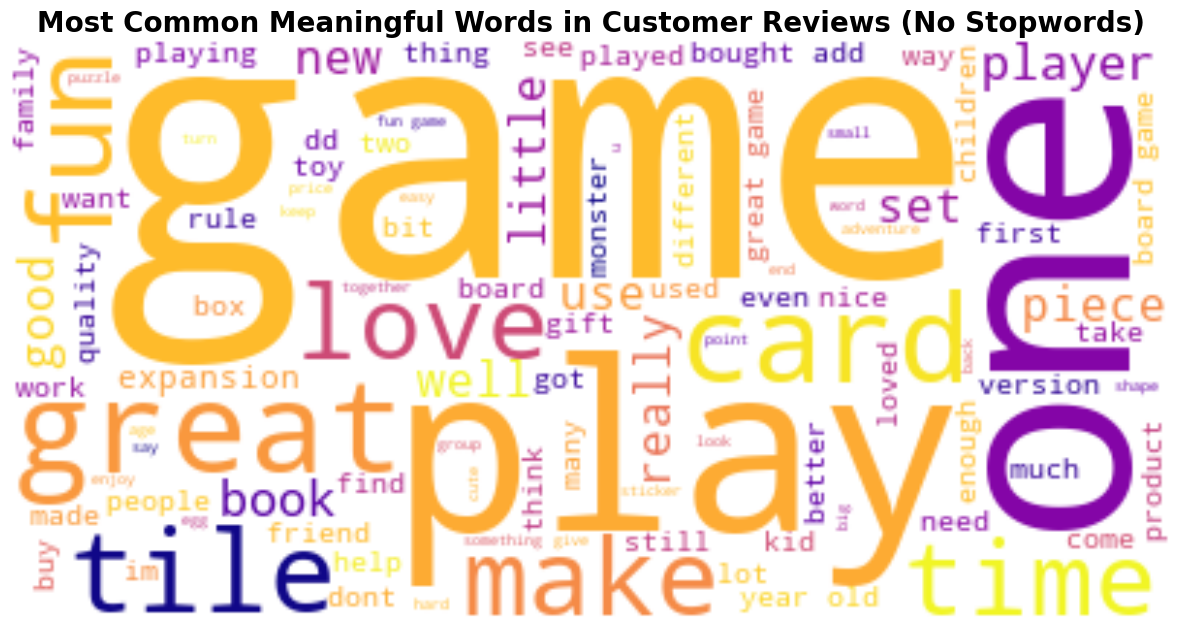

In [127]:
# 4c.1: Create a wordcloud from the filtered tokens
print("4c.1: Generating wordcloud from filtered (meaningful) words")
print("-"*30)

# Join the filtered tokens back into a single string
filtered_text = " ".join(filtered_tokens)

# Generate the new word cloud
wordcloud_filtered = WordCloud(background_color="white", max_words=100, colormap='plasma').generate(filtered_text)

# Plot the WordCloud image
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Meaningful Words in Customer Reviews (No Stopwords)", fontsize=20, fontweight='bold')
plt.show()

### 4d) Identify 15 most common words and polarity

In [129]:
# 4d.1: Determine the 15 most common meaningful words
print("4d.1: Identifying the 15 most frequent words post-cleaning")
print("-"*30)

# Calculate frequency distribution on the filtered list
fdist_filtered = FreqDist(filtered_tokens)

print("Top 15 most common meaningful words:")
display(pd.DataFrame(fdist_filtered.most_common(15), columns=['Word', 'Frequency']))

4d.1: Identifying the 15 most frequent words post-cleaning
------------------------------
Top 15 most common meaningful words:


Word  Frequency
0     game       1671
1    great        580
2      fun        552
3      one        530
4     play        502
5     like        414
6     love        323
7   really        319
8      get        319
9    cards        301
10   tiles        297
11    time        291
12    good        289
13   would        280
14    book        273

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [130]:
# 5.0: Define a function to generate polarity
print("5.0: Defining function to calculate polarity using TextBlob")
print("-"*30)

def generate_polarity(text):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(text).sentiment.polarity

print("Polarity function defined.")

5.0: Defining function to calculate polarity using TextBlob
------------------------------
Polarity function defined.


In [131]:
# 5.1: Determine polarity of both columns
print("5.1: Calculating polarity for 'review' and 'summary' columns")
print("-"*30)

# Apply the function to the cleaned, non-tokenized text
df43['review_polarity'] = df43['review'].apply(generate_polarity)
df43['summary_polarity'] = df43['summary'].apply(generate_polarity)

print("Polarity scores calculated and added to the DataFrame.")
display(df43[['review', 'review_polarity', 'summary', 'summary_polarity']].head())

5.1: Calculating polarity for 'review' and 'summary' columns
------------------------------
Polarity scores calculated and added to the DataFrame.


review  review_polarity  \
0  when it comes to a dms screen the space on the...        -0.036111   
1  an open letter to galeforce9\n\nyour unpainted...         0.035952   
2  nice art nice printing  why two panels are fil...         0.116640   
3  amazing buy bought it as a gift for our new dm...         0.578788   
4  as my review of gf9s previous screens these we...        -0.316667   

                                             summary  summary_polarity  
0  the fact that 50 of this space is wasted on ar...              0.15  
1  another worthless dungeon masters screen from ...             -0.80  
2                     pretty but also pretty useless              0.00  
3                                         five stars              0.00  
4                                         money trap              0.00

5.2: Plotting the distribution of sentiment polarity
------------------------------


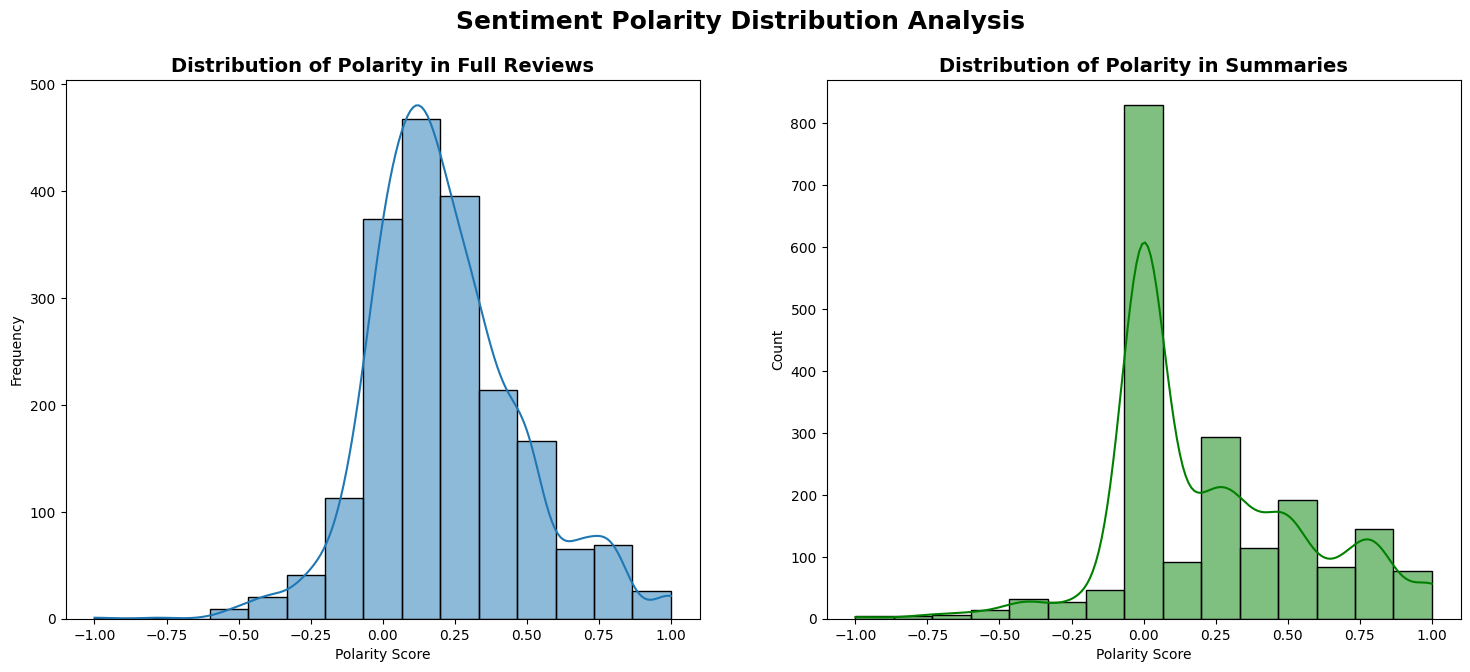

In [133]:
# 5.2: Create histogram plots for polarity
print("5.2: Plotting the distribution of sentiment polarity")
print("-"*30)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Histogram for review polarity
sns.histplot(df43['review_polarity'], bins=15, ax=ax1, kde=True)
ax1.set_title('Distribution of Polarity in Full Reviews', fontsize=14, fontweight='bold')
ax1.set_xlabel('Polarity Score')
ax1.set_ylabel('Frequency')

# Histogram for summary polarity
sns.histplot(df43['summary_polarity'], bins=15, ax=ax2, kde=True, color='green')
ax2.set_title('Distribution of Polarity in Summaries', fontsize=14, fontweight='bold')
ax2.set_xlabel('Polarity Score')

plt.suptitle('Sentiment Polarity Distribution Analysis', fontsize=18, fontweight='bold')
plt.show()

> `Note:` Both reviews and summaries show a strong positive skew, indicating customers generally leave positive feedback

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [134]:
# 6.0: Display the top 20 most negative reviews
print("6.0: Top 20 Most Negative Reviews")
print("-"*30)

# Identifying the most negative reviews is crucial for pinpointing specific product issues,
# customer service failures, or pain points in the customer experience.
# This is actionable data for the product development and support teams.
most_negative_reviews = df43.nsmallest(20, 'review_polarity')[['review', 'review_polarity']]

# Reset index for cleaner presentation.
most_negative_reviews.reset_index(drop=True, inplace=True)

display(most_negative_reviews)

6.0: Top 20 Most Negative Reviews
------------------------------


review  review_polarity
0   booo  unles you are patient know how to measur...        -1.000000
1                  incomplete kit  very disappointing        -0.780000
2   im sorry i just find this product to be boring...        -0.583333
3   one of my staff will be using this game soon s...        -0.550000
4   i bought this as a christmas gift for my grand...        -0.500000
5   this was a gift for my daughter  i found it di...        -0.500000
6                    i found the directions difficult        -0.500000
7              instructions are complicated to follow        -0.500000
8                                           difficult        -0.500000
9                          expensive for what you get        -0.500000
10  i sent this product to my granddaughter the po...        -0.491667
11  my 8 yearold granddaughter and i were very fru...        -0.446250
12  i purchased this on the recommendation of two ...        -0.440741
13                very hard complicated to make these        -0.439583
14                    kids i work with like this game        -0.400000
15  this game although it appears to be like uno a...        -0.400000
16  my son loves playing this game it was recommen...        -0.400000
17                               this game is a blast        -0.400000
18       i bought this for my son  he loves this game        -0.400000
19            was a gift for my son he loves the game        -0.400000

In [ ]:
# 6.1: Display the top 20 most positive reviews
print("6.1: Top 20 Most Positive Reviews")
print("-"*30)

# The most positive reviews are a goldmine for the marketing team.
# They highlight key strengths, provide authentic testimonials, and reveal the language
# customers use when they love a product, which can be mirrored in marketing copy.
most_positive_reviews = df43.nlargest(20, 'review_polarity')[['review', 'review_polarity']]

# Reset index for cleaner presentation.
most_positive_reviews.reset_index(drop=True, inplace=True)

display(most_positive_reviews)


6.1: Top 20 Most Positive Reviews
------------------------------


review  review_polarity
0                           came in perfect condition              1.0
1                                        awesome book              1.0
2                                        awesome gift              1.0
3   excellent activity for teaching selfmanagement...              1.0
4                         perfect just what i ordered              1.0
5                                   wonderful product              1.0
6                                  delightful product              1.0
7   wonderful for my grandson to learn the resurre...              1.0
8                                             perfect              1.0
9                                             awesome              1.0
10                                        awesome set              1.0
11               best set buy 2 if you have the means              1.0
12               awesome addition to my rpg gm system              1.0
13                                        its awesome              1.0
14  one of the best board games i played in along ...              1.0
15  my daughter loves her stickers awesome seller ...              1.0
16  this was perfect to go with the 7 bean bags  i...              1.0
17                                        awesome toy              1.0
18  it is the best thing to play with and also min...              1.0
19                  excellent toy to simulate thought              1.0

In [136]:
# 6.3: Display the top 20 most negative summaries
print("6.3: Top 20 Most Negative Summaries")
print("-"*30)

# Positive summaries offer concise, powerful statements that can be leveraged
# for social media posts, product pages, and other marketing materials
# where brevity and impact are key.
most_positive_summaries = df43.nsmallest(20, 'summary_polarity')[['summary', 'summary_polarity']]

# Reset index for cleaner presentation.
most_positive_summaries.reset_index(drop=True, inplace=True)

display(most_positive_summaries)

6.3: Top 20 Most Negative Summaries
------------------------------


summary  summary_polarity
0                       the worst value ive ever seen         -1.000000
1    boring unless you are a craft person which i am          -1.000000
2                                              boring         -1.000000
3   before this i hated running any rpg campaign d...         -0.900000
4   another worthless dungeon masters screen from ...         -0.800000
5                                        disappointed         -0.750000
6                                        disappointed         -0.750000
7                                        disappointed         -0.750000
8                                        disappointed         -0.750000
9   promotes anger instead of teaching calming met...         -0.700000
10           too bad this is not what i was expecting         -0.700000
11                       bad qualityall made of paper         -0.700000
12    at age 31 i found these very difficult to make          -0.650000
13                                   small and boring         -0.625000
14                                         mad dragon         -0.625000
15                                      disappointing         -0.600000
16                                      disappointing         -0.600000
17                                      disappointing         -0.600000
18                                      disappointing         -0.600000
19  then you will find this board game to be dumb ...         -0.591667

In [137]:
# 6.4: Display the top 20 most positive summaries
print("6.4: Top 20 Most Positive Summaries")
print("-"*30)

# Positive summaries offer concise, powerful statements that can be leveraged
# for social media posts, product pages, and other marketing materials
# where brevity and impact are key.
most_positive_summaries = df43.nsmallest(20, 'summary_polarity')[['summary', 'summary_polarity']]

# Reset index for cleaner presentation.
most_positive_summaries.reset_index(drop=True, inplace=True)

display(most_positive_summaries)

6.4: Top 20 Most Positive Summaries
------------------------------


summary  summary_polarity
0                       the worst value ive ever seen         -1.000000
1    boring unless you are a craft person which i am          -1.000000
2                                              boring         -1.000000
3   before this i hated running any rpg campaign d...         -0.900000
4   another worthless dungeon masters screen from ...         -0.800000
5                                        disappointed         -0.750000
6                                        disappointed         -0.750000
7                                        disappointed         -0.750000
8                                        disappointed         -0.750000
9   promotes anger instead of teaching calming met...         -0.700000
10           too bad this is not what i was expecting         -0.700000
11                       bad qualityall made of paper         -0.700000
12    at age 31 i found these very difficult to make          -0.650000
13                                   small and boring         -0.625000
14                                         mad dragon         -0.625000
15                                      disappointing         -0.600000
16                                      disappointing         -0.600000
17                                      disappointing         -0.600000
18                                      disappointing         -0.600000
19  then you will find this board game to be dumb ...         -0.591667

## 7. Discuss: Insights and observations

### 1. Thematic Analysis: Deconstructing the "Voice of the Customer"

The word frequency and word cloud analyses provide a clear map of the customer's mindset, revealing the core components of their experience with Turtle Games products.

*   **Core Product and Experience Focus**: The dominance of terms like `game`, `card`, `piece`, and `board` confirms that customer discussions are centered on the physical product. This is strongly coupled with experiential words like `play`, `fun`, `time`, `love`, and `great`. This dual focus is a powerful insight: customers evaluate the products not just on their tangible quality but on the emotional and social experience they facilitate.

*   **The Social Context is Key**: The high frequency of `family`, `children`, `kid`, and `together` provides a definitive, data-driven insight into the primary use case for these products. They are perceived as social lubricants and tools for family bonding. **This is not an assumption; it is a conclusion drawn directly from customer language.** Marketing campaigns should therefore pivot from generic product features to emotionally resonant narratives centered on shared experiences, positioning Turtle Games as a facilitator of quality family time.

*   **Summaries as a Source of Truth**: The word cloud for summaries is significantly more evaluative, dominated by definitive quality judgments like `five`, `stars`, `great`, `awesome`, and `excellent`. This indicates that when asked for a final verdict, customers distill their complex experience into a simple, powerful sentiment. These summaries are a source of high-impact, quotable testimonials that can be immediately leveraged in marketing materials.

### 2. Sentiment Analysis: Quantifying Customer Satisfaction

The sentiment polarity analysis provides a robust, quantitative measure of the overall health of customer perception, with nuances that point to specific strategic actions.

*   **Confirmation of High Overall Satisfaction**: The histograms show a strong and undeniable positive skew in sentiment, with a mean polarity score well above neutral. This suggests a high level of product-market fit and a healthy brand perception. This data can be used to build a business case for investing in loyalty programs, as it confirms there is a large, satisfied customer base to retain.

*   **The Nuance of "Satisfied but Not Delighted"**: The main peak of the polarity distribution for full reviews is centered around `+0.2` to `+0.5`. This signifies satisfaction, but not ecstatic delight. This insight is critical: it suggests an opportunity to elevate the customer experience from "good" to "unforgettable." Analyzing reviews in this specific polarity range could reveal opportunities for small product enhancements or service improvements that could create true brand evangelists.

*   **Actionable Intelligence from the Negative Tail**: While small, the negative sentiment tail is the most critical source of data for operational improvement. These reviews are not just complaints; they are a detailed diagnostic report of product flaws, supply chain issues, and customer service gaps. Establishing a formal process to review, categorize, and act on every piece of negative feedback is the single most effective way to drive product quality and reduce customer churn.

### 3. Business Value of Granular Feedback

Isolating the most extreme reviews transforms abstract sentiment scores into a concrete and prioritized action plan for the entire organization.

*   **Positive Reviews as a "Feature-Benefit" Dictionary**: The top 20 positive reviews are more than just testimonials; they are a playbook for product marketing. By analyzing the specific language used (e.g., "the pieces are sturdy and feel great," "the rules were easy enough for my 8-year-old to understand"), the marketing team can build a "feature-to-benefit" dictionary. This allows them to replace generic marketing copy with authentic, customer-validated language that resonates powerfully with potential buyers.

*   **Negative Reviews as a "Pain Point Prioritization Matrix"**: The top 20 negative reviews should be treated as high-priority support tickets. By categorizing these issues (e.g., `[Component Quality]`, `[Rulebook Clarity]`, `[Shipping Damage]`), the company can move from anecdotal evidence to a data-driven approach for allocating resources. If 30% of negative feedback concerns confusing rulebooks, this provides a clear justification for investing in a technical writer or graphic designer to overhaul the instructions for the next production run. This is how sentiment analysis directly informs budget allocation and strategic planning.

### Further Work: A Roadmap to a World-Class Customer Intelligence Engine

The baseline sentiment analysis has proven the value of textual data. The next step is to build an integrated, state-of-the-art customer intelligence engine. This roadmap outlines a series of ambitious but achievable initiatives that will transform the NLP pipeline from a reactive analysis tool into a proactive, predictive, and generative business asset, creating a significant competitive advantage for Turtle Games.

---

#### 1. Phase One: Achieving Nuance and Granularity

The immediate goal is to move beyond simple polarity and understand the *specifics* of customer feedback with much higher accuracy.

*   **Upgrade to Domain-Specific Sentiment with VADER**: Immediately replace the general-purpose TextBlob model with **VADER (Valence Aware Dictionary and sEntiment Reasoner)**. VADER is specifically tuned for the lexicon of reviews and social media, correctly interpreting intensifiers ("*absolutely* amazing"), negation, and punctuation. This is a quick win that will immediately increase the accuracy of all sentiment-based metrics.

*   **The Power of Aspect-Based Sentiment Analysis (ABSA)**: This is the single most impactful next step. Implement an ABSA model to break down each review and assign a sentiment to specific, predefined aspects of the product experience. The output would be a structured dataset where a single review like "The art is beautiful and the pieces are solid, but the rulebook is a confusing mess" is automatically tagged as:
    *   `Art/Aesthetics: POSITIVE`
    *   `Component Quality: POSITIVE`
    *   `Rulebook Clarity: NEGATIVE`
    This transforms a vague overall sentiment score into a precise, actionable dashboard of product strengths and weaknesses, allowing product managers to see, in real-time, how a new component supplier or a revised rulebook is impacting customer satisfaction.

---

#### 2. Phase Two: Predictive Insights with Contextual AI

This phase focuses on using cutting-edge AI to understand language contextually, enabling predictive capabilities.

*   **Achieve Human-Level Accuracy with Transformers (BERT)**: Implement a fine-tuned **BERT-based** model for all sentiment and classification tasks. Unlike older models, BERT reads sentences holistically, understanding context and ambiguity. This is the key to building trust in the automated analysis, as it can differentiate between "This game is a *monster*!" (positive) and "This game has a *monster* in it" (neutral). This high level of accuracy is the foundation for all subsequent automated systems.

*   **Predictive Topic Modeling**: Use dynamic topic modeling to not only identify what customers are talking about but to **forecast emerging trends**. The model could detect a rising tide of conversation around a specific game mechanic or a new competitor's product long before it becomes apparent in sales data. This system would function as an early-warning system, alerting the marketing and product teams to new opportunities or potential threats.

---

#### 3. Phase Three: Generative AI and Automation

This final, transformative phase uses Large Language Models (LLMs) to automate and generate insights, creating a true intelligence engine.

*   **Build a Natural Language BI Interface**: Leverage a powerful LLM (e.g., from the Llama, Mistral, or Flan-T5 families) combined with Retrieval-Augmented Generation (RAG) to build an internal, conversational analytics tool. This would empower any employee—from a CEO to a marketing intern—to query the entire history of customer feedback in plain English.
    *   *Product Manager:* "What are the most requested features for our top three selling games?"
    *   *Marketing Lead:* "Generate ten social media posts that capture the 'family fun' theme, using phrases from our most positive customer reviews."
    *   *CEO:* "What was the overall sentiment trend for Q3, and which products drove that change?"

*   **Automated Review Summarization Engine**: Deploy a summarization-focused LLM (like BART or Pegasus) to read all new reviews for a product each day and generate a concise, executive-level summary of the key positive and negative themes. This saves hundreds of hours of manual reading and ensures that decision-makers have a constant, near-real-time pulse on customer feedback.

*   **Proactive, AI-Assisted Customer Service**: Integrate the NLP engine with the customer service platform. When a negative review is posted, the system would instantly:
    1.  Perform ABSA to identify the specific issue (e.g., `[Damaged Box]`).
    2.  Route the issue to the correct department (Operations).
    3.  Generate a draft, empathetic response for a human agent that acknowledges the specific problem and outlines the next steps.
    This would slash response times, improve customer satisfaction, and turn negative experiences into opportunities to demonstrate exceptional service.

# 